In [1]:
#load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the train and test data
train=pd.read_excel(r'C:\Users\91980\OneDrive\Desktop\Project-Housing_splitted\train.xlsx')
test=pd.read_excel(r"C:\Users\91980\OneDrive\Desktop\Project-Housing_splitted\test.xlsx")

In [3]:
print(train.shape)
print(test.shape)

(1168, 81)
(292, 80)


In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df=pd.concat([train,test])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [6]:
#check the shape of data
print(df.shape)

(1460, 81)


In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

                                             |                                             | [  0%]   00:00 ->…


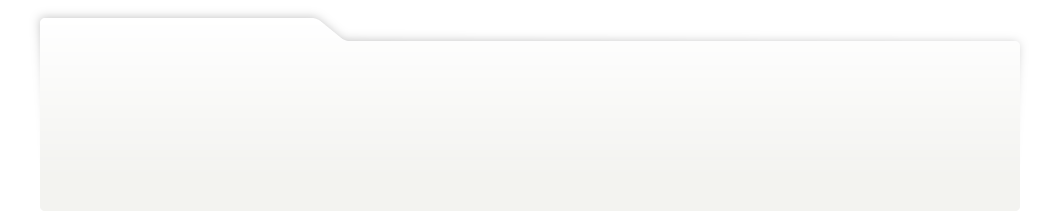
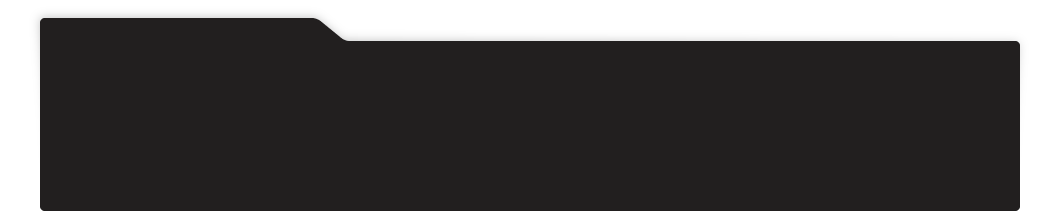
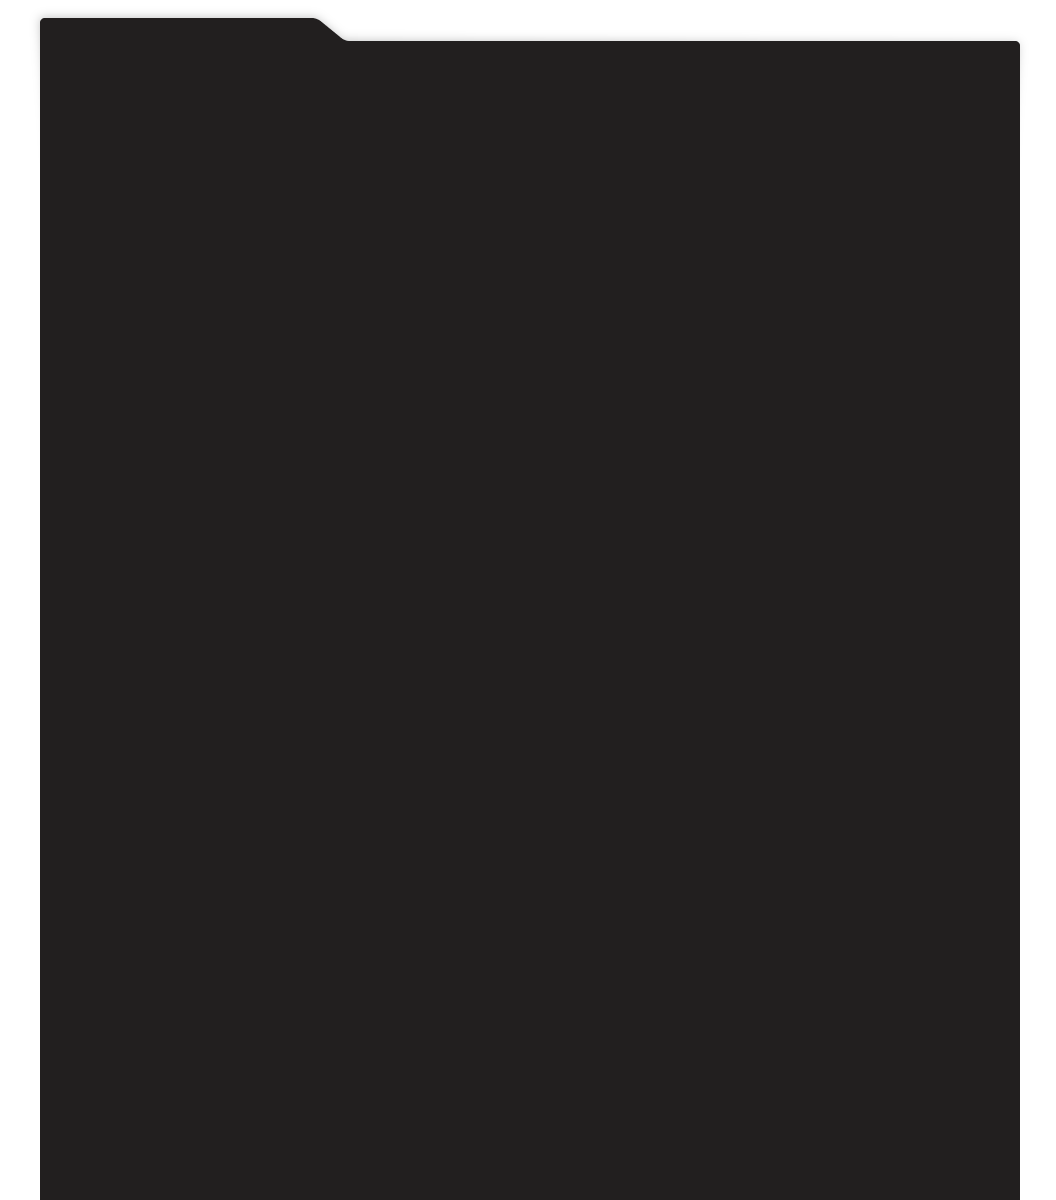
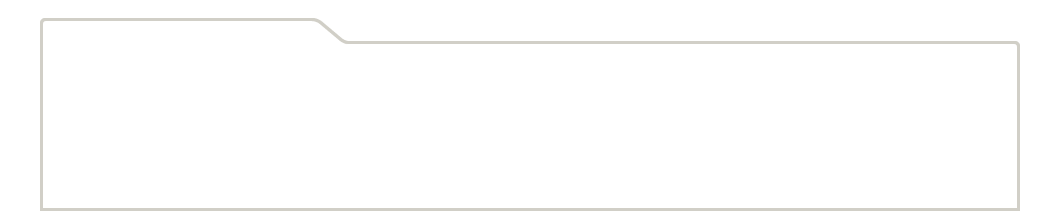
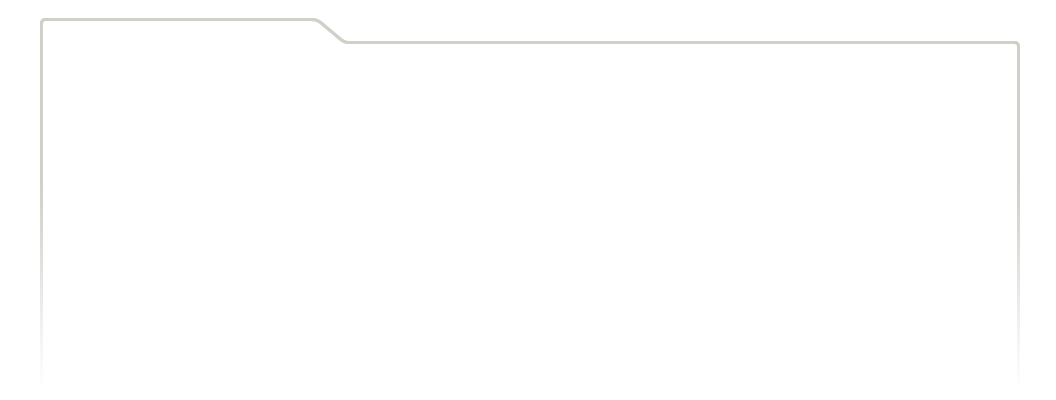
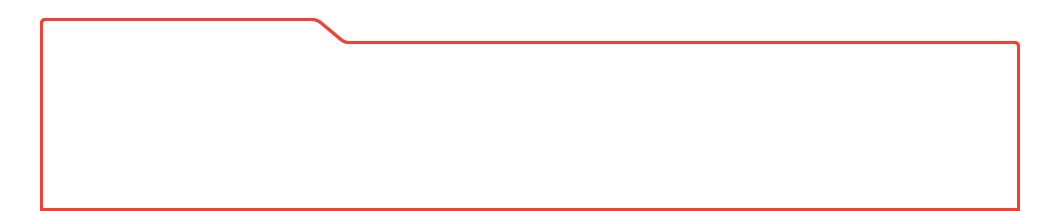
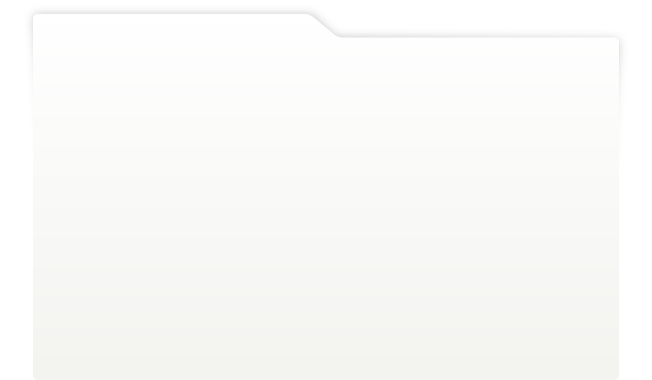
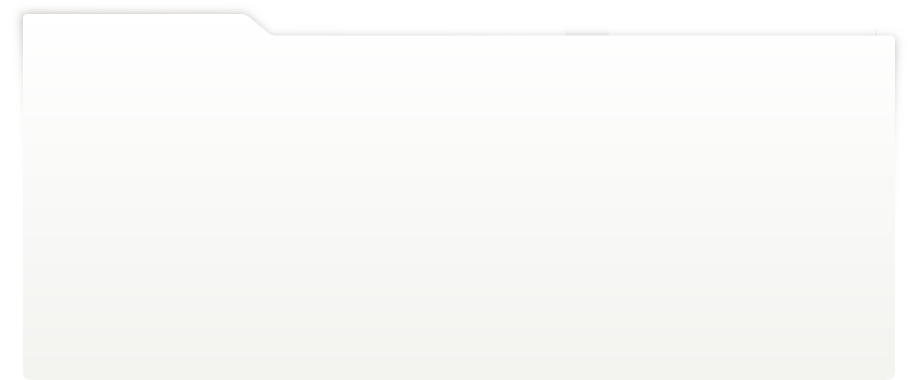
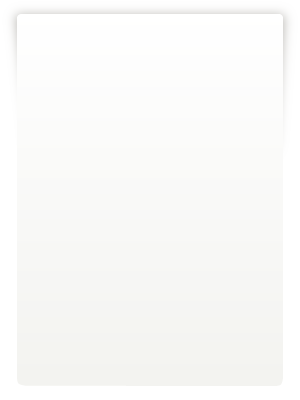
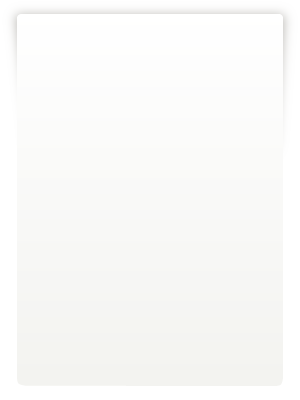
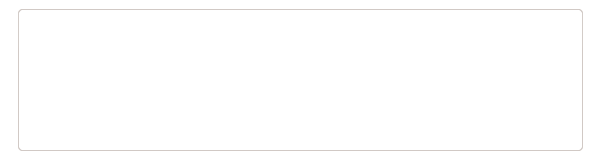
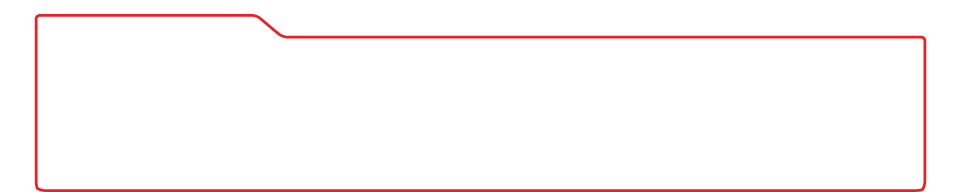
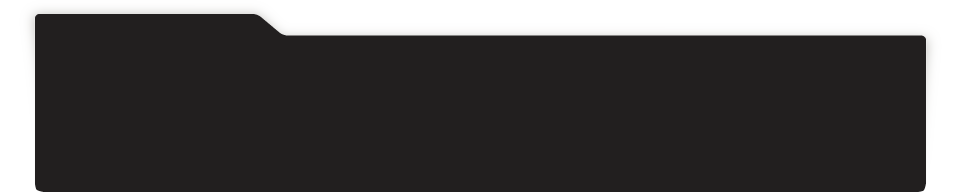
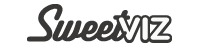
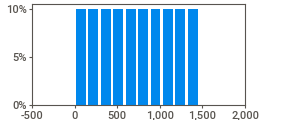
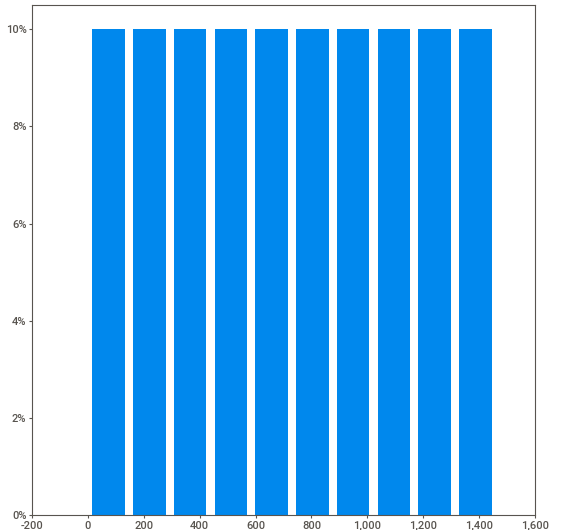
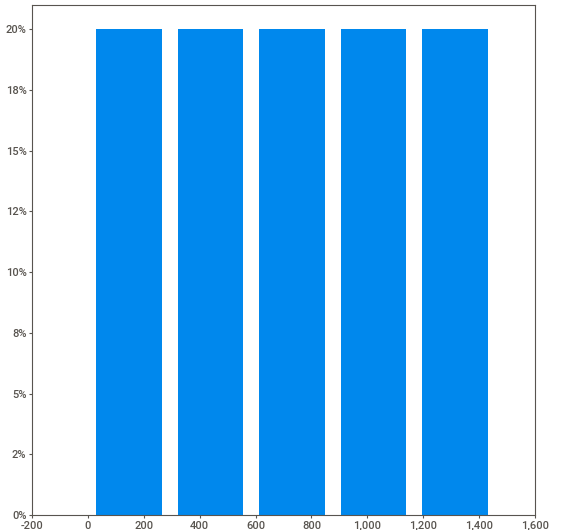
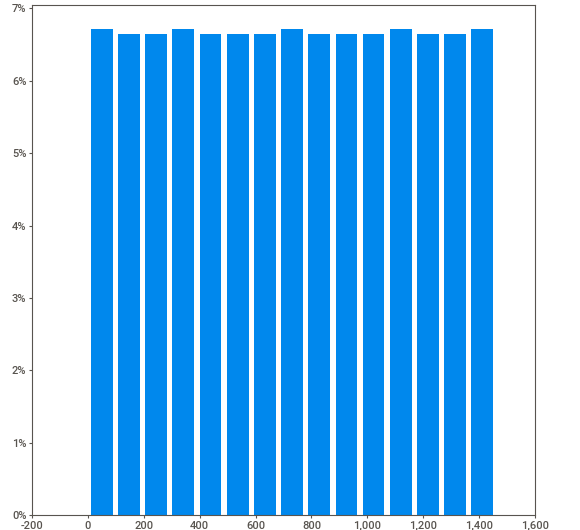
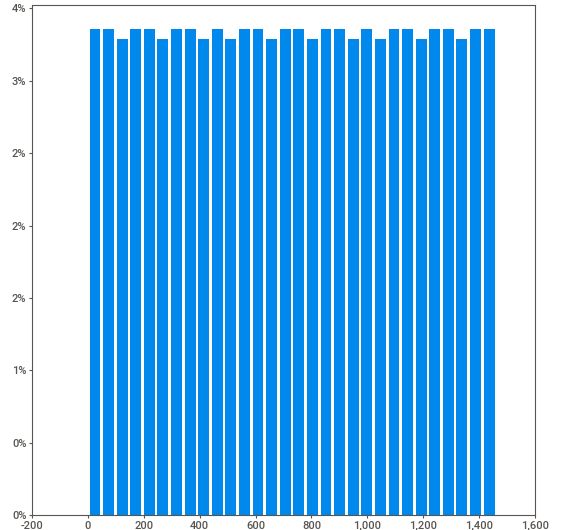
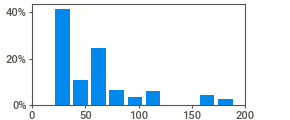
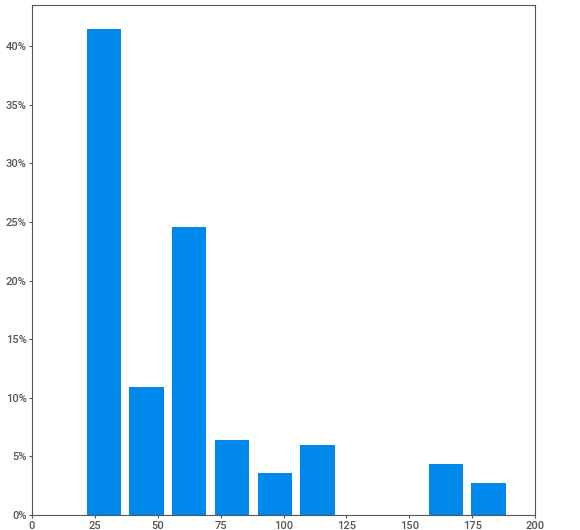
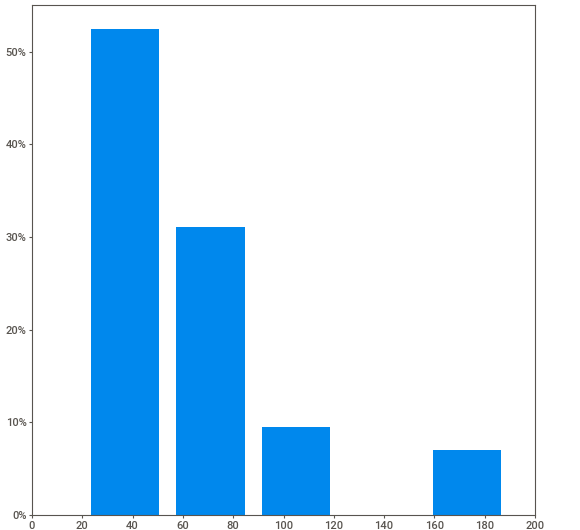
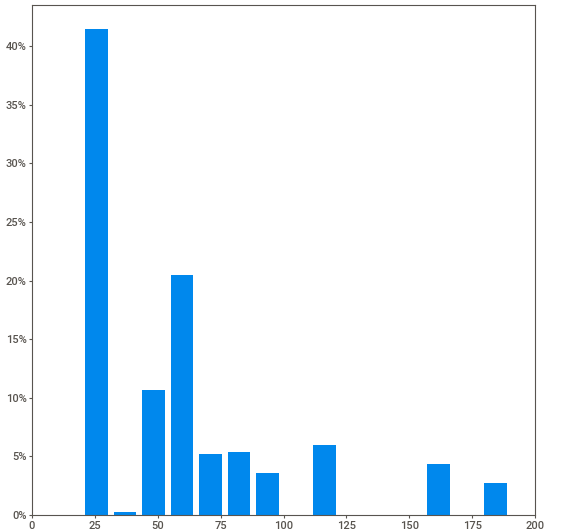
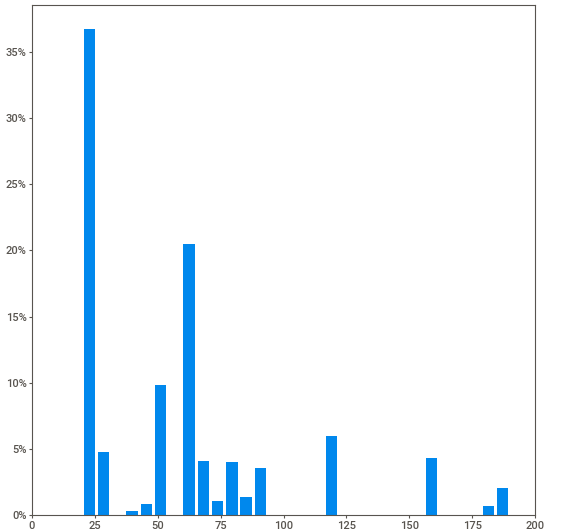
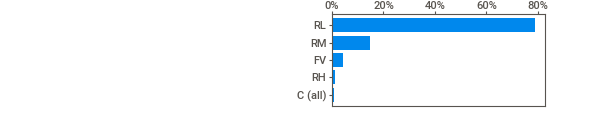
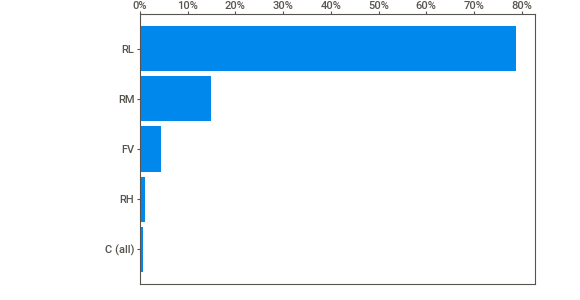
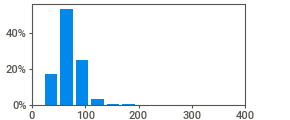
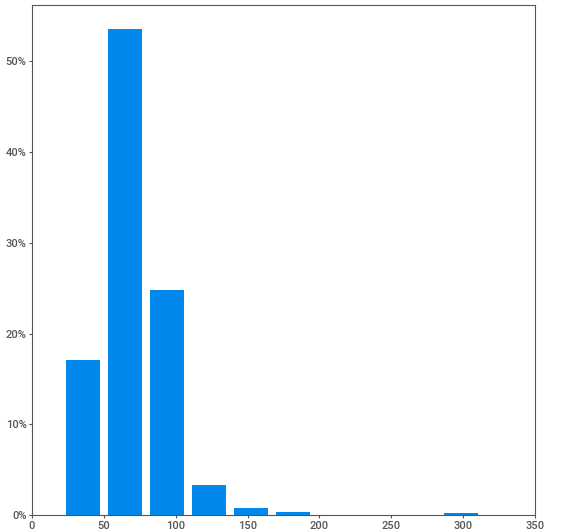
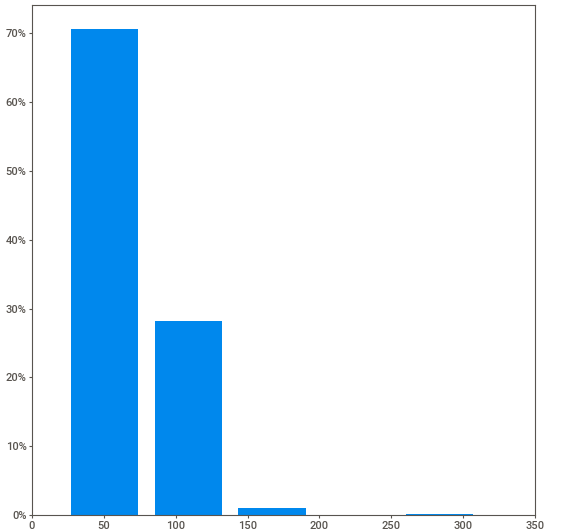
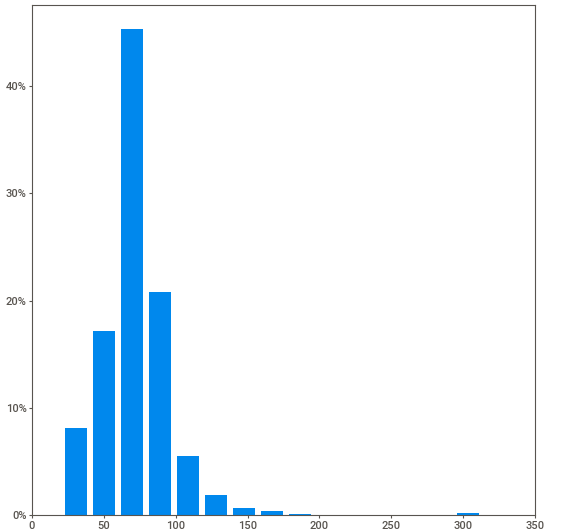
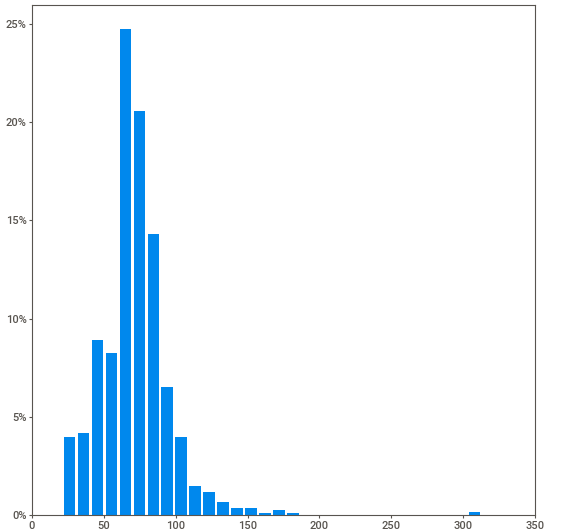
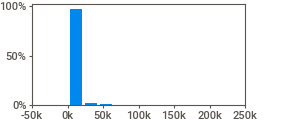
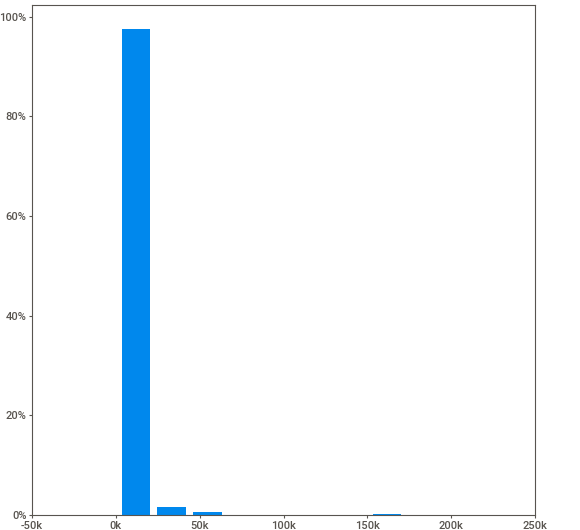
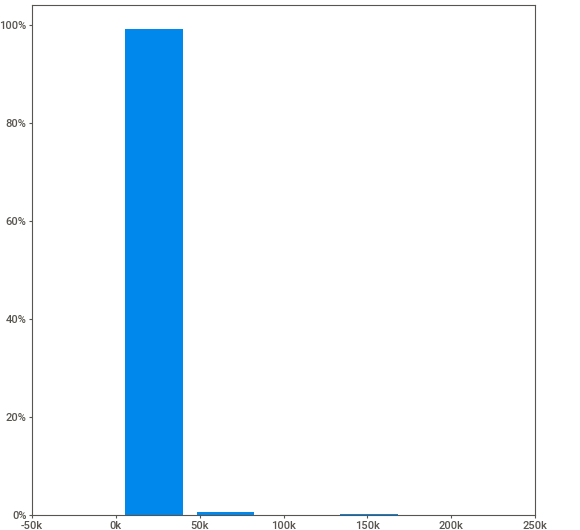
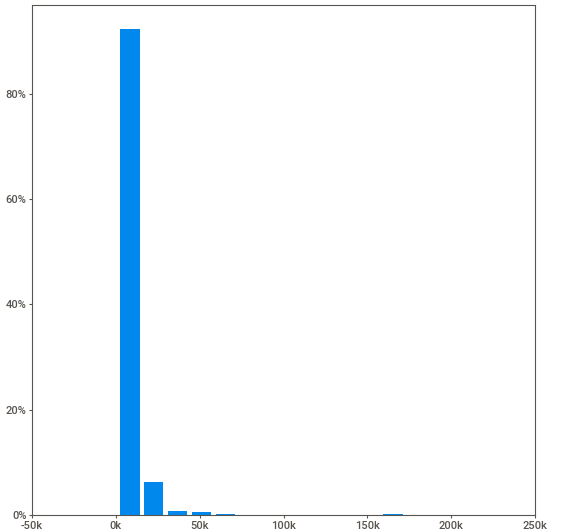
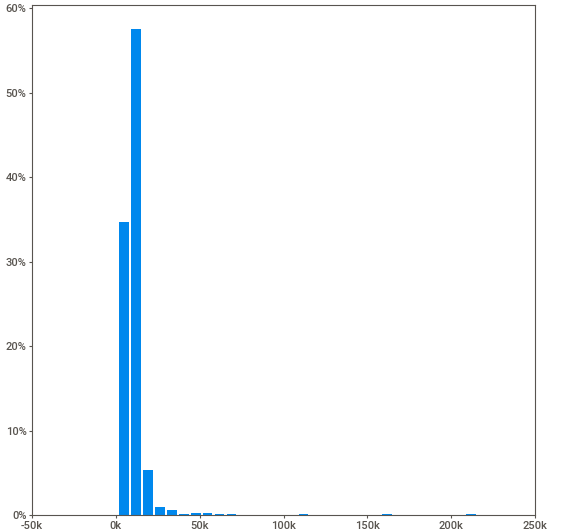
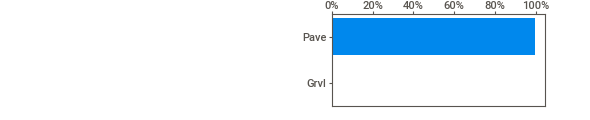
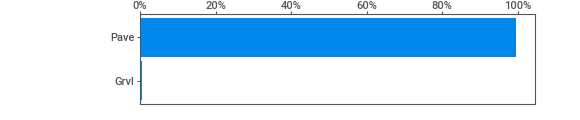
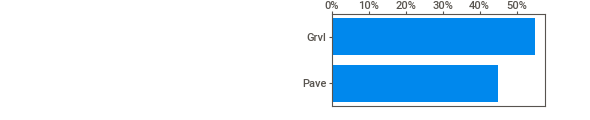
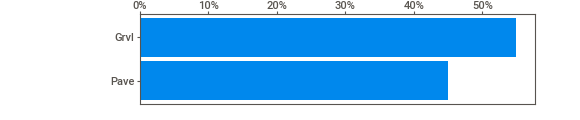
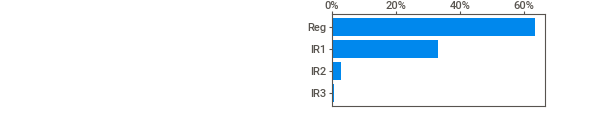
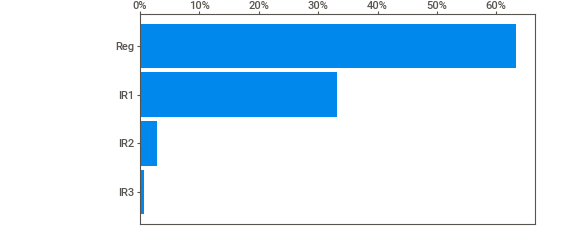
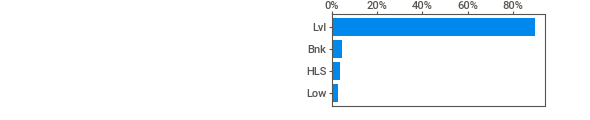
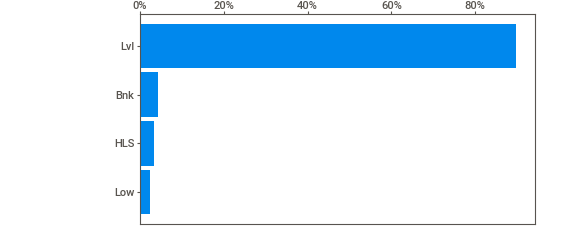
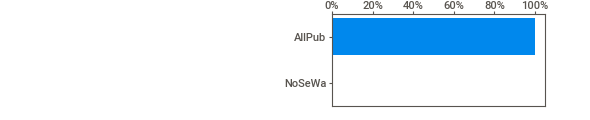
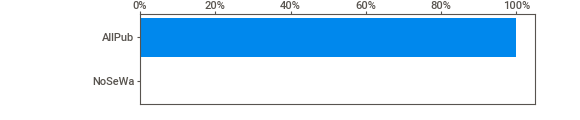
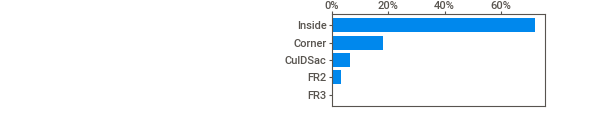
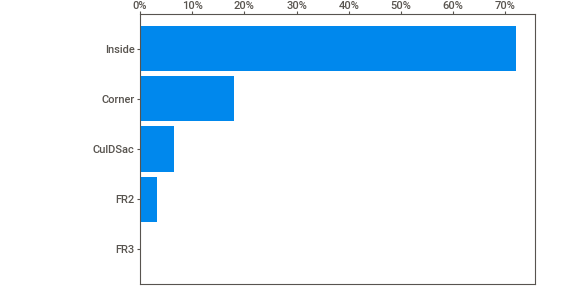
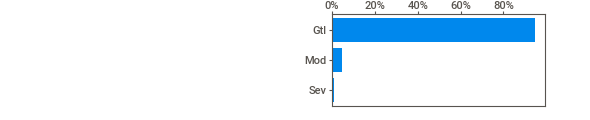
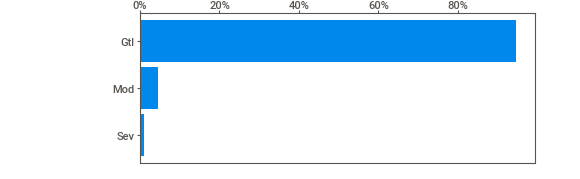
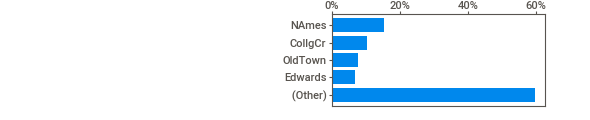
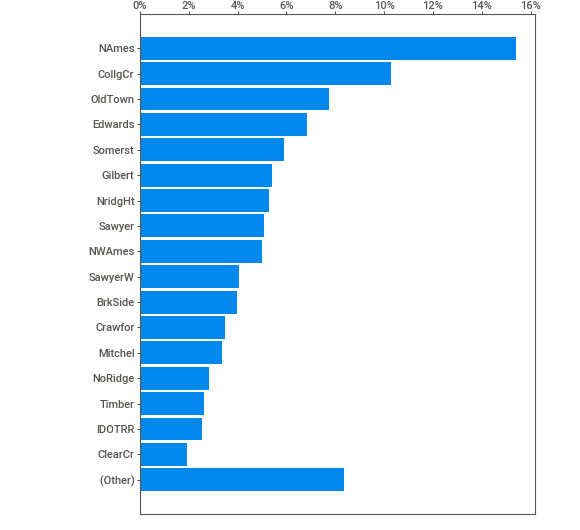
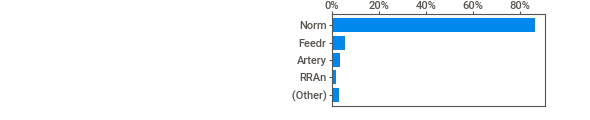
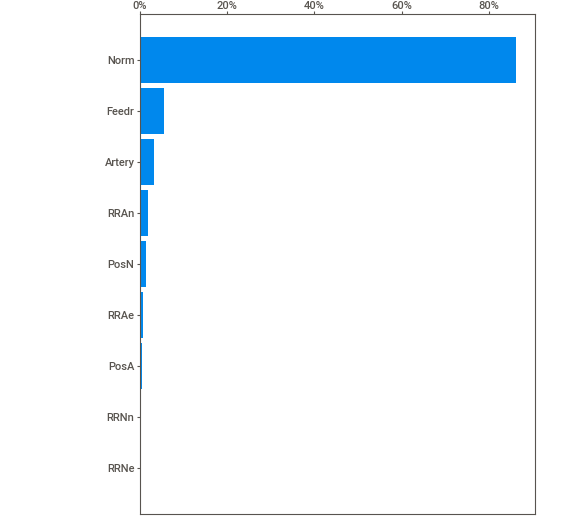
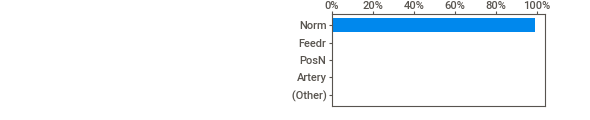
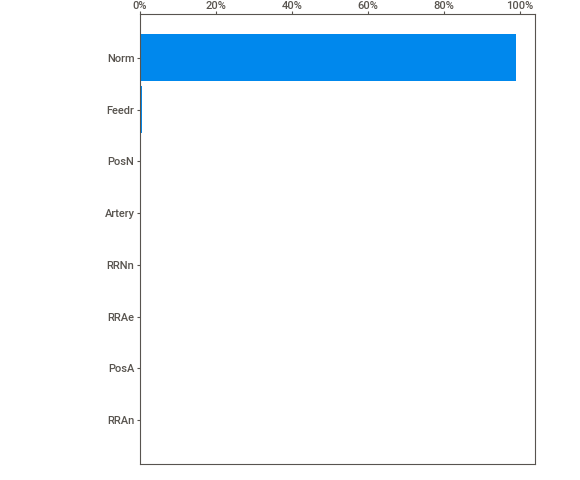
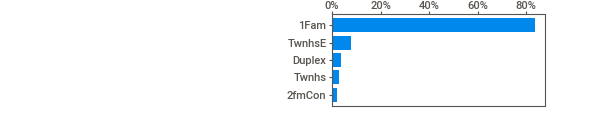
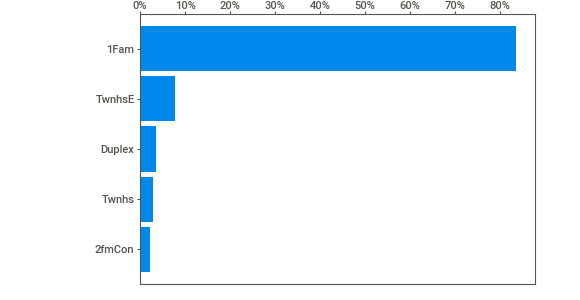
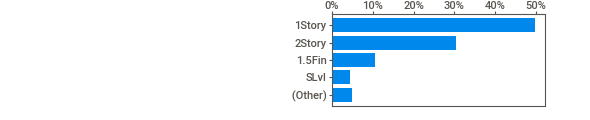
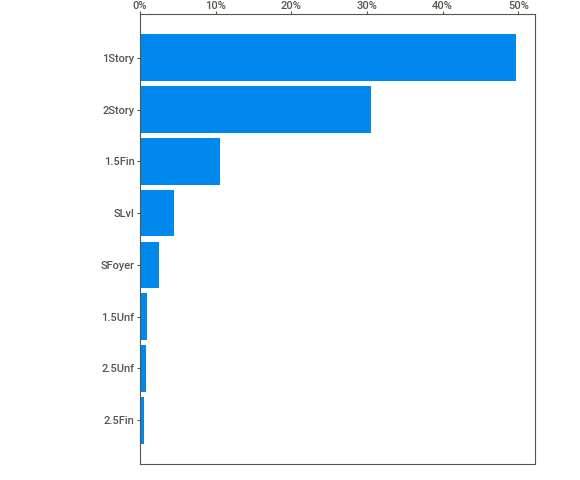
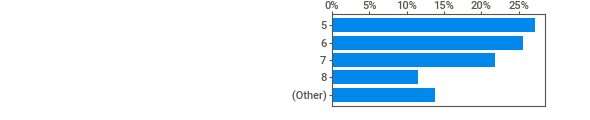
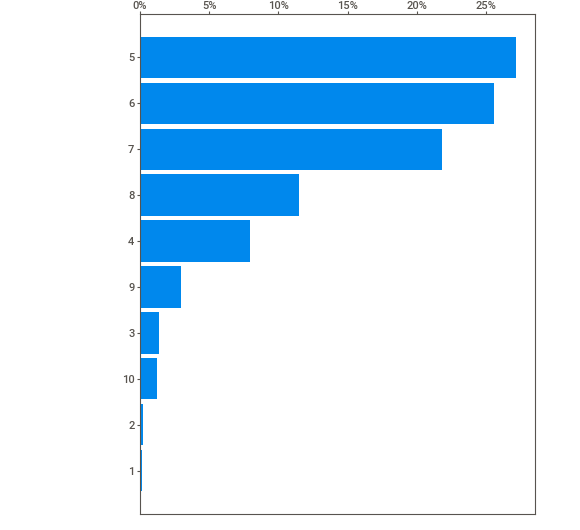
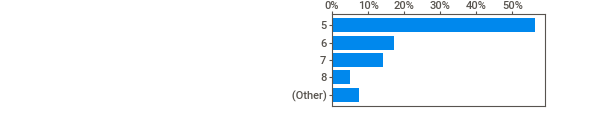
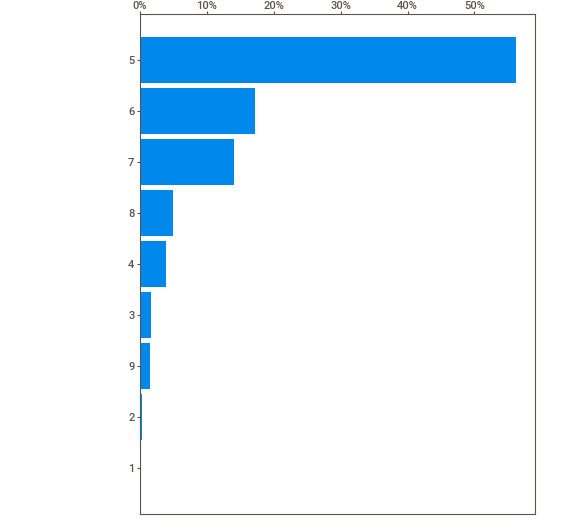
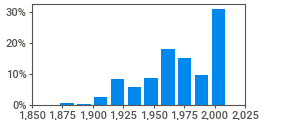
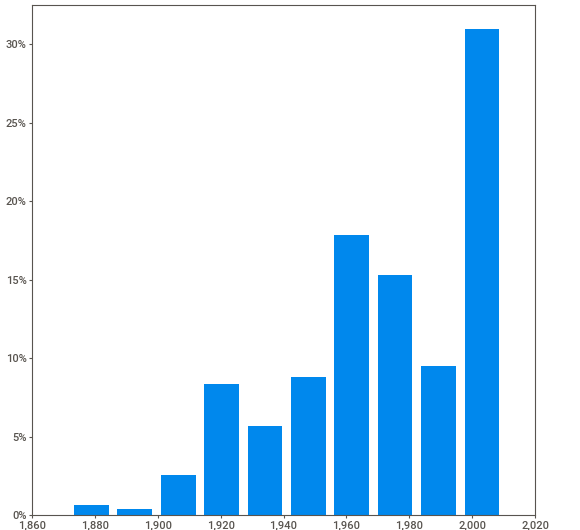
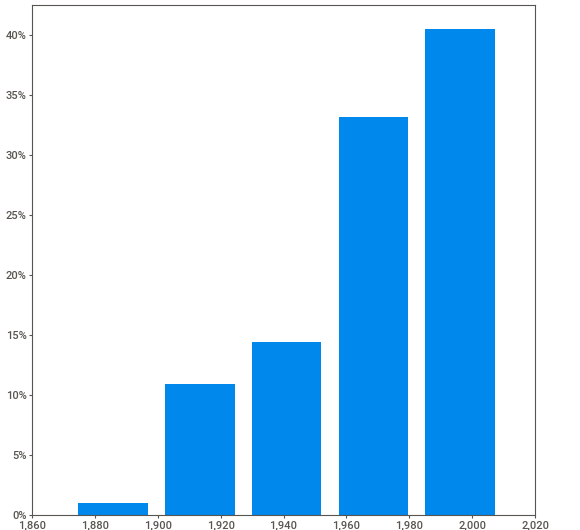
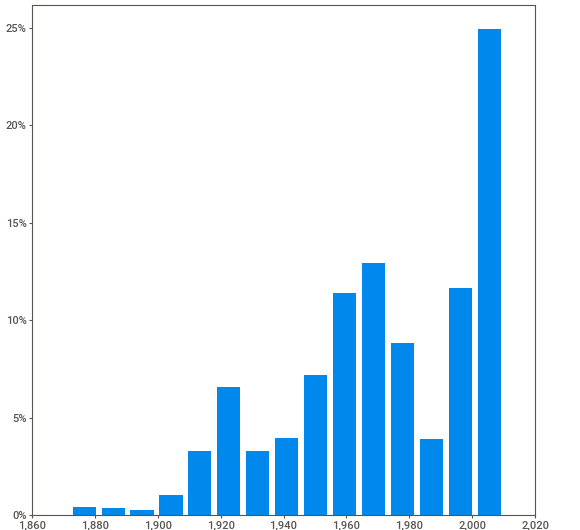
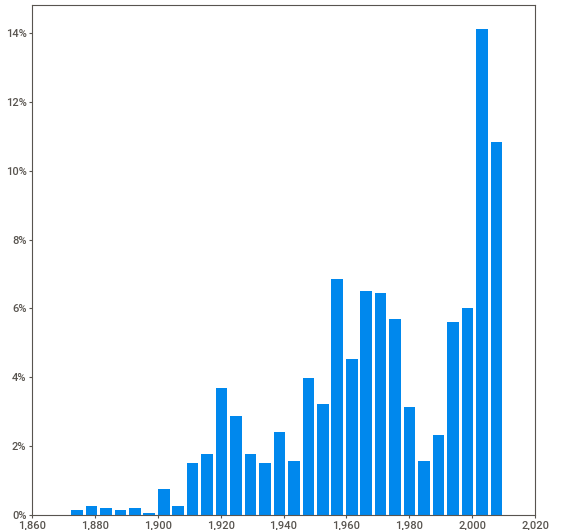
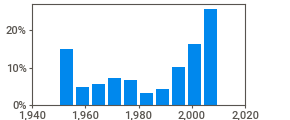
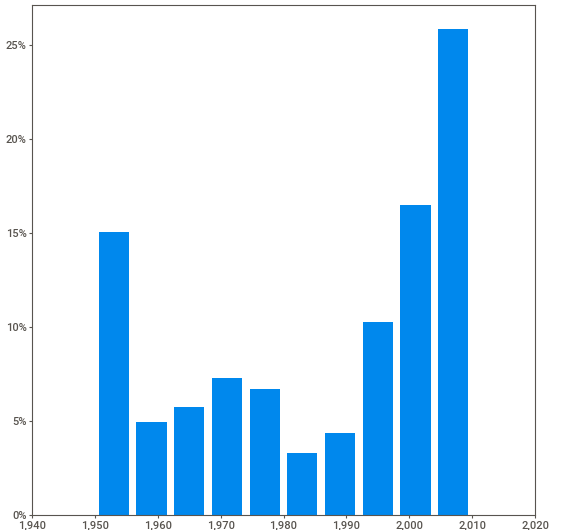
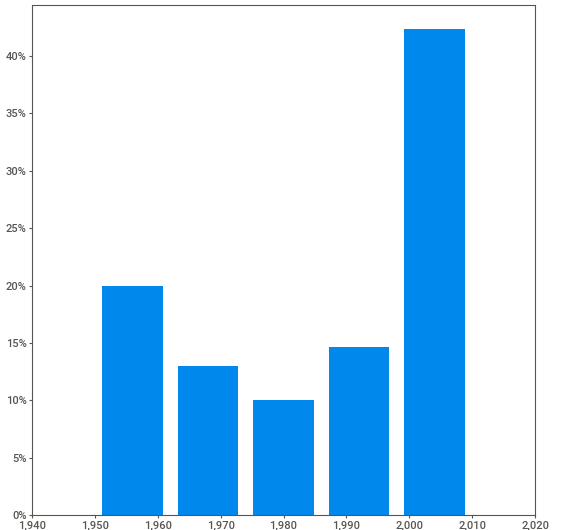
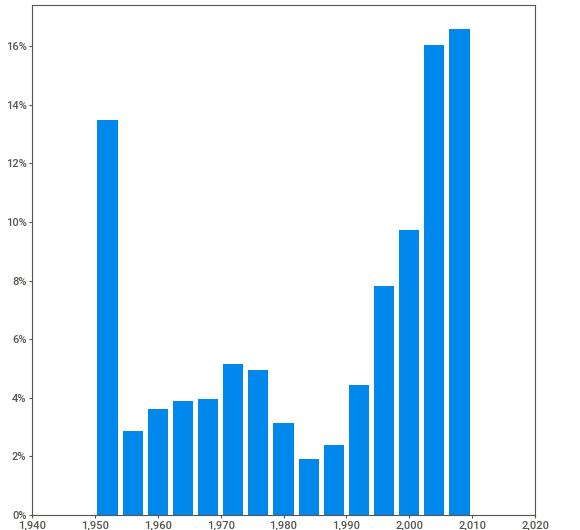
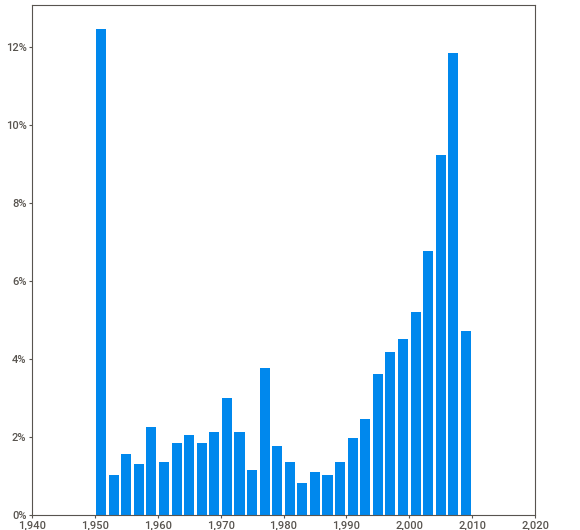
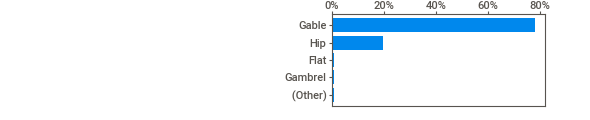
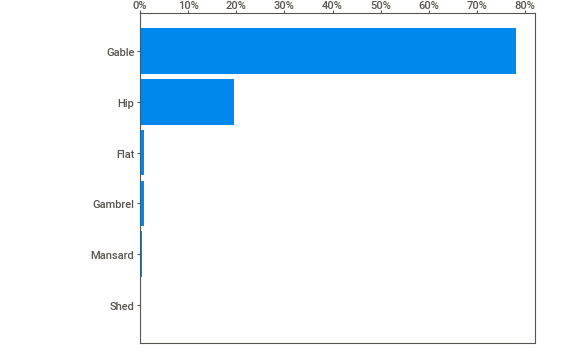
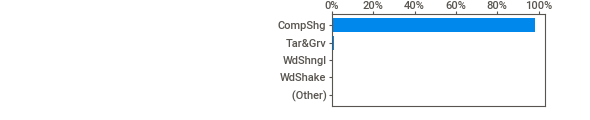
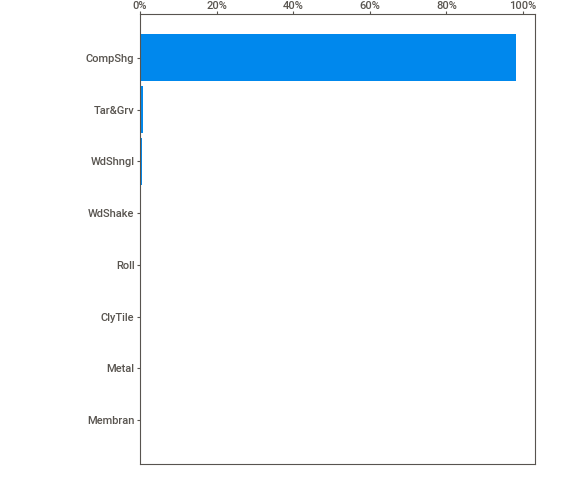
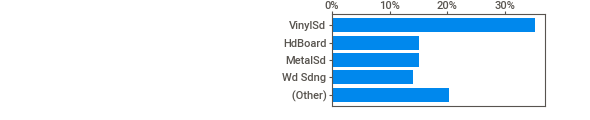
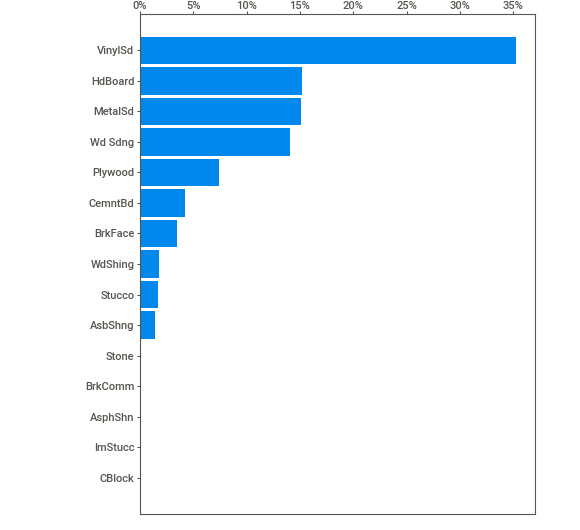
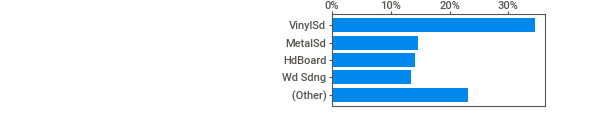
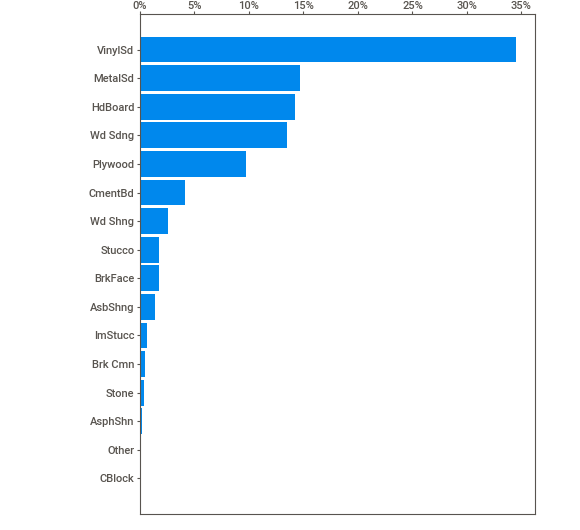
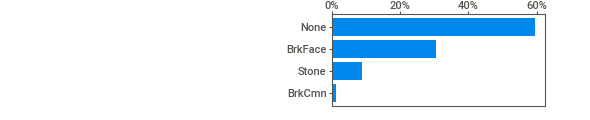
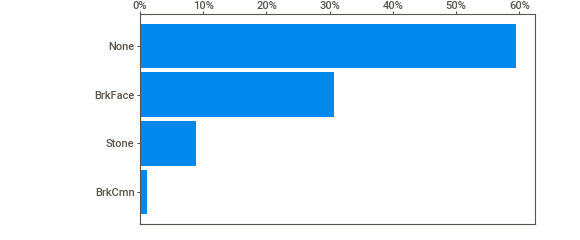
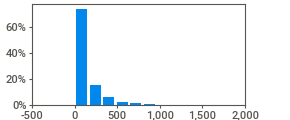
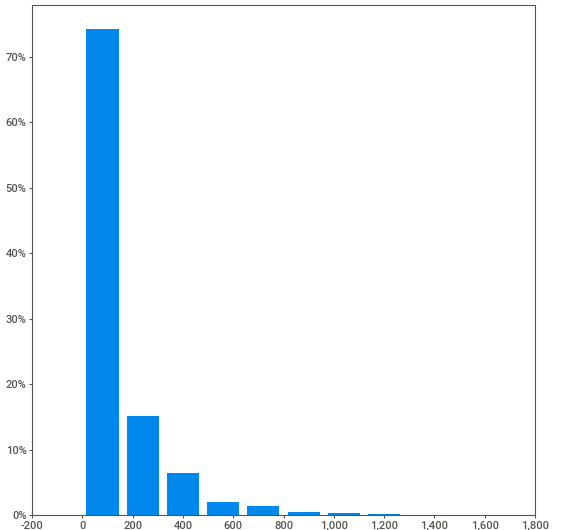
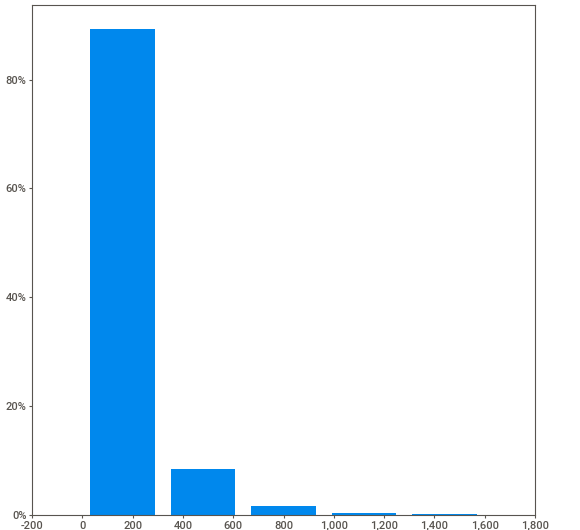
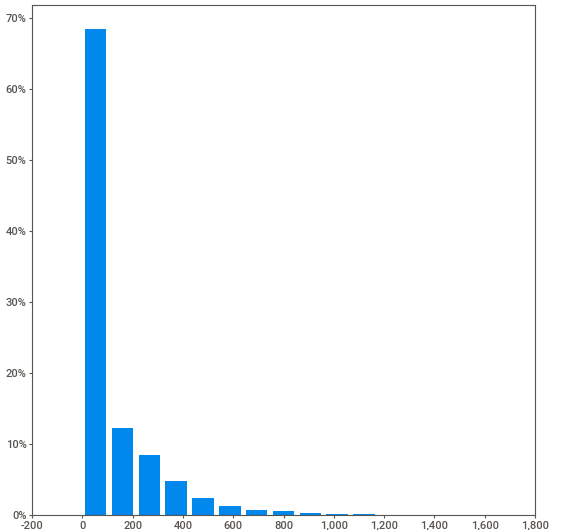
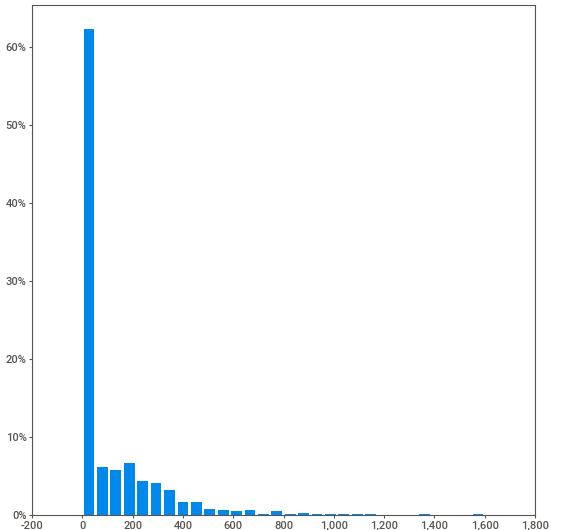
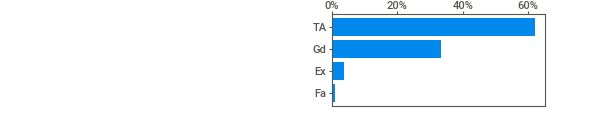
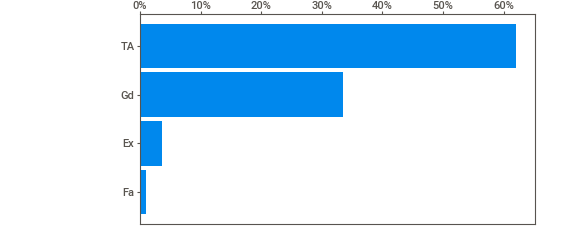
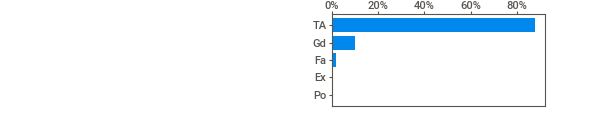
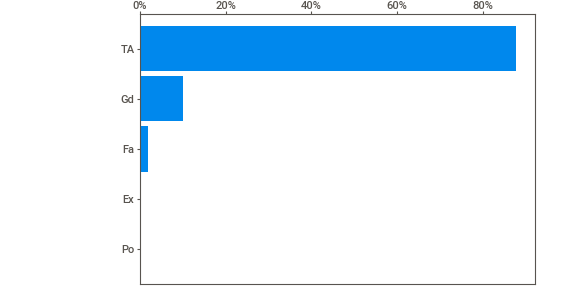
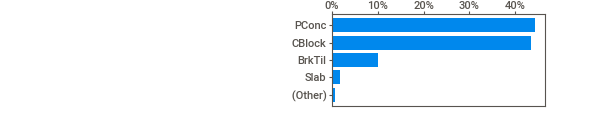
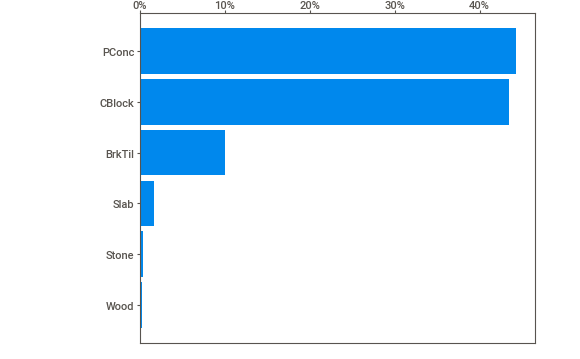
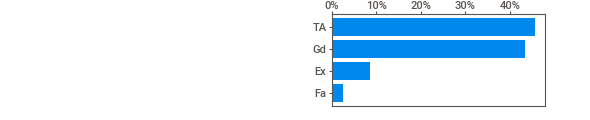
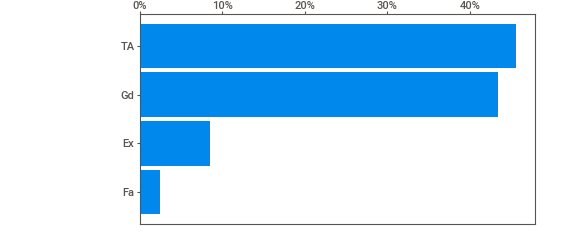
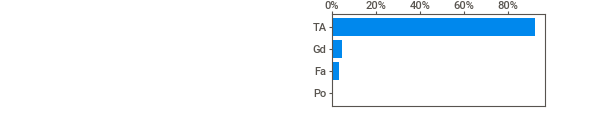
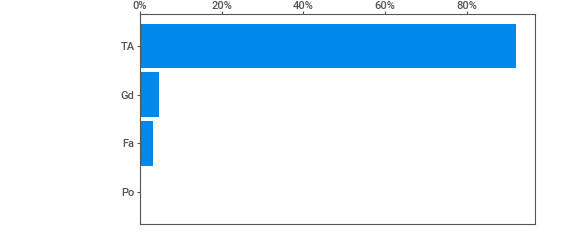
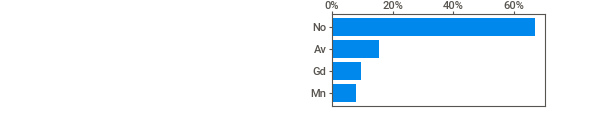
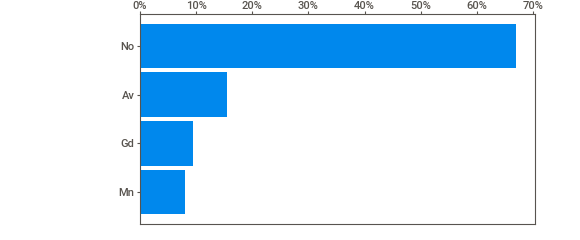
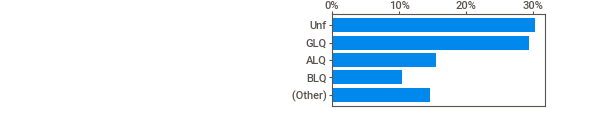
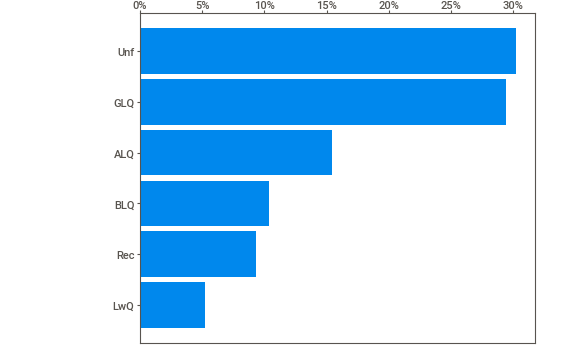
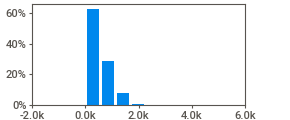
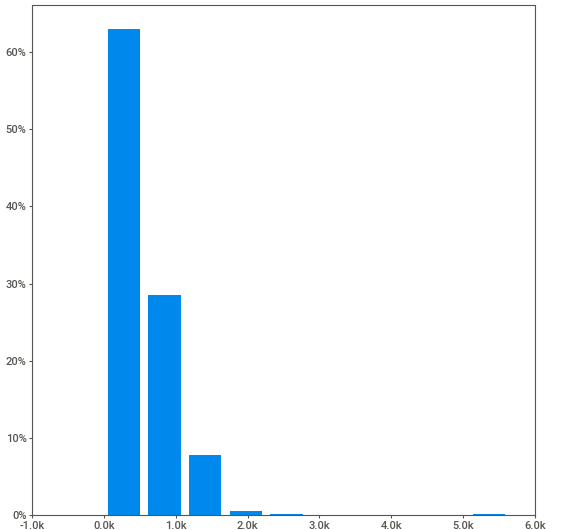
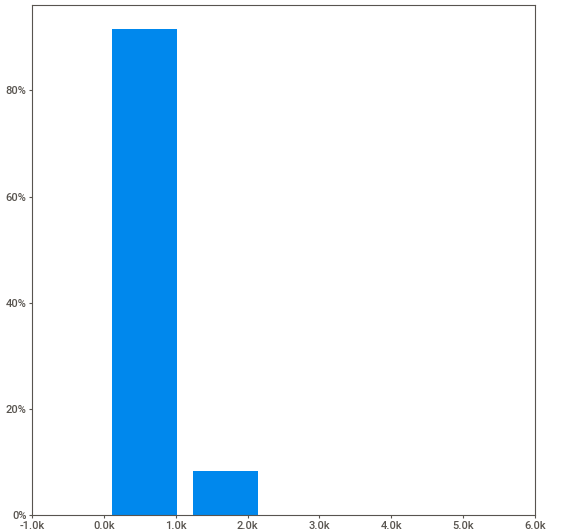
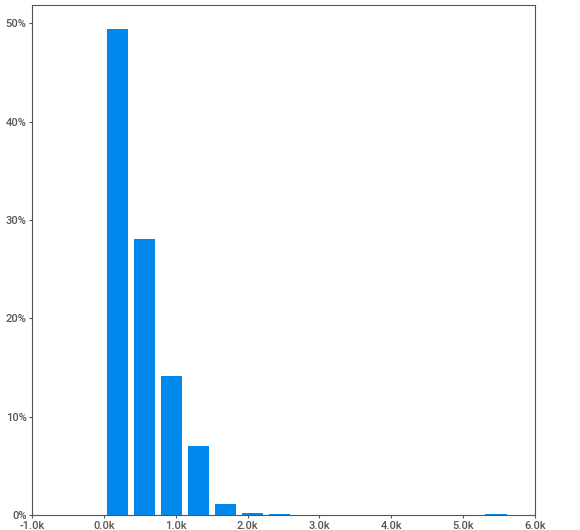
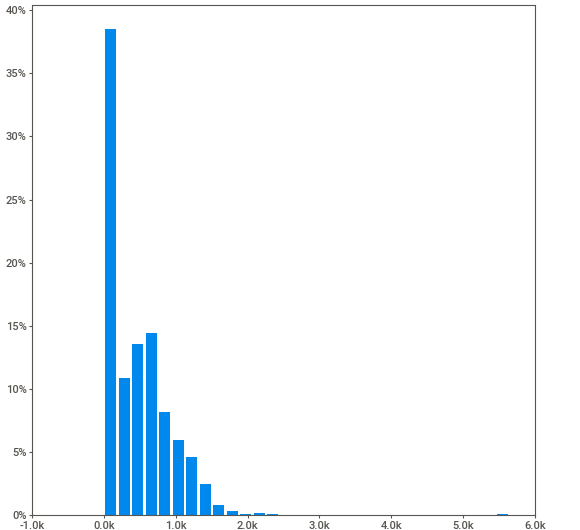
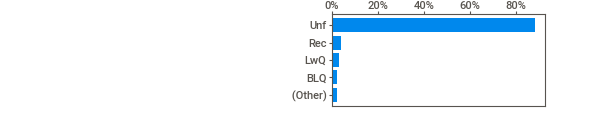
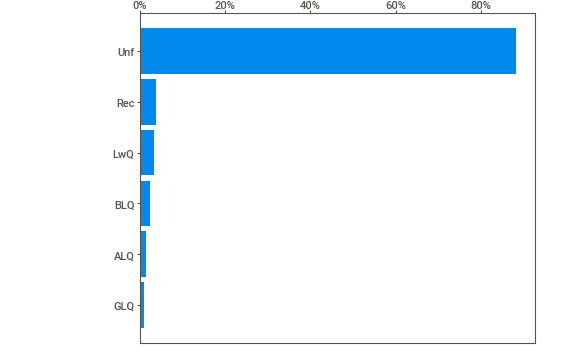
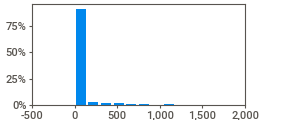
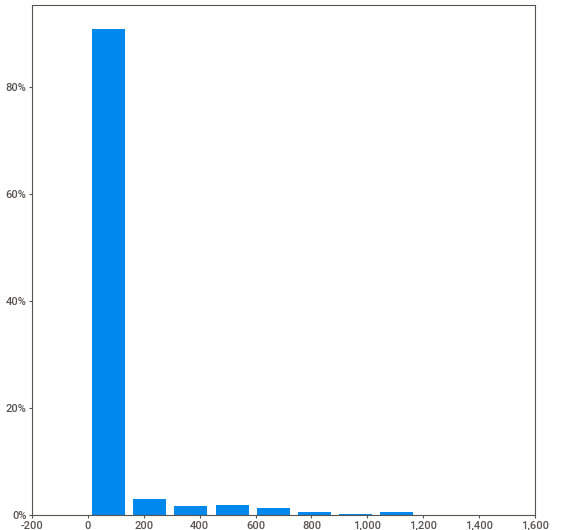
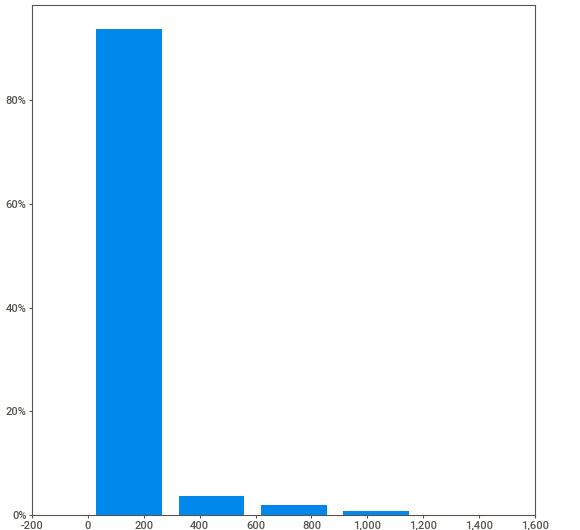
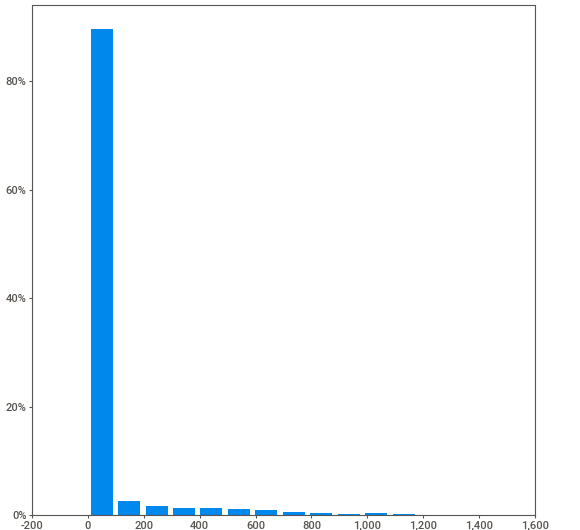
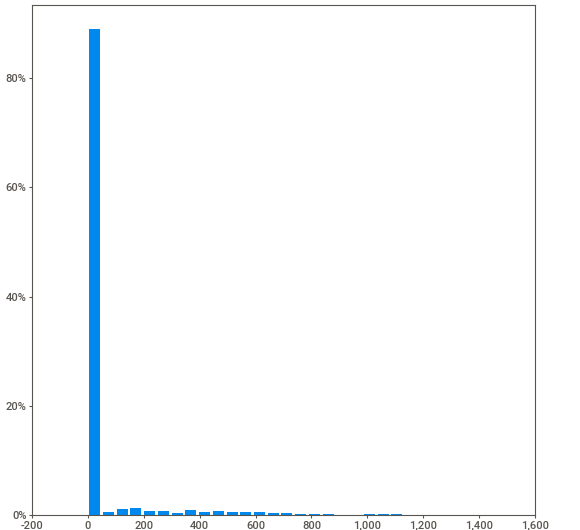
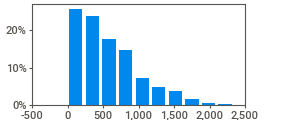
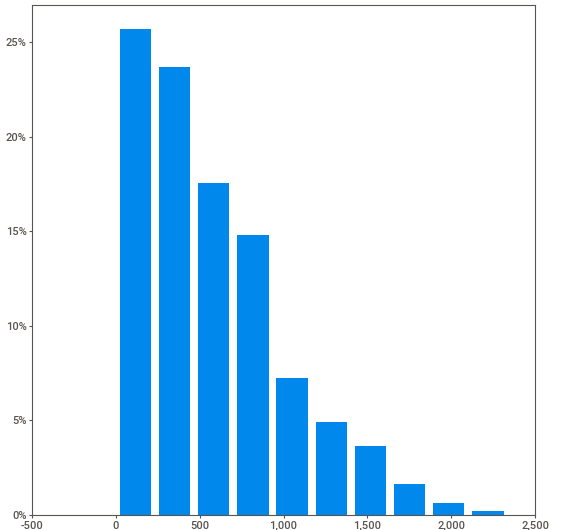
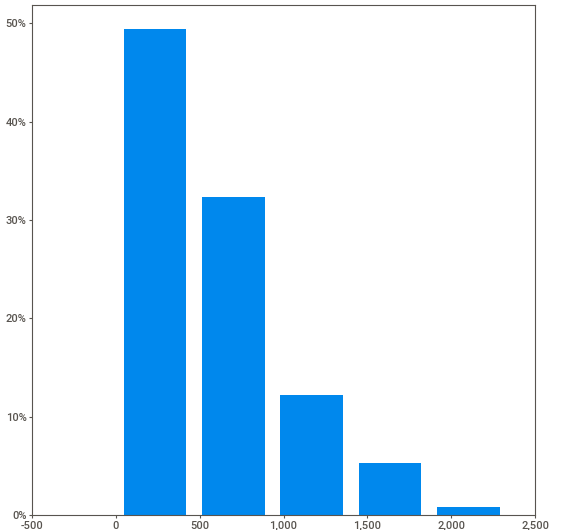
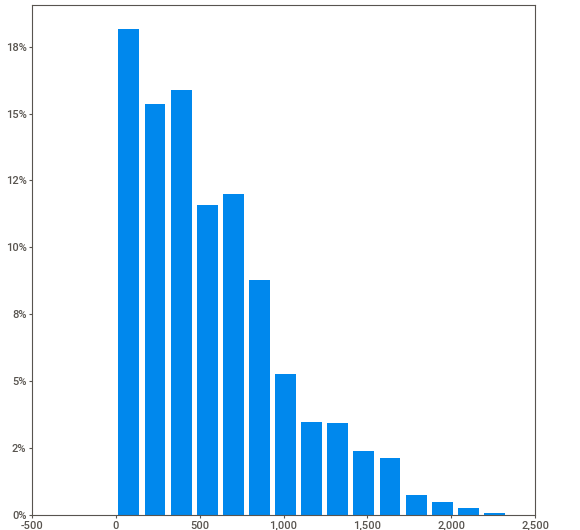
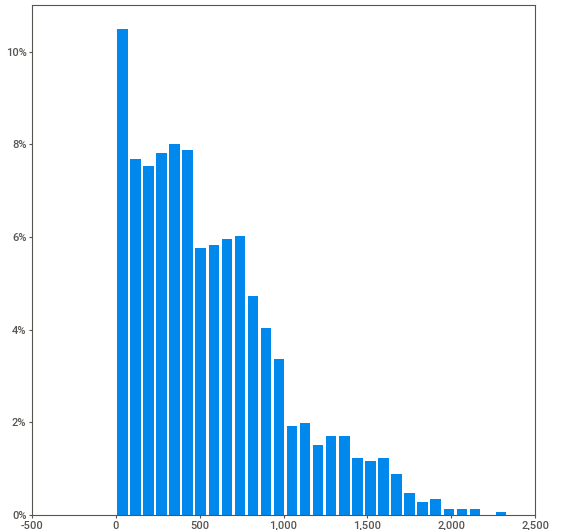
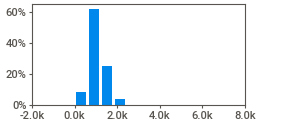
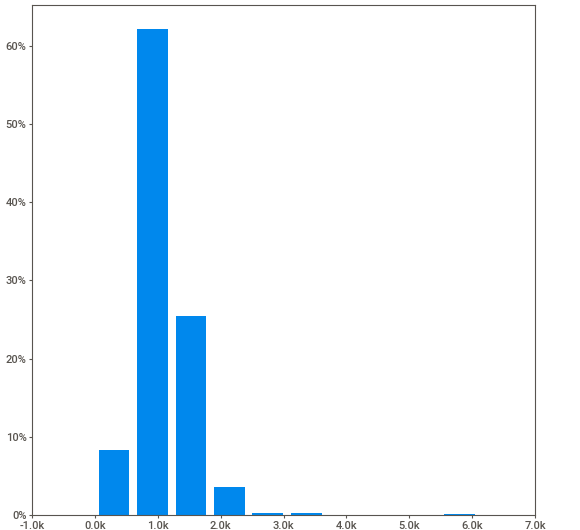
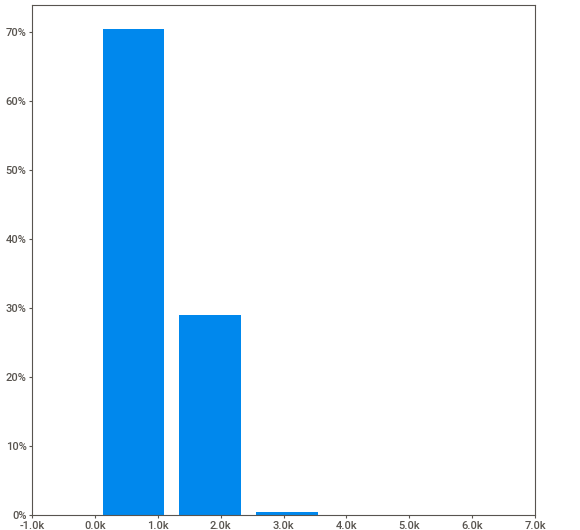
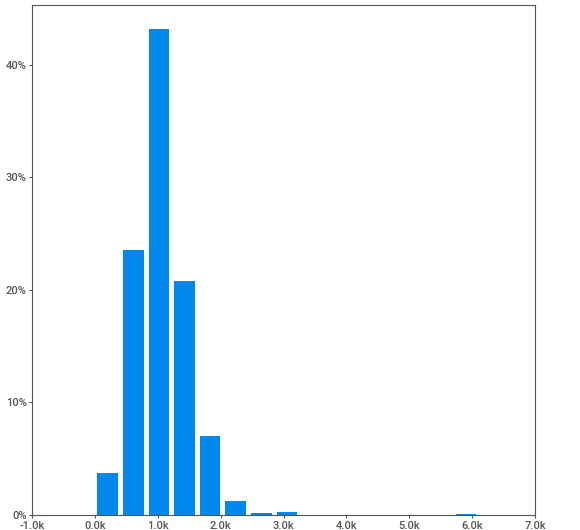
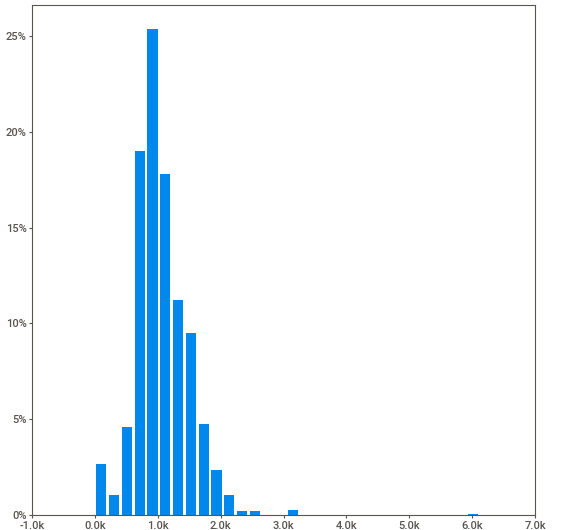
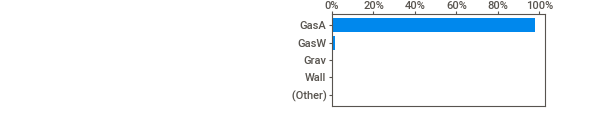
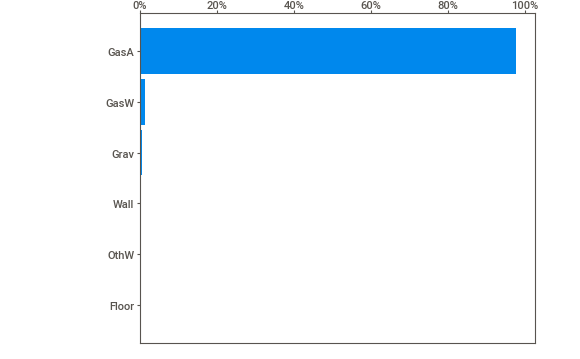
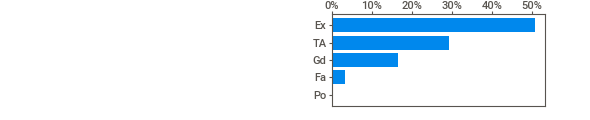
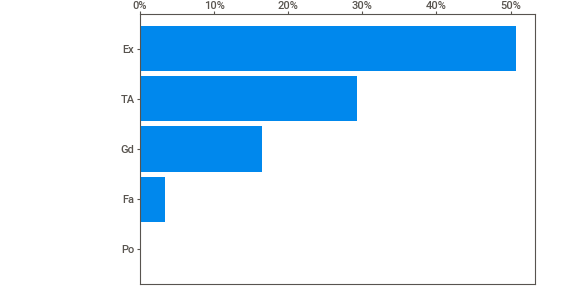
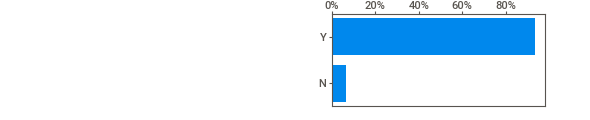
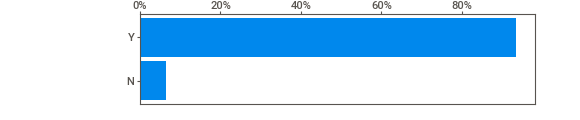
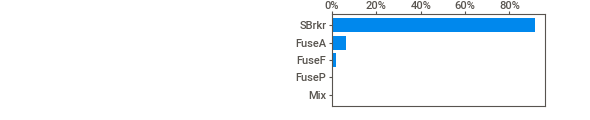
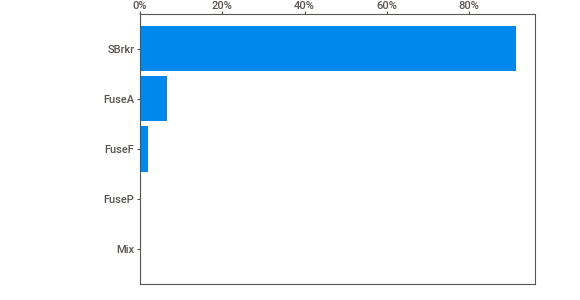
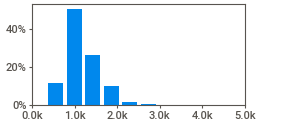
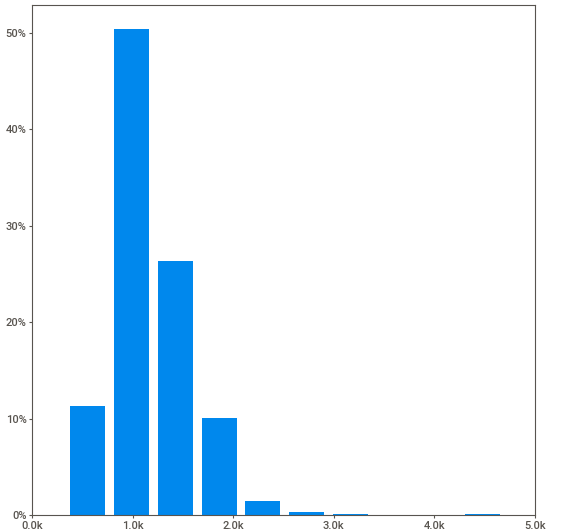
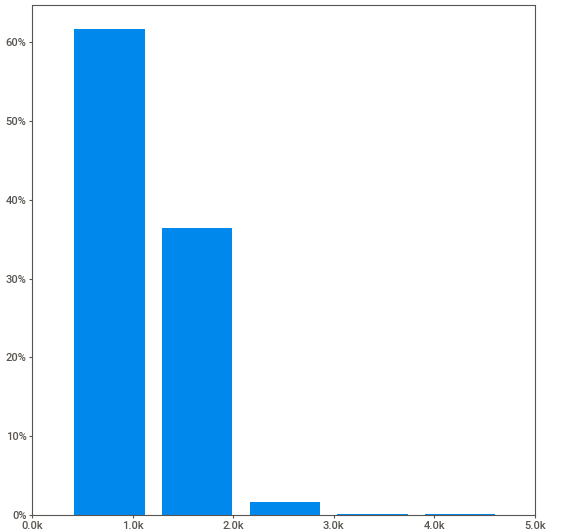
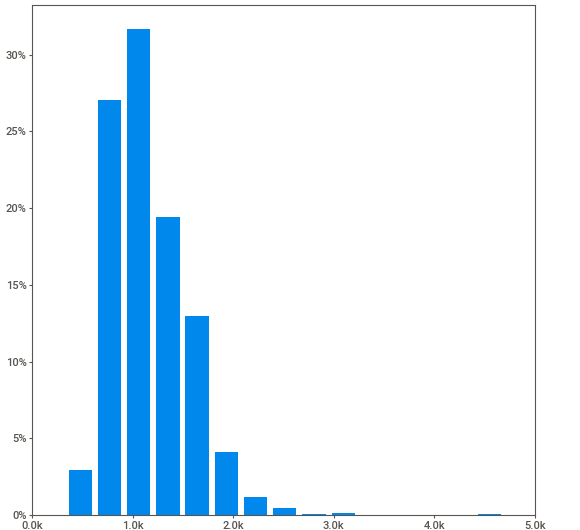
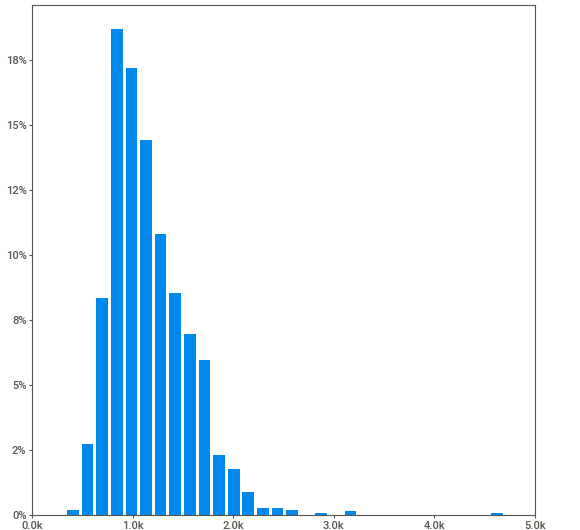
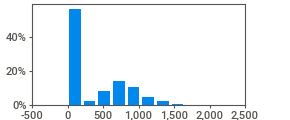
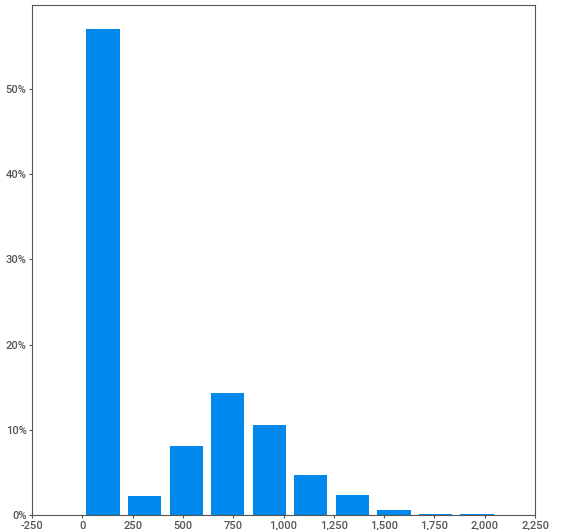
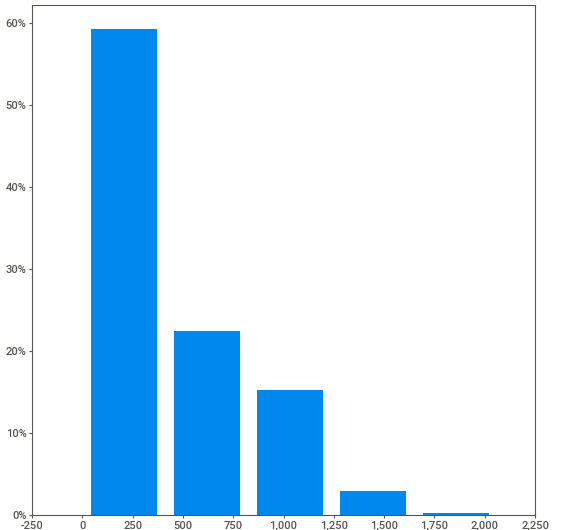
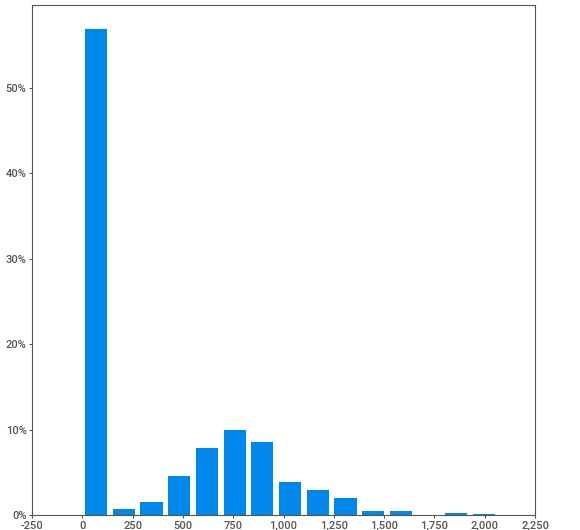
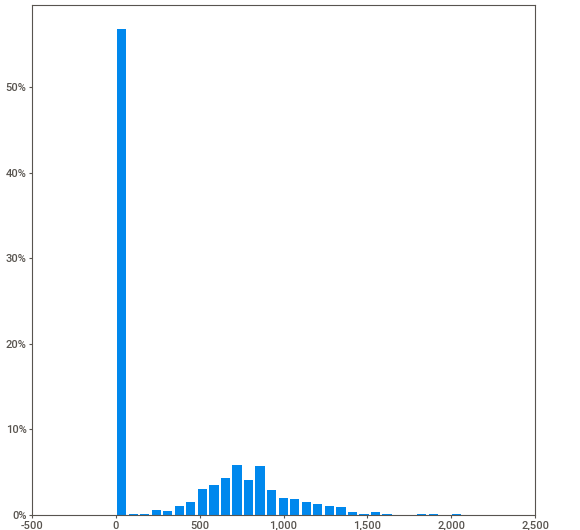
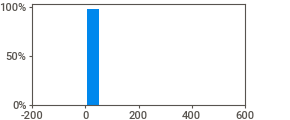
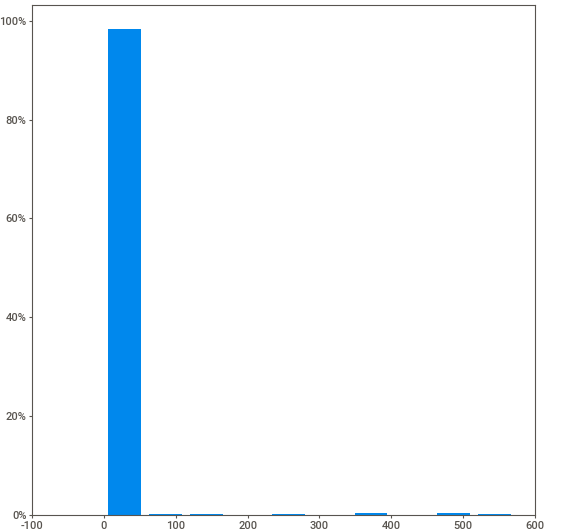
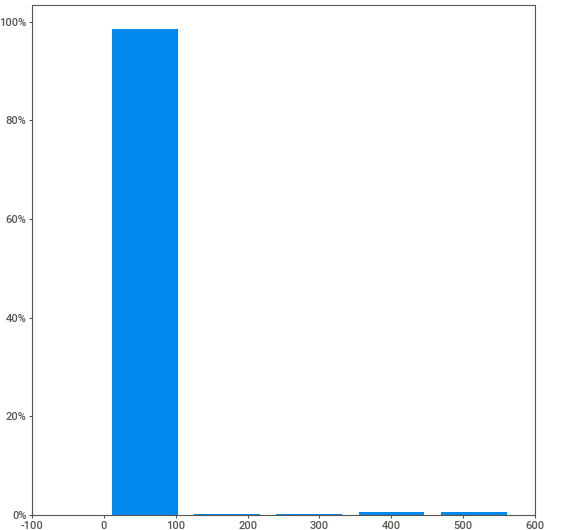
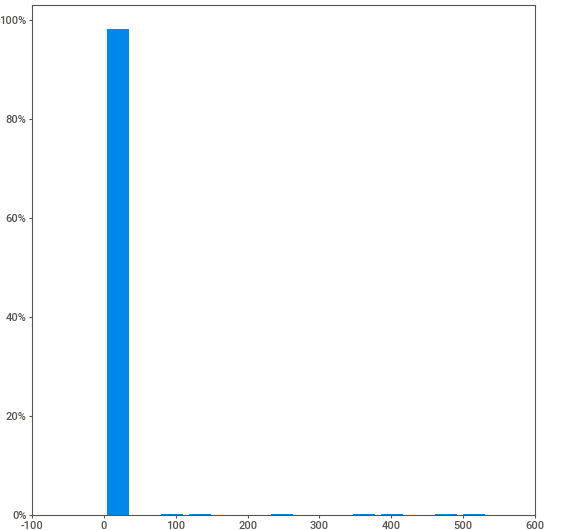
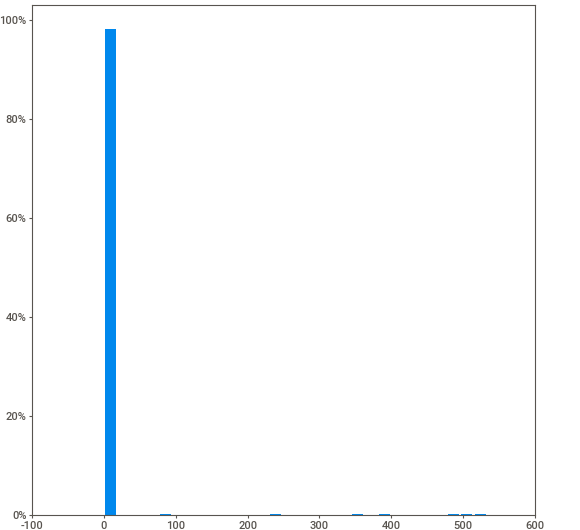
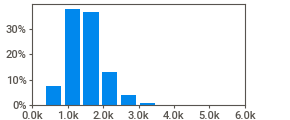
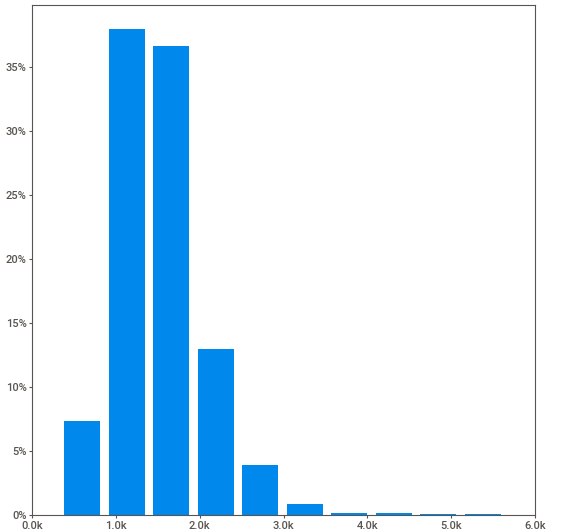
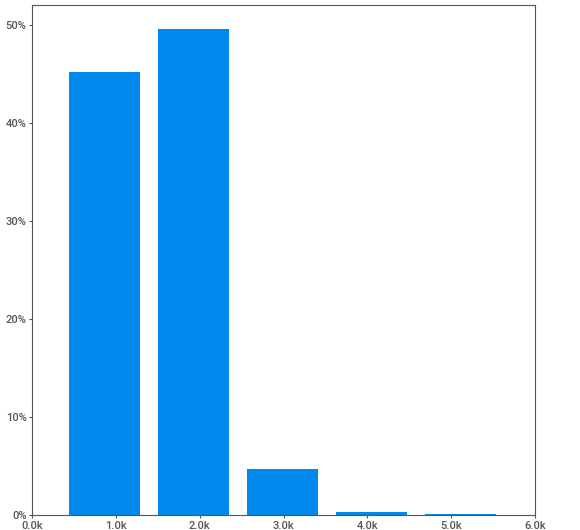
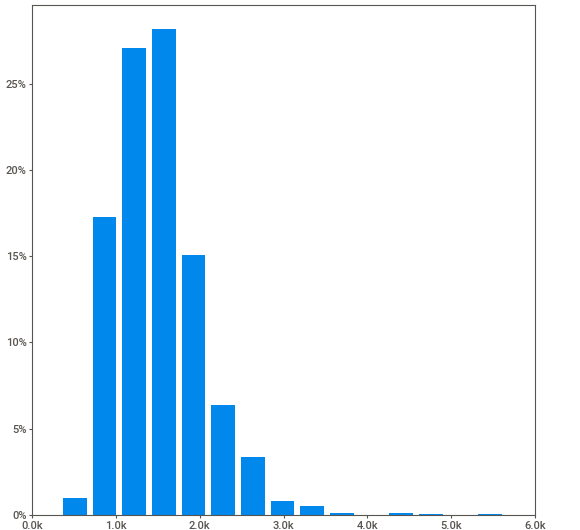
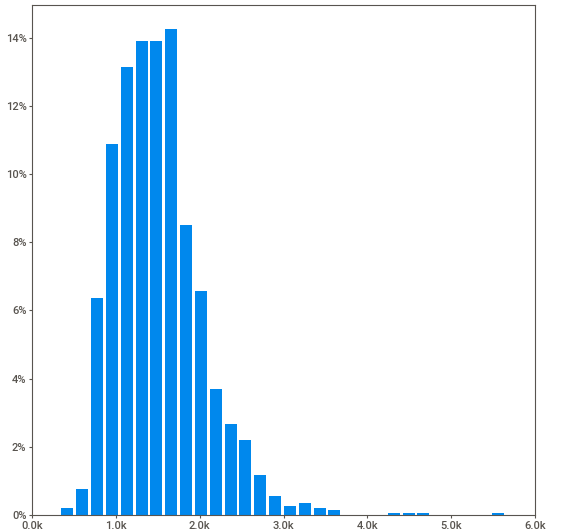
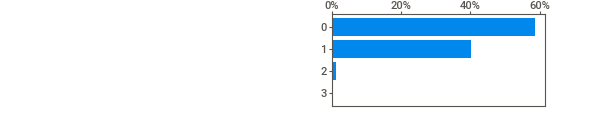
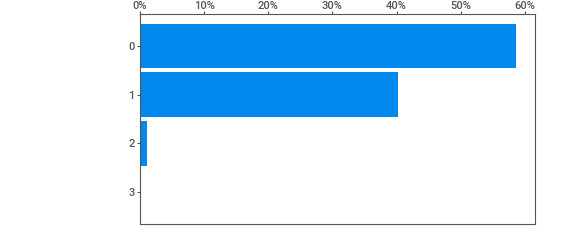
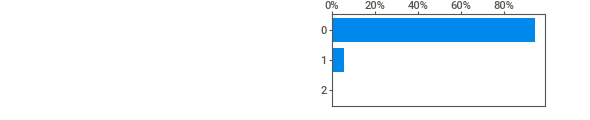
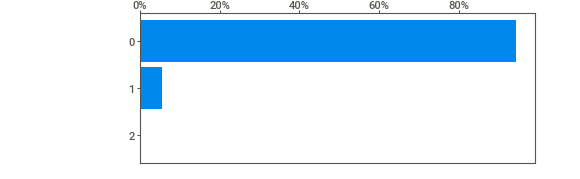
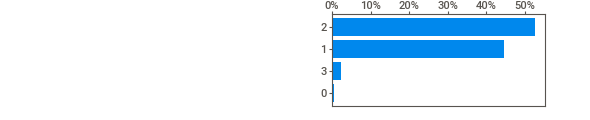
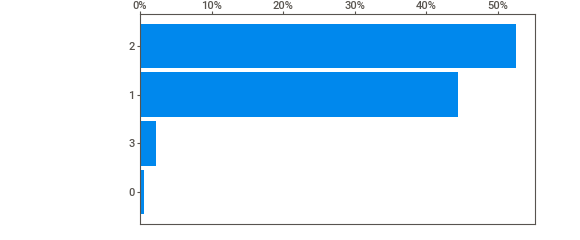
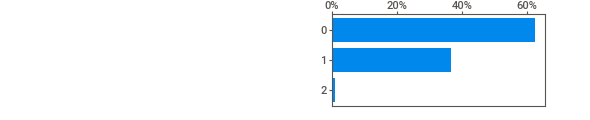
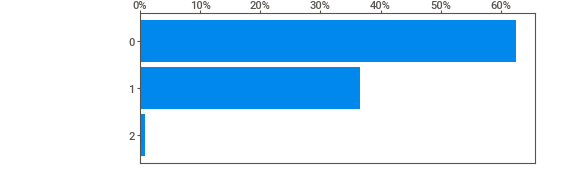
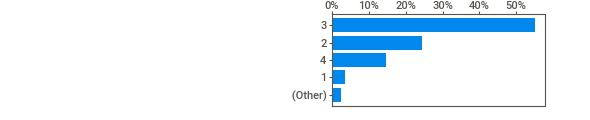
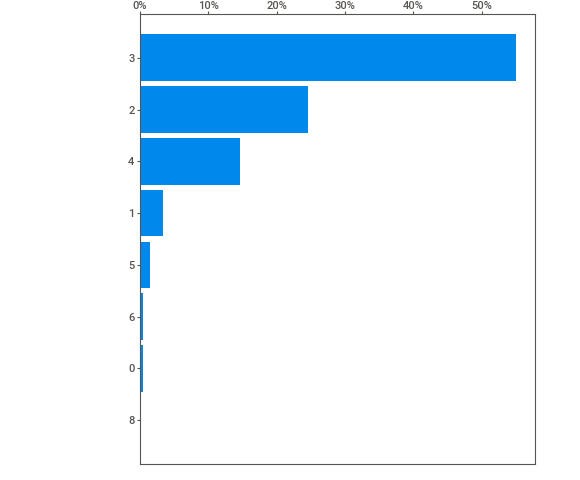
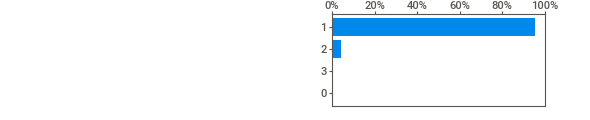
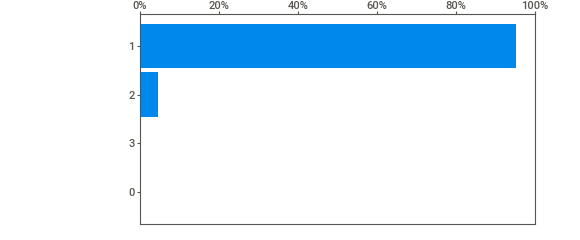
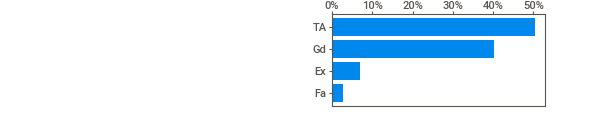
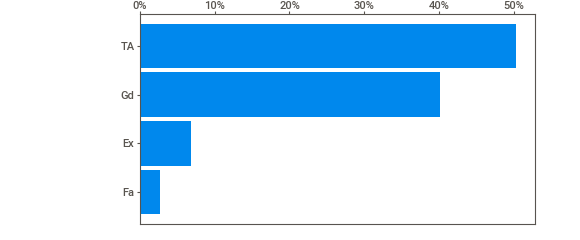
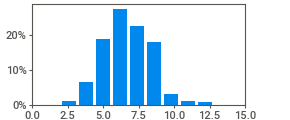
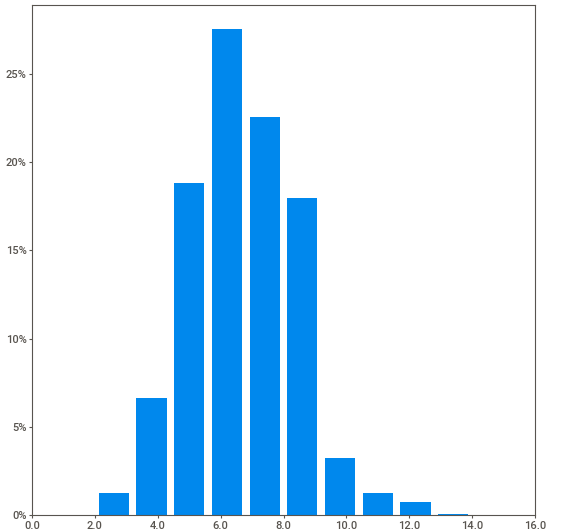
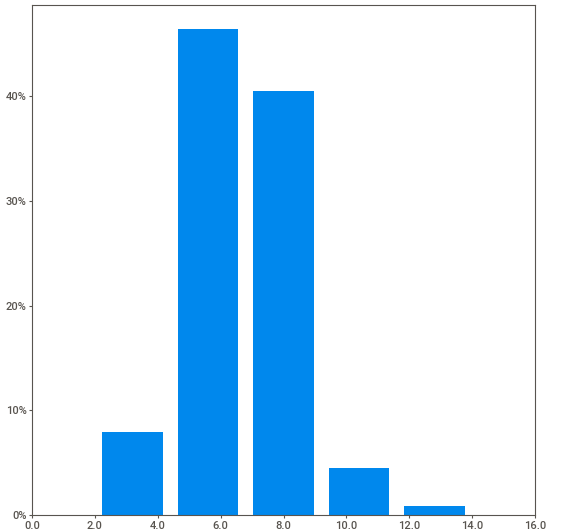
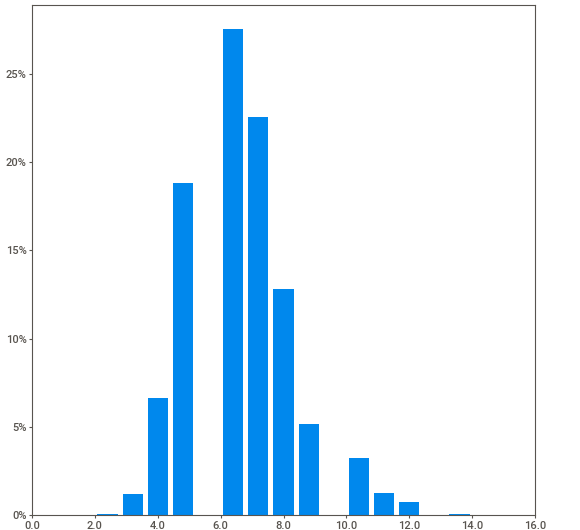
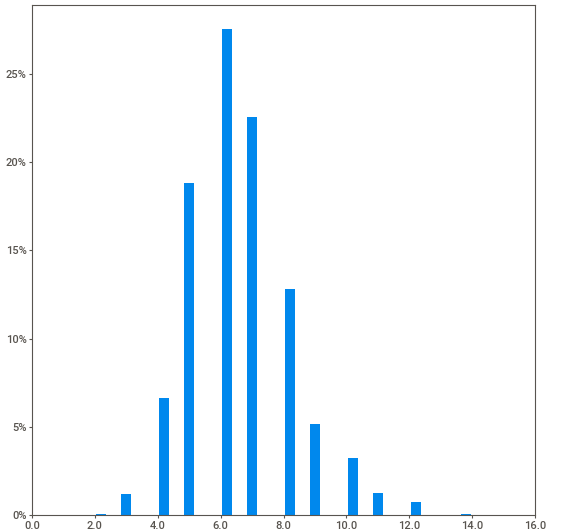
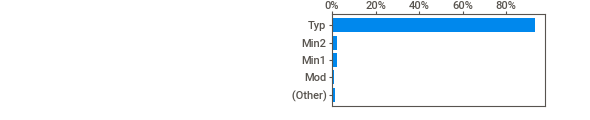
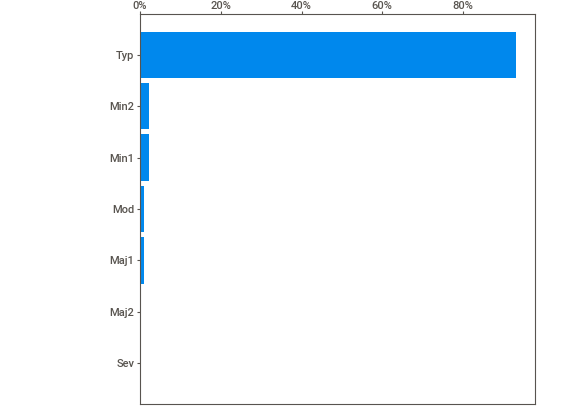
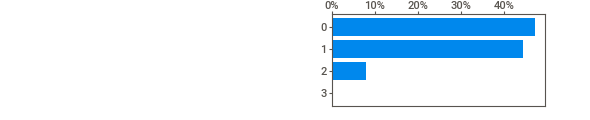
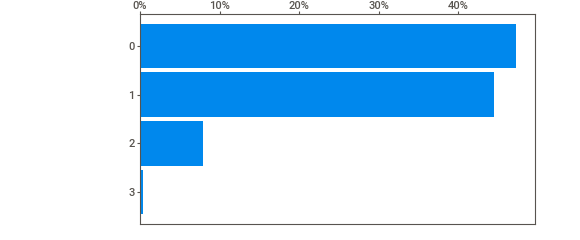
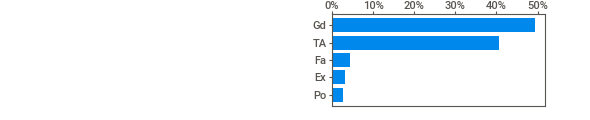
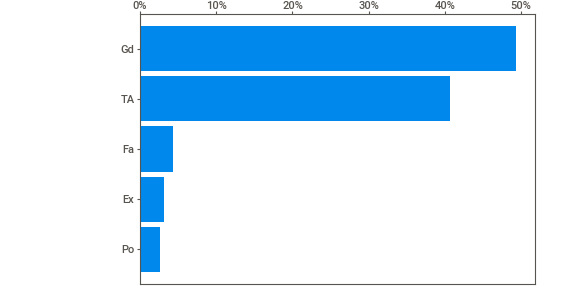
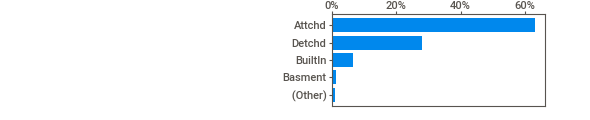
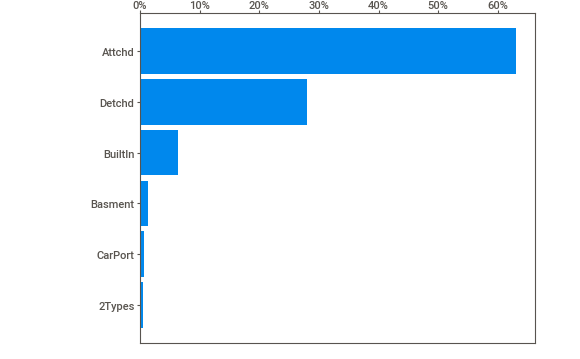
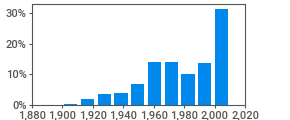
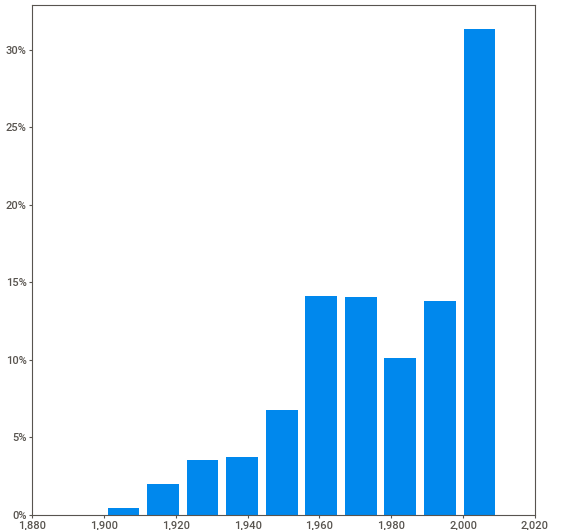
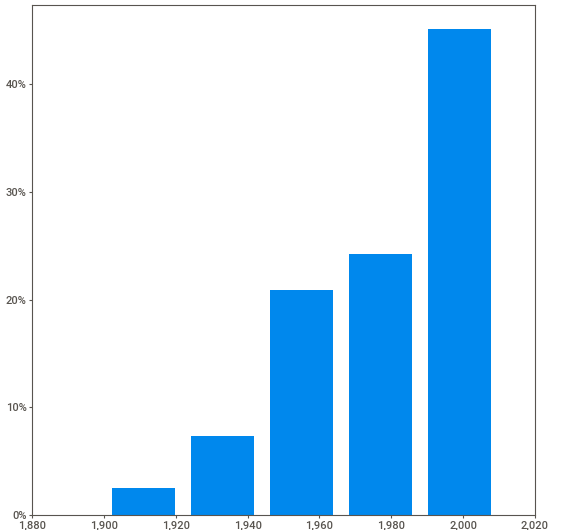
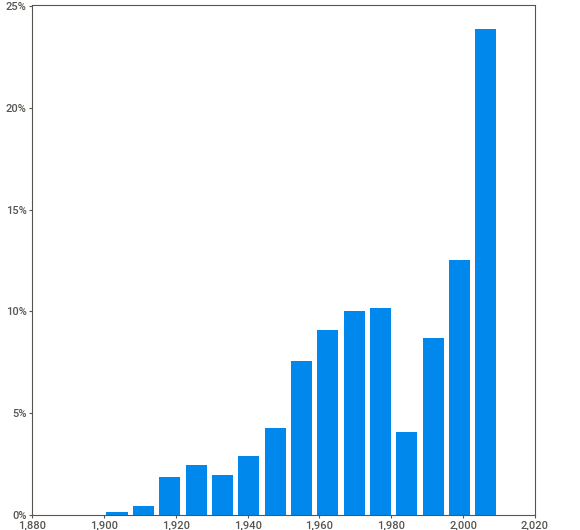
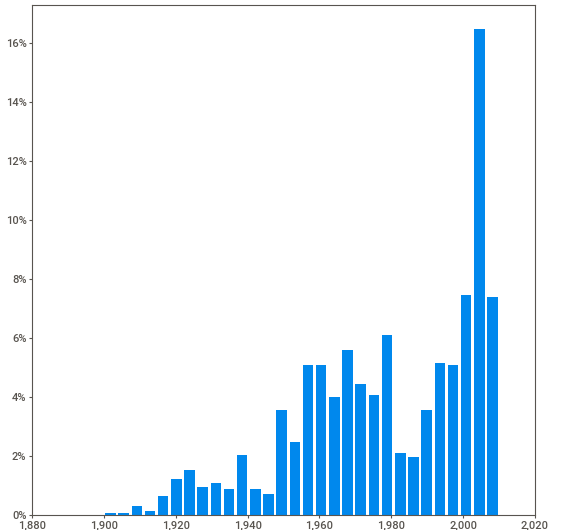
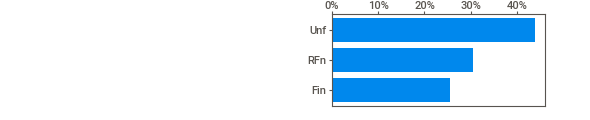
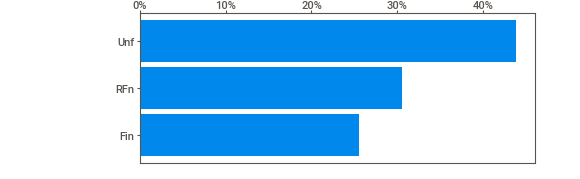
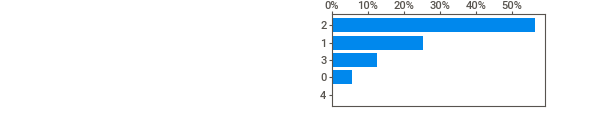
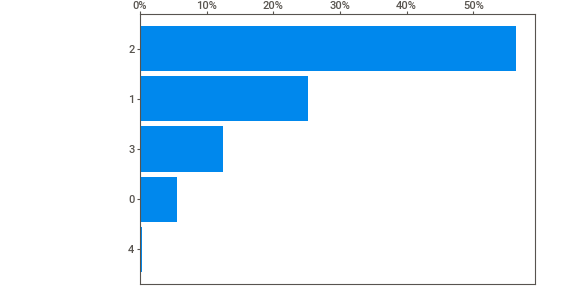
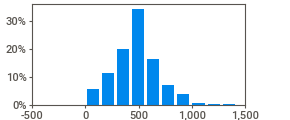
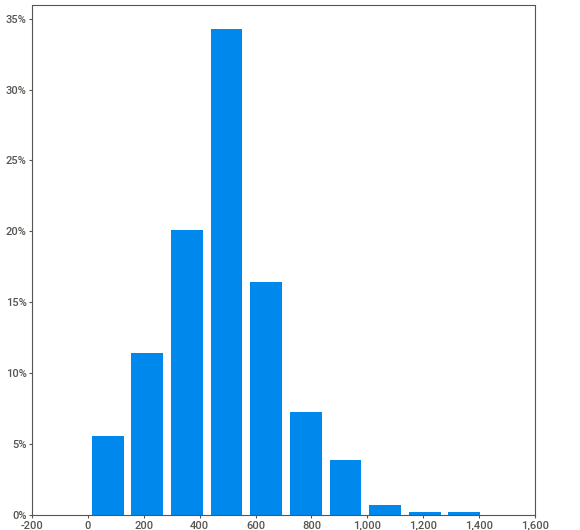
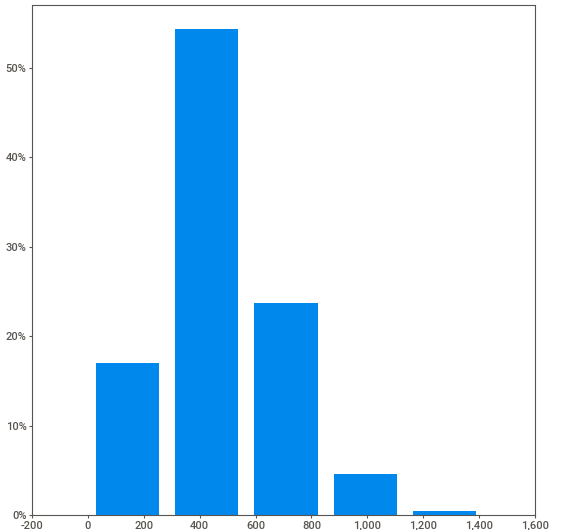
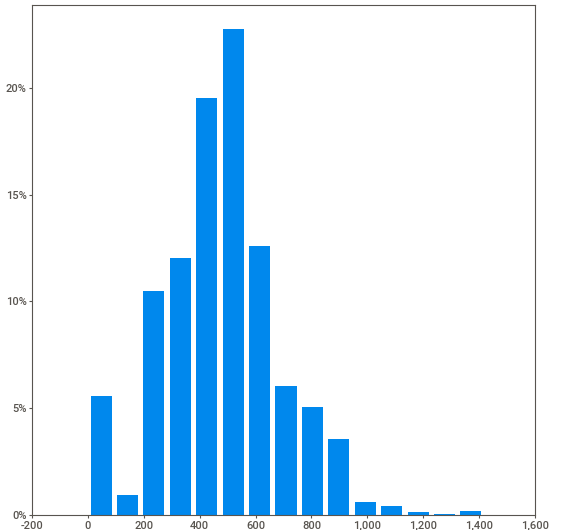
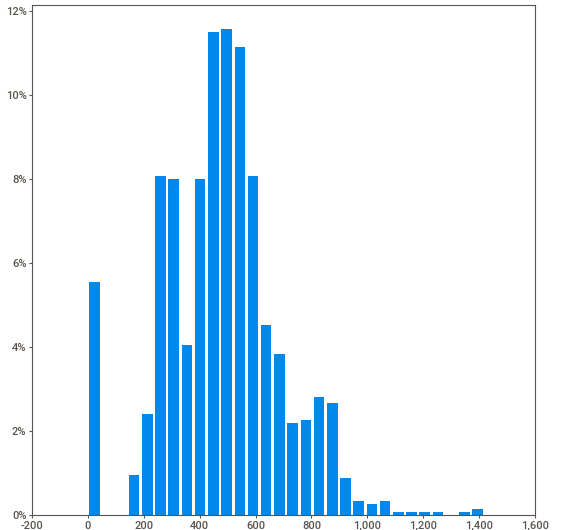
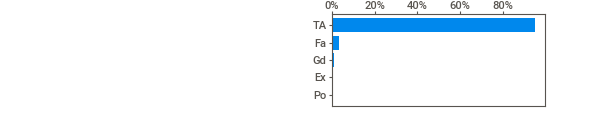
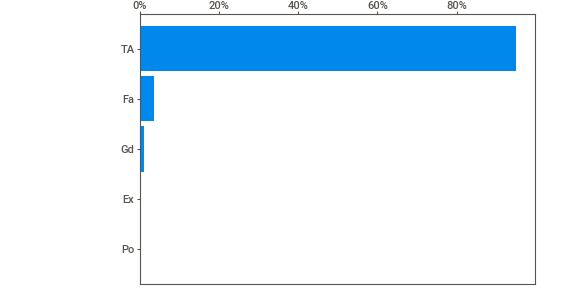
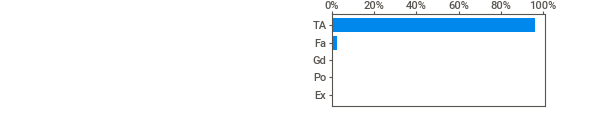
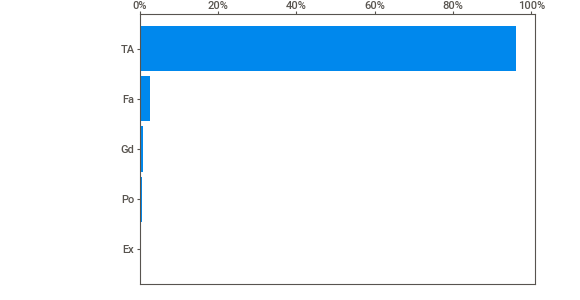
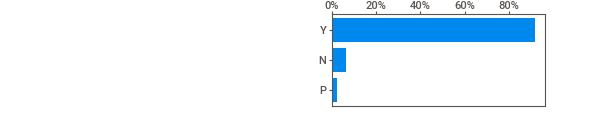
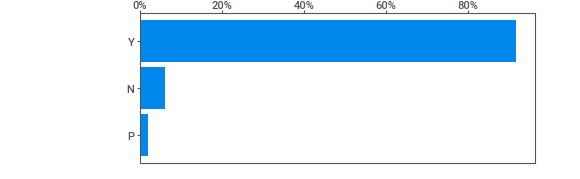
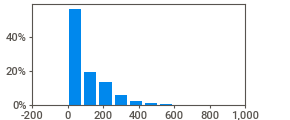
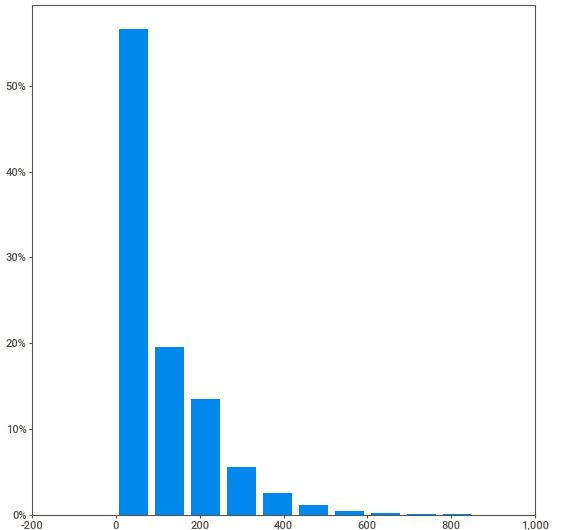
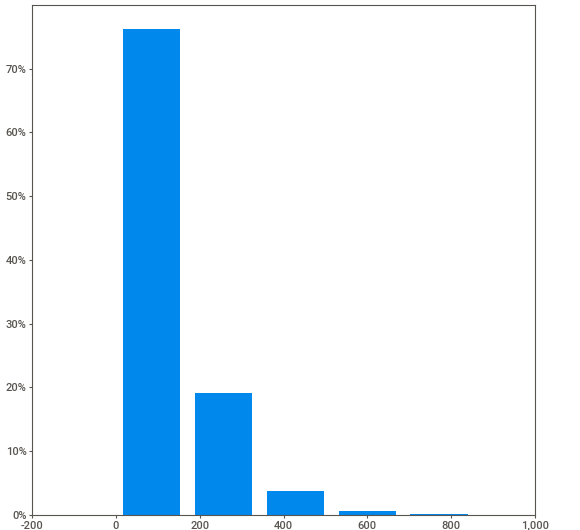
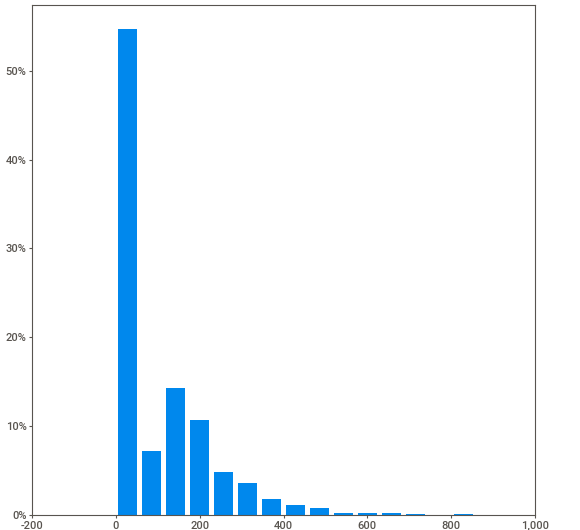
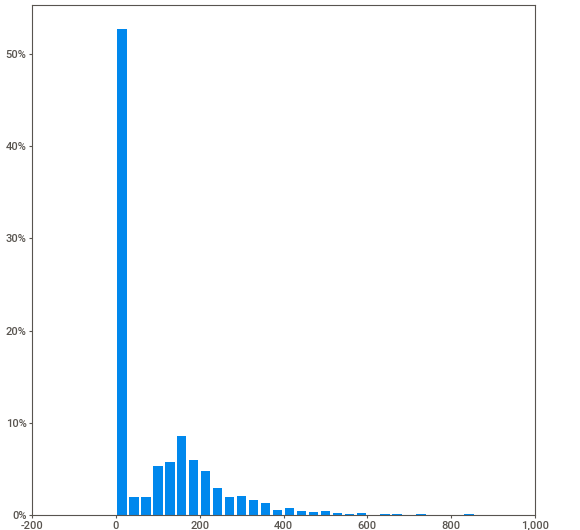
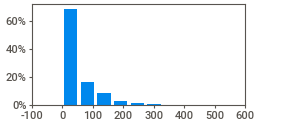
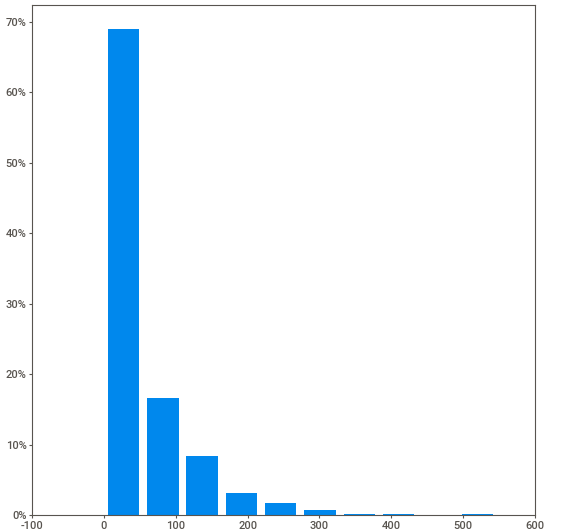
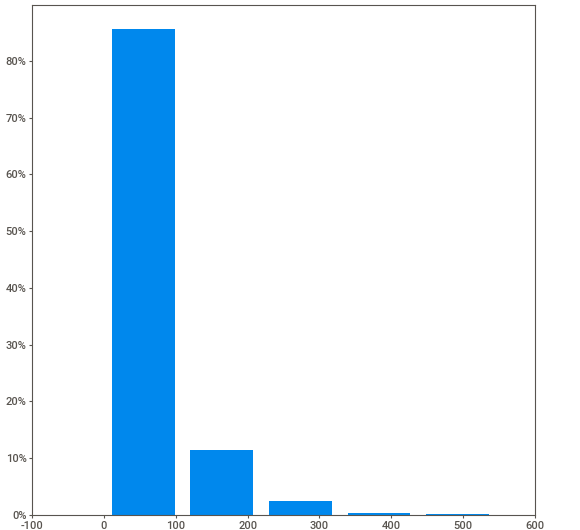
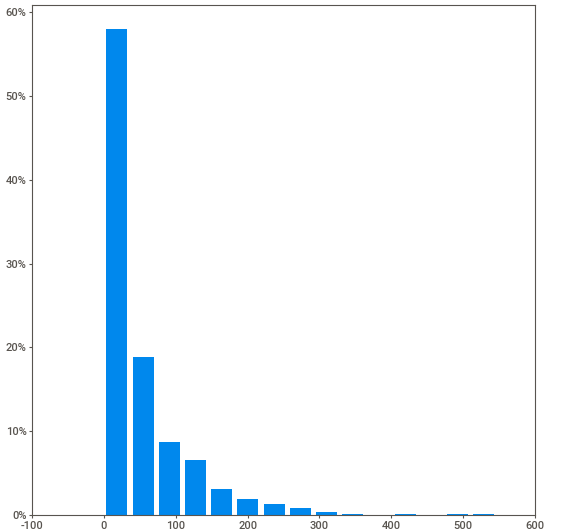
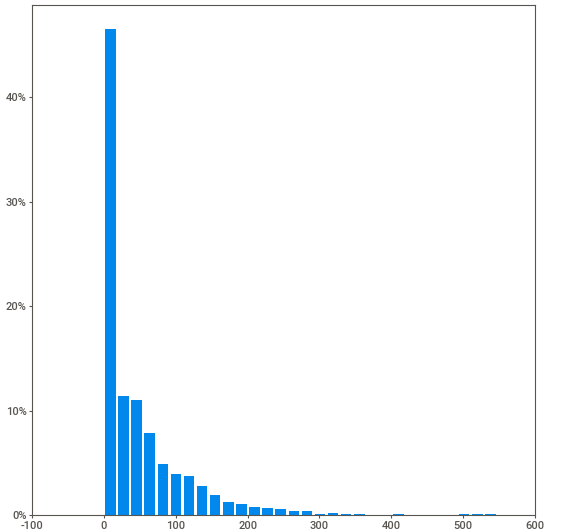
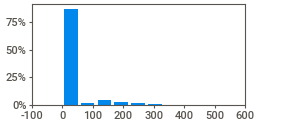
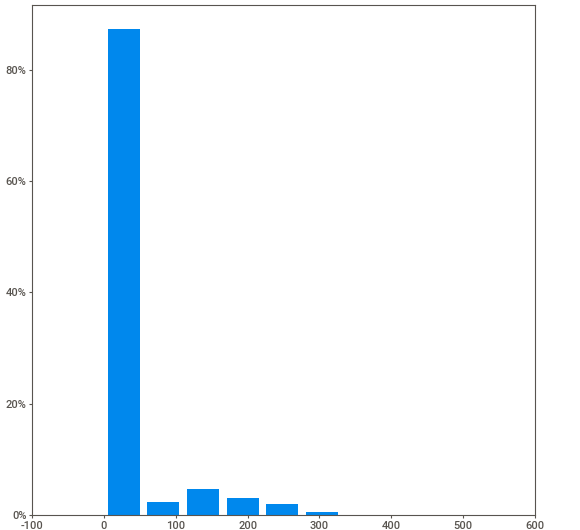
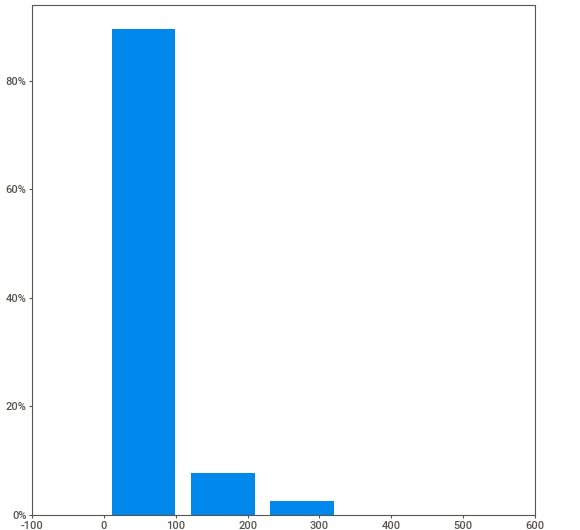
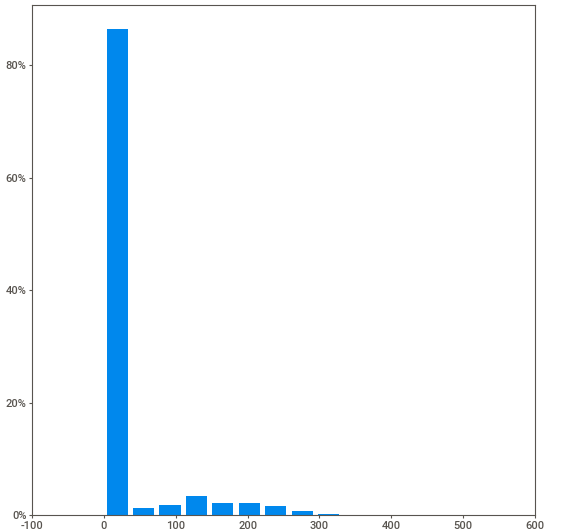
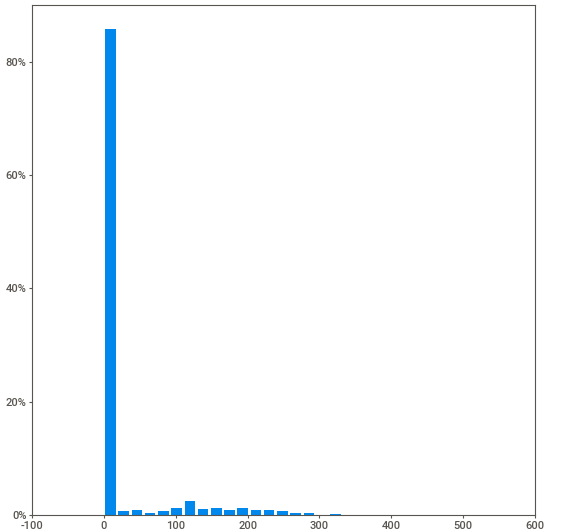
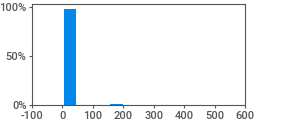
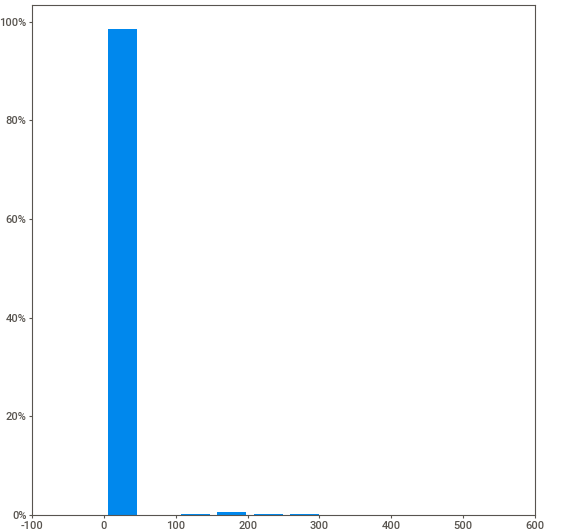
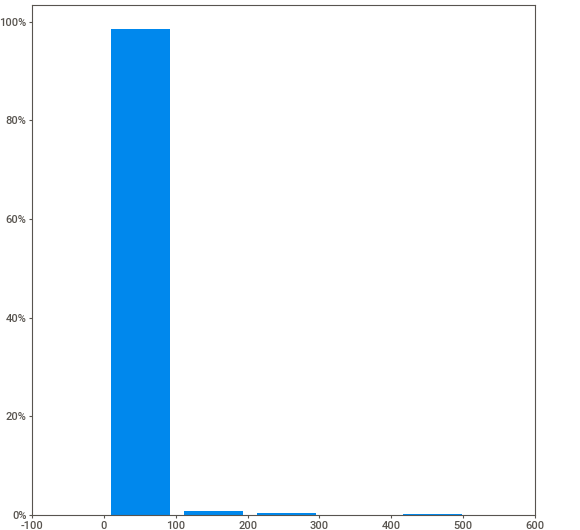
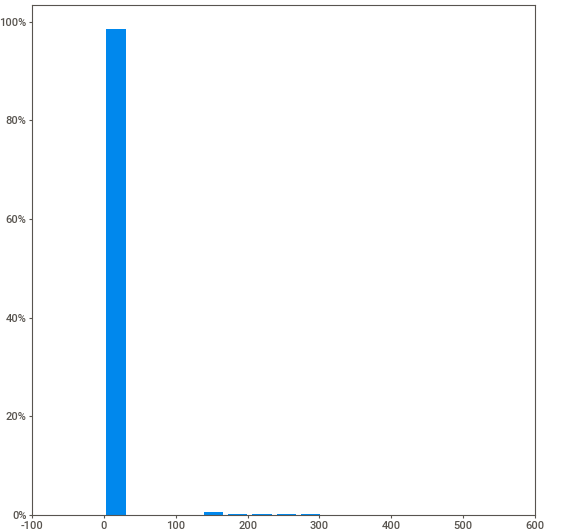
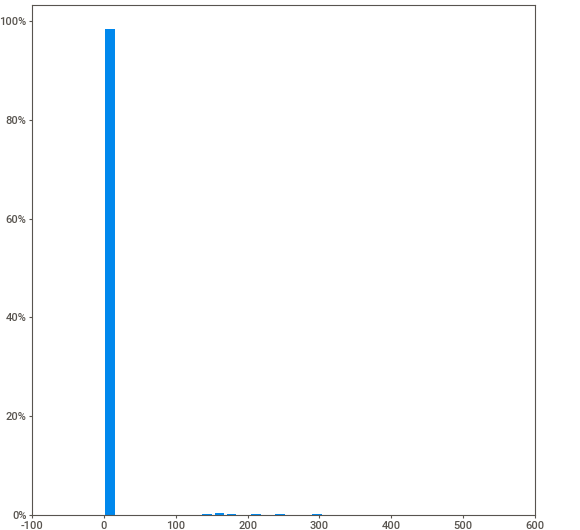
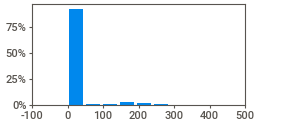
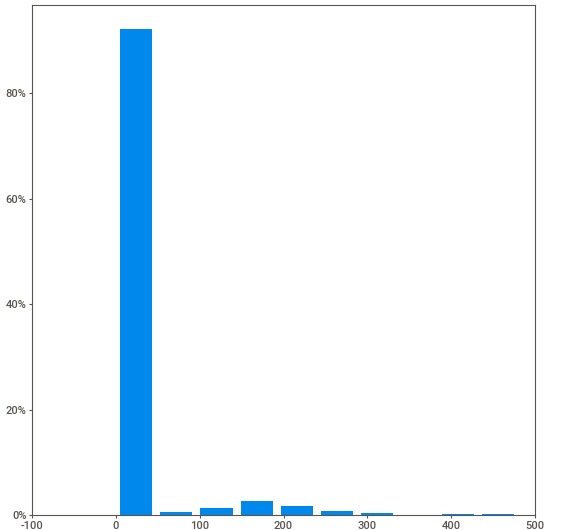
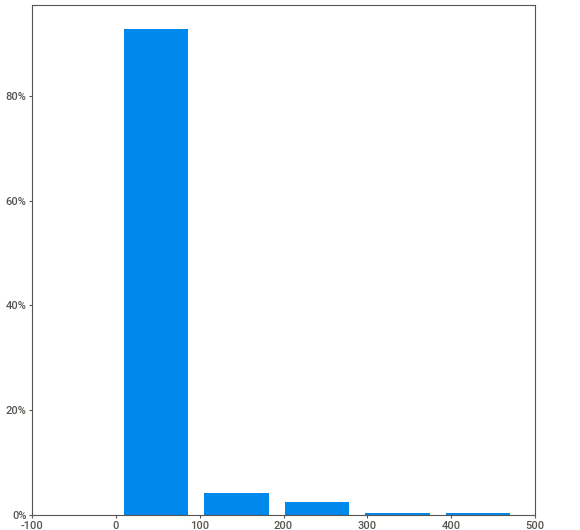
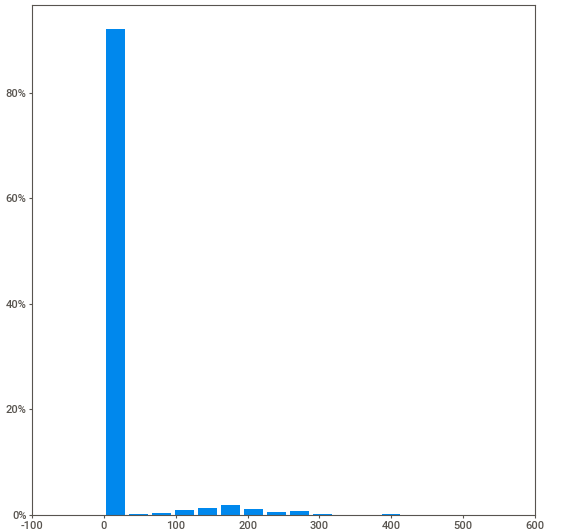
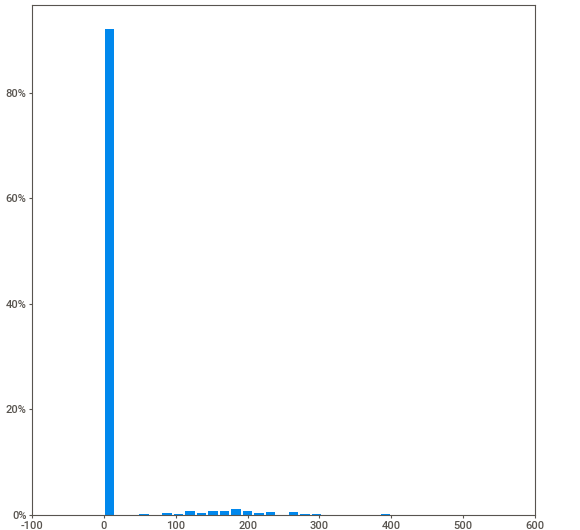
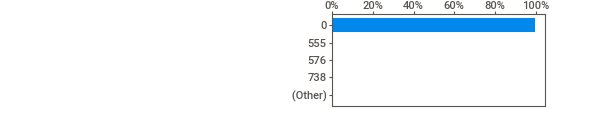
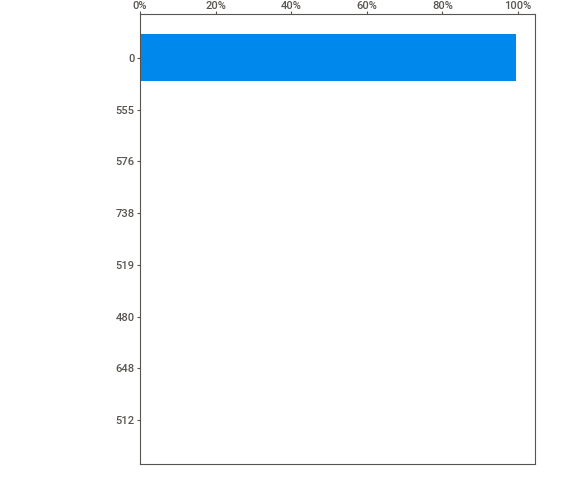
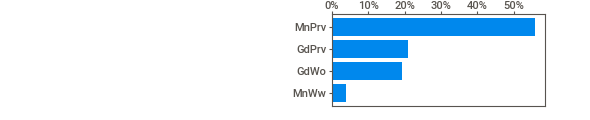
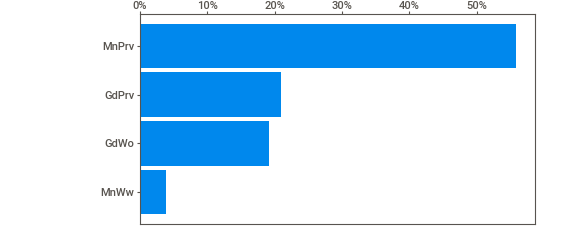
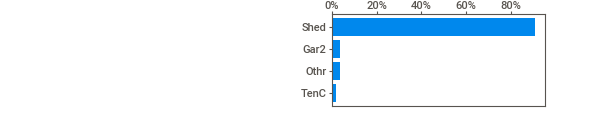
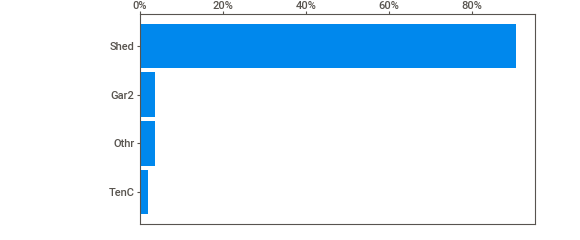
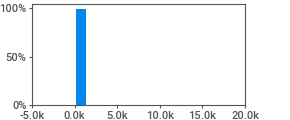
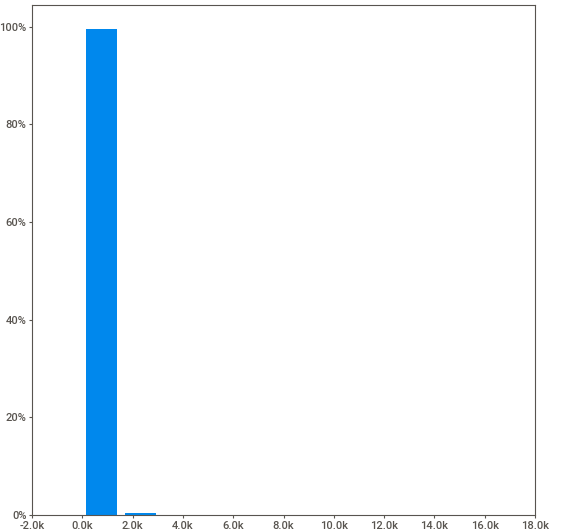
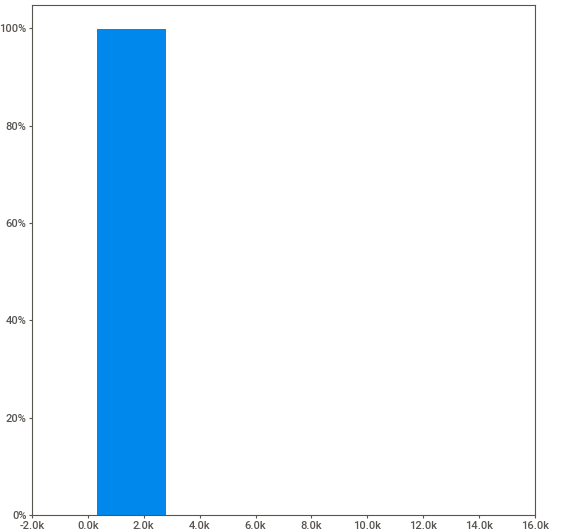
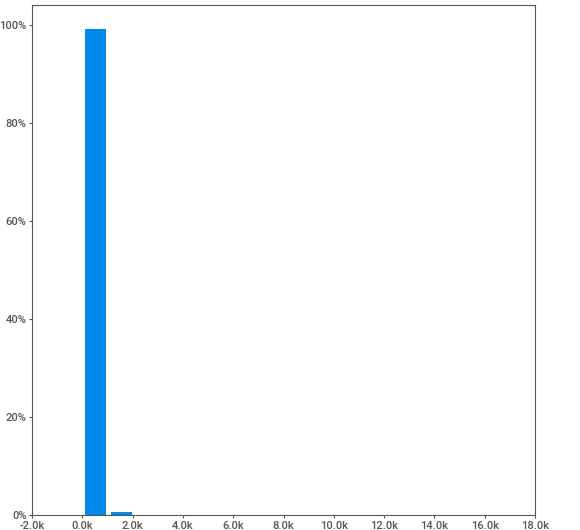
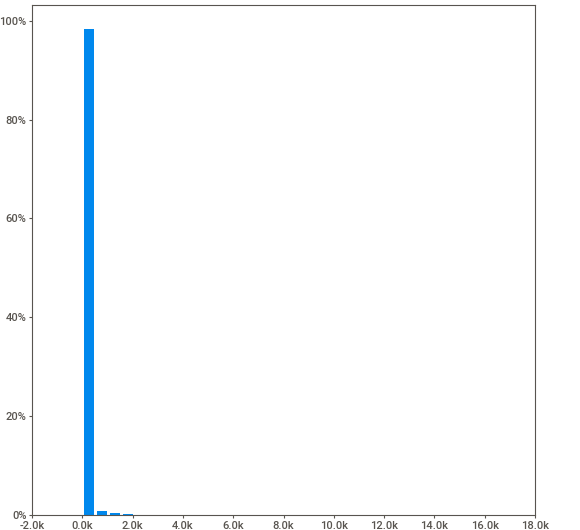
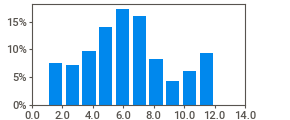
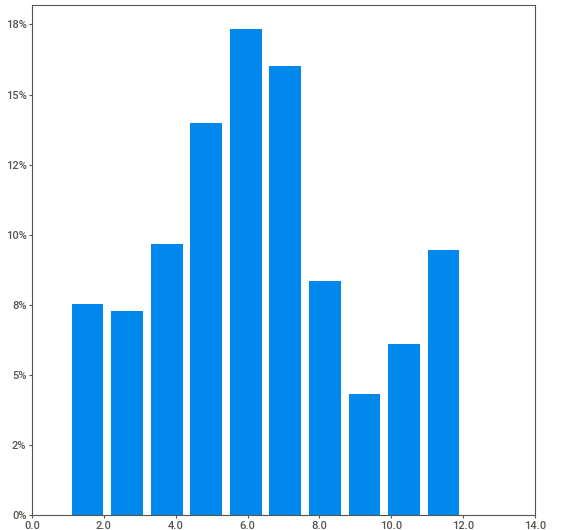
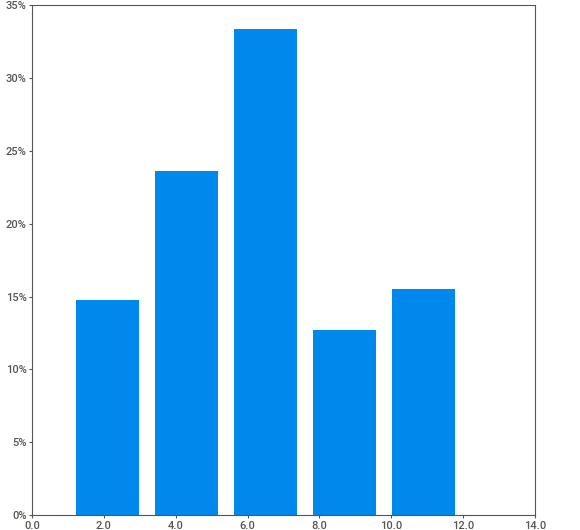
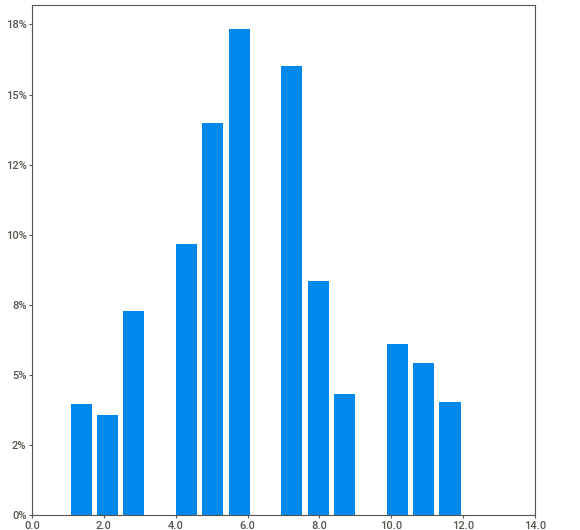
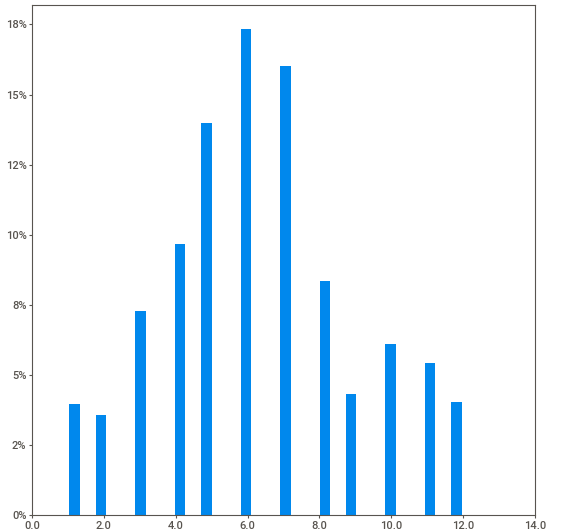
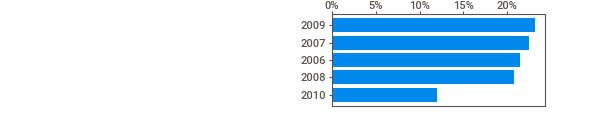
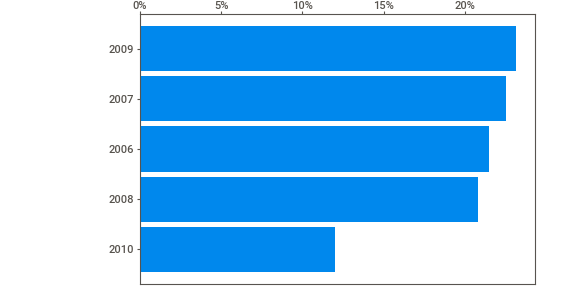
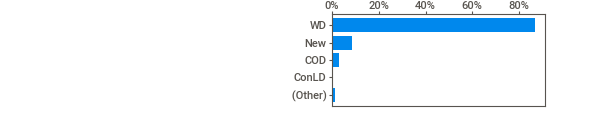
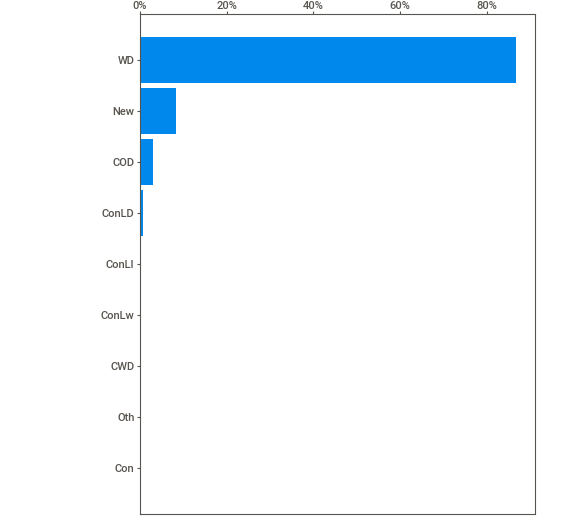
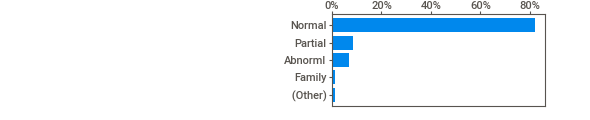
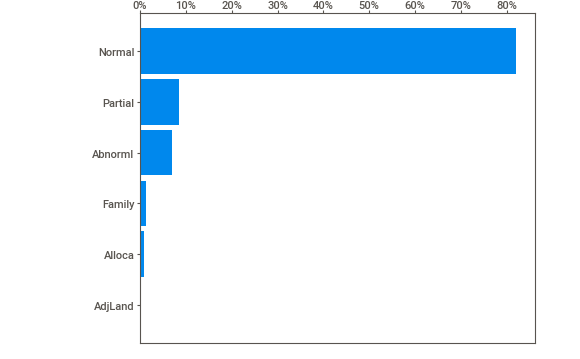
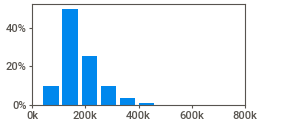
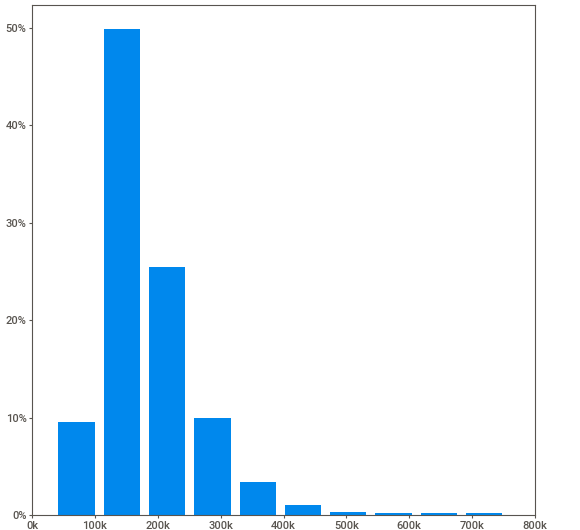
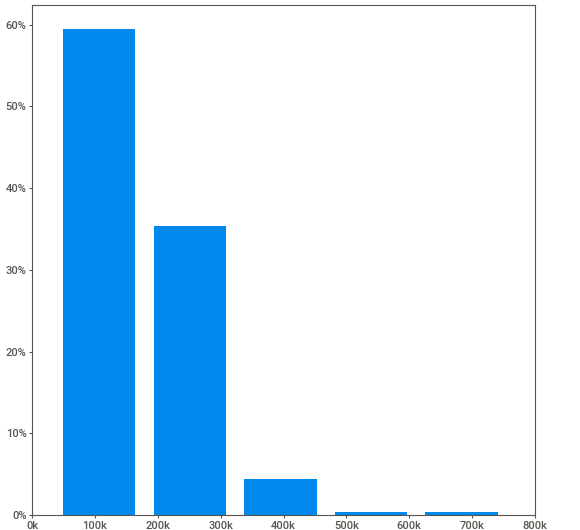
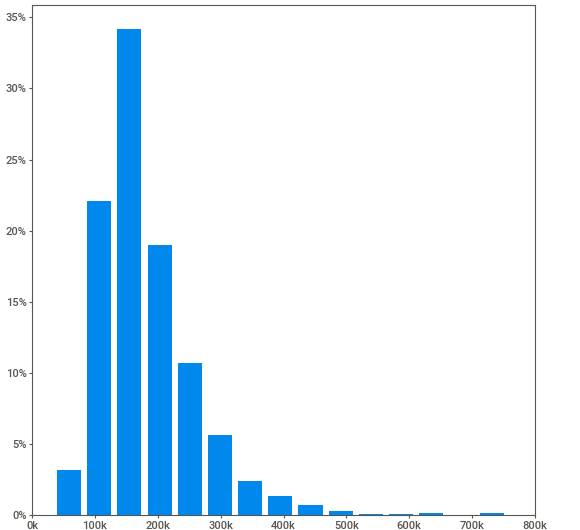
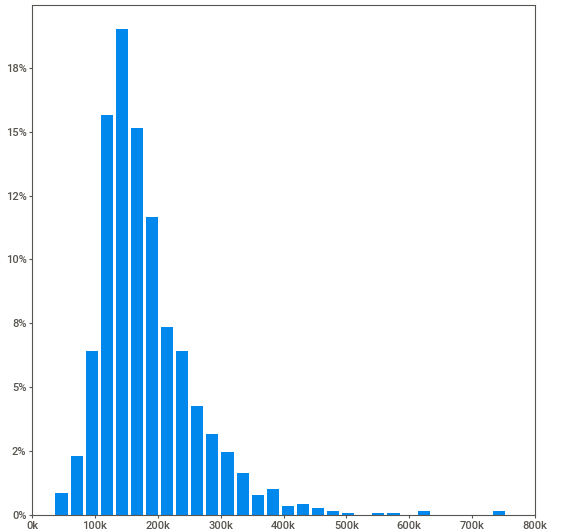
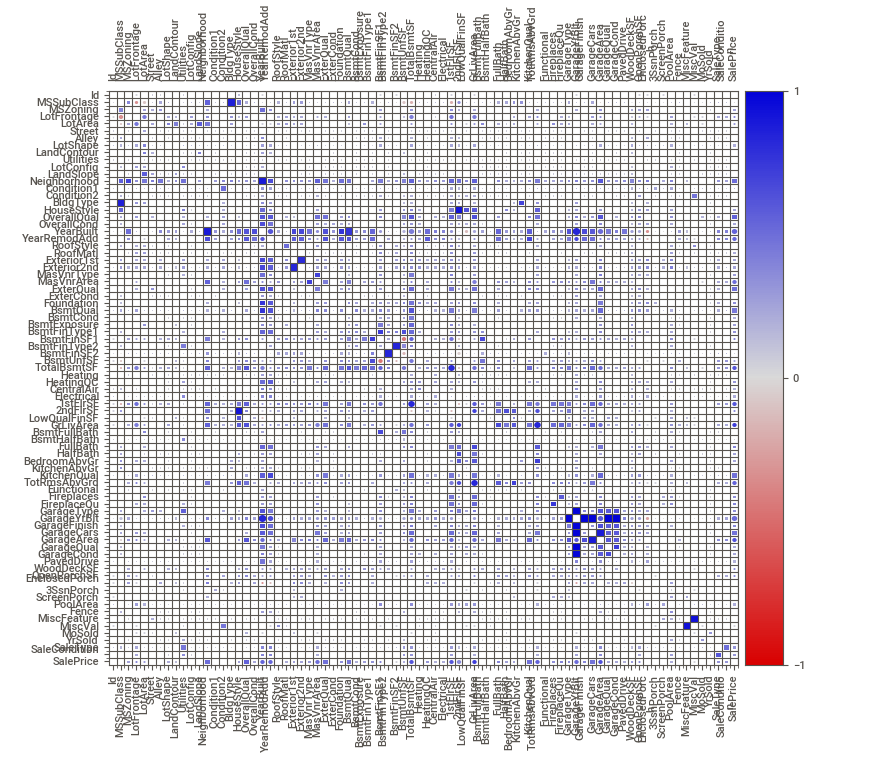
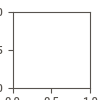

In [10]:
import sweetviz as sw

house_report = sw.analyze(df)
house_report.show_notebook(layout='vertical')

-1460ROWS
-0DUPLICATES
-81FEATURES
-54CATEGORICAL
-26NUMERICAL

In [11]:
categorical=list(df.select_dtypes(include='object').columns)
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
numerical=list(train.select_dtypes(exclude='object').columns)
numerical

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

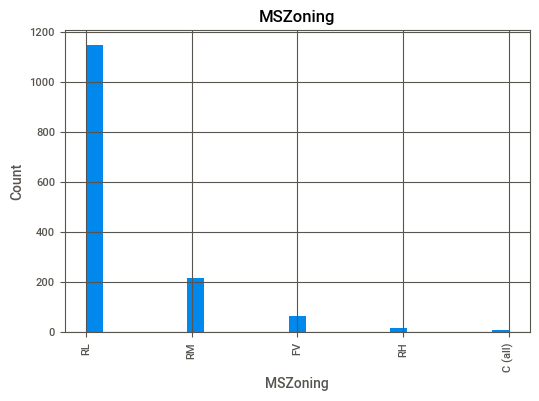

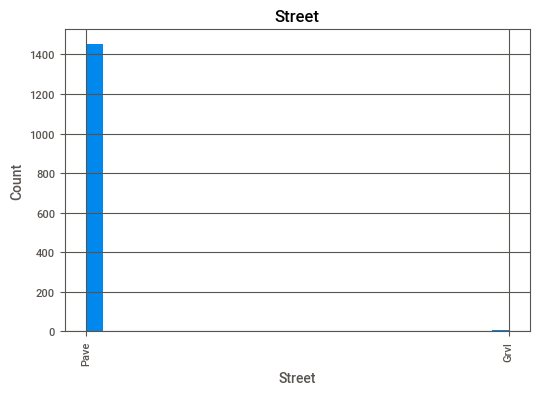

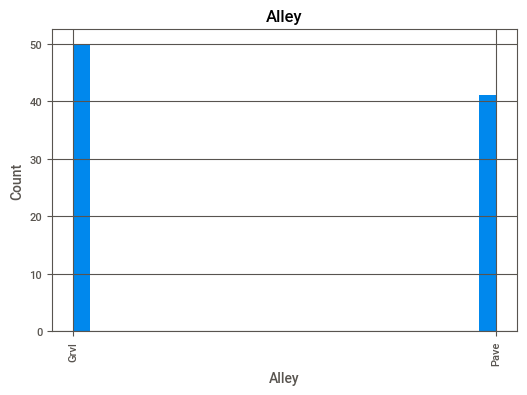

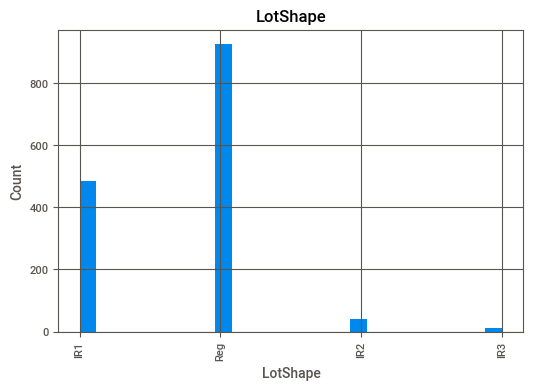

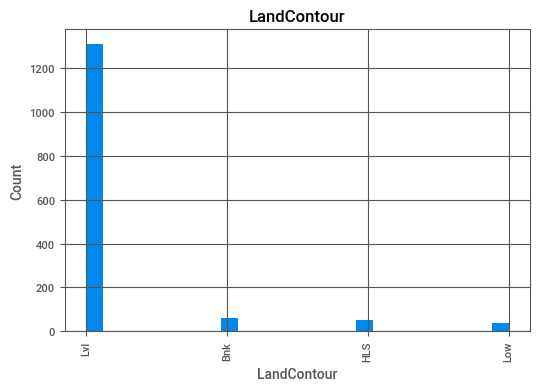

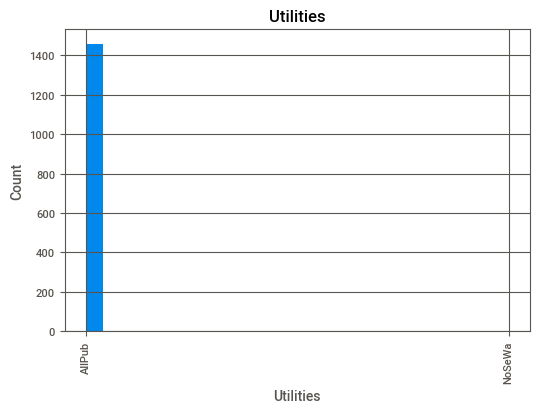

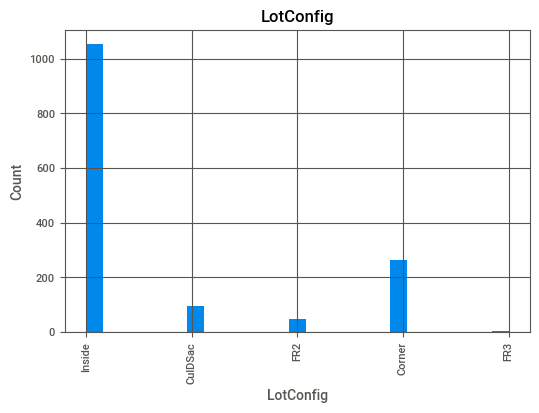

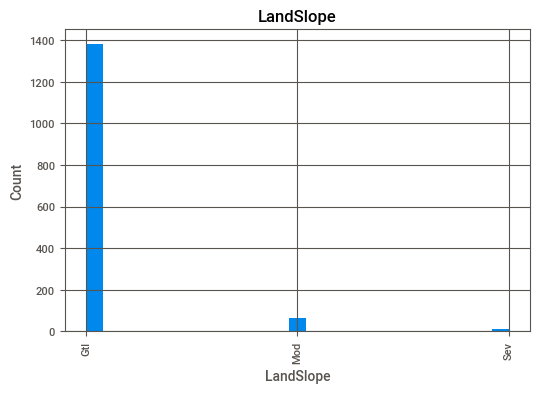

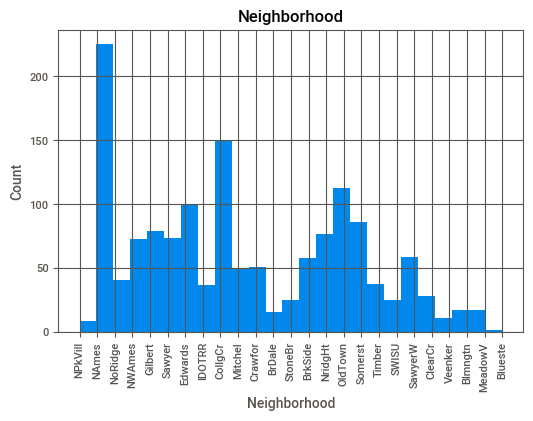

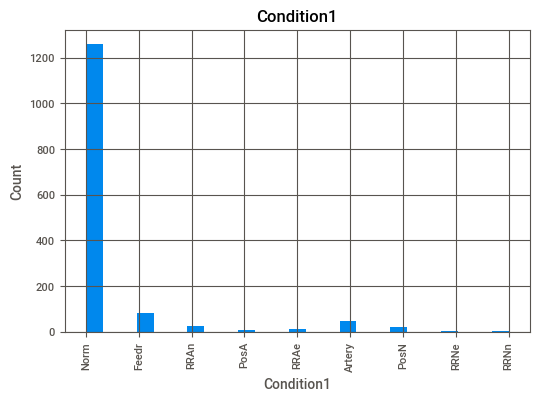

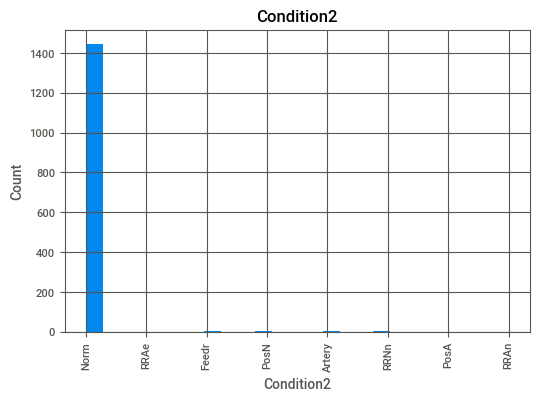

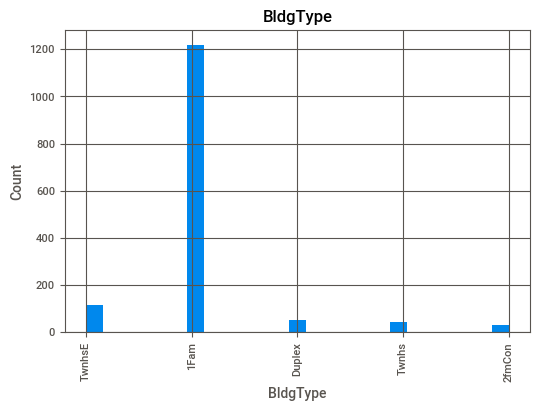

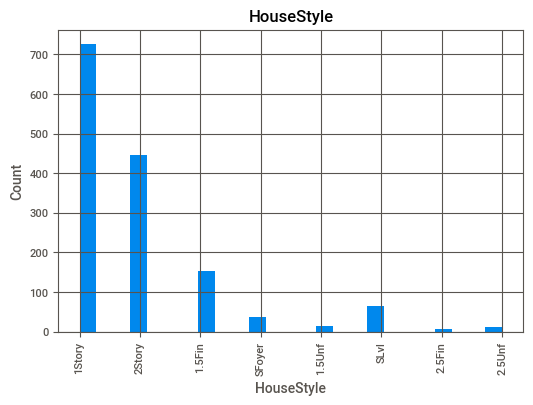

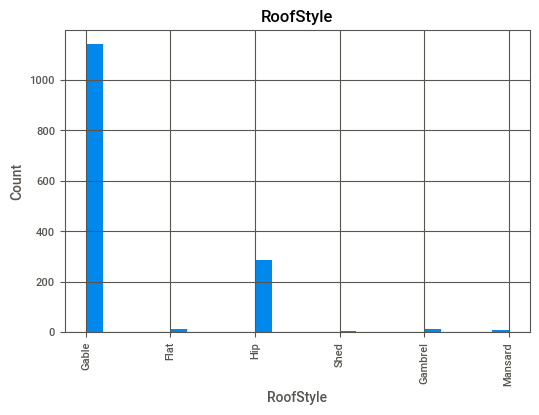

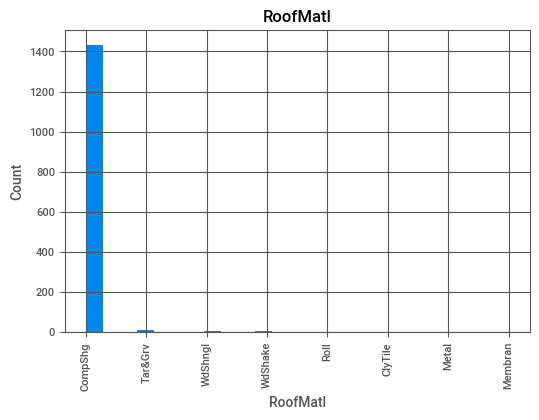

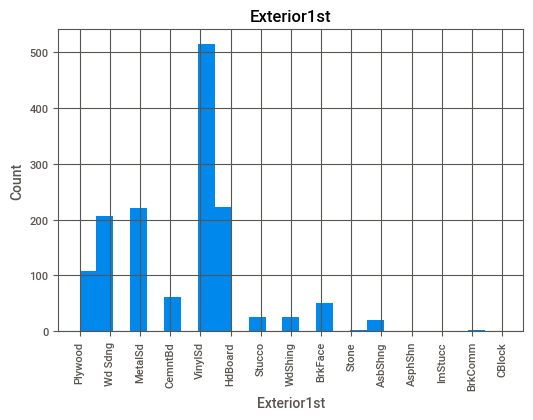

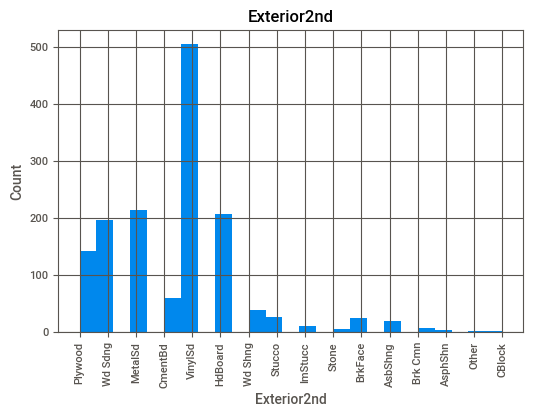

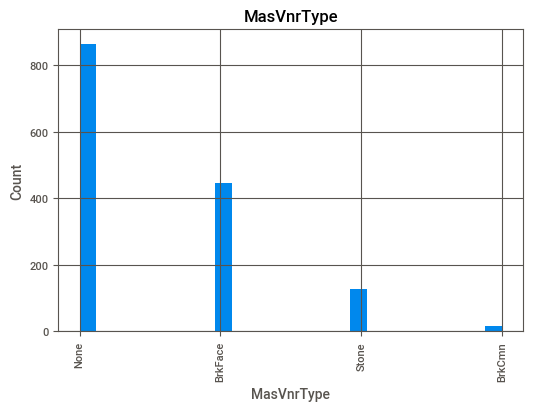

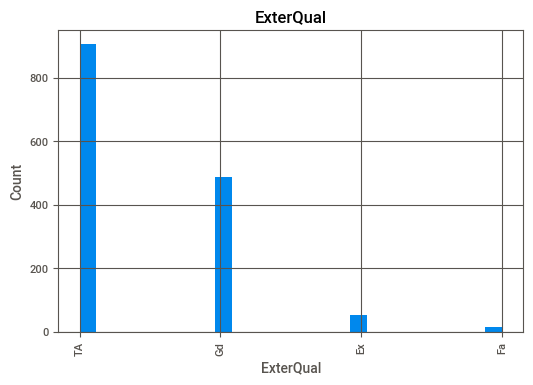

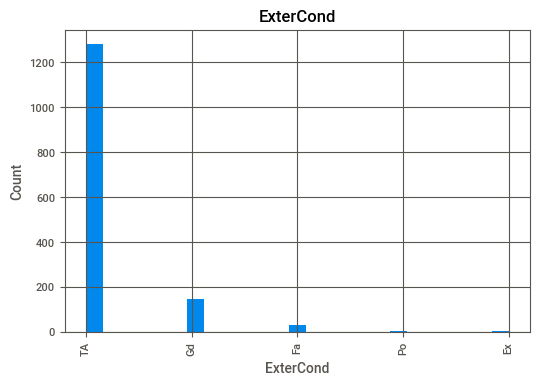

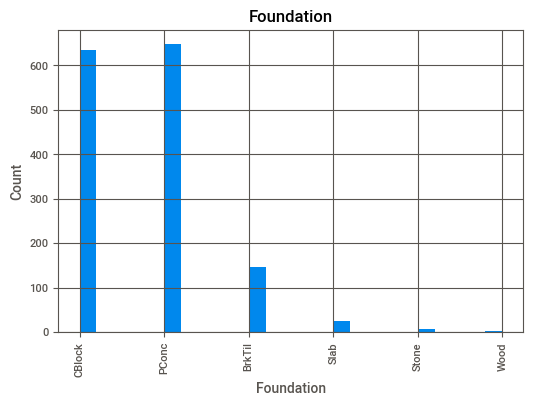

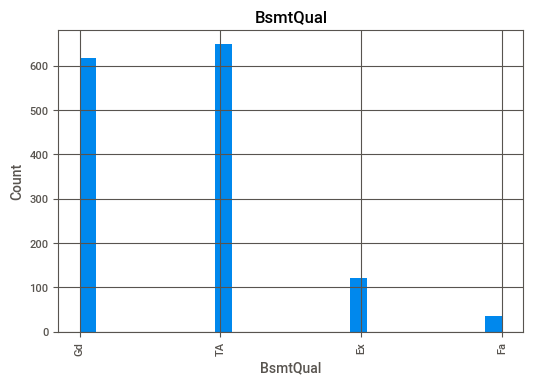

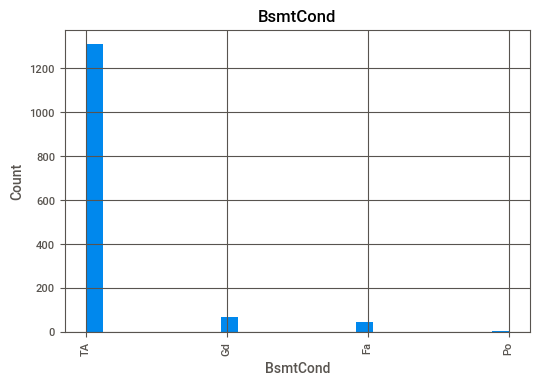

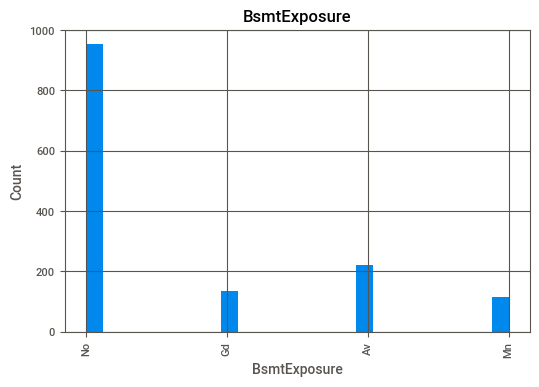

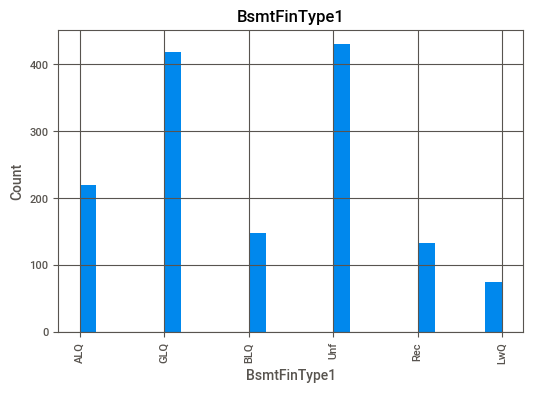

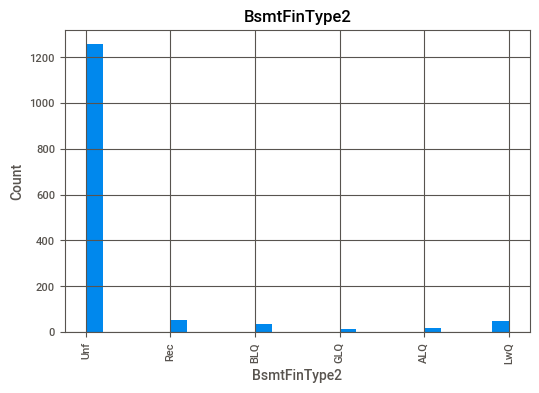

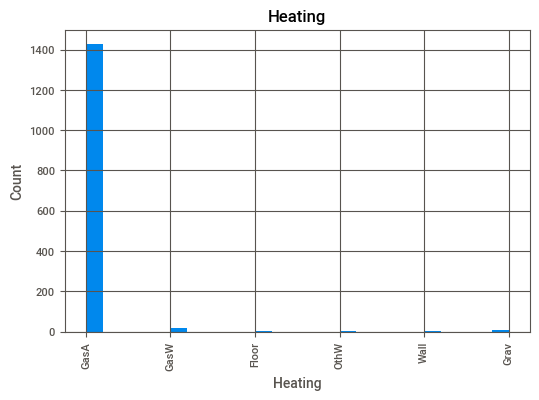

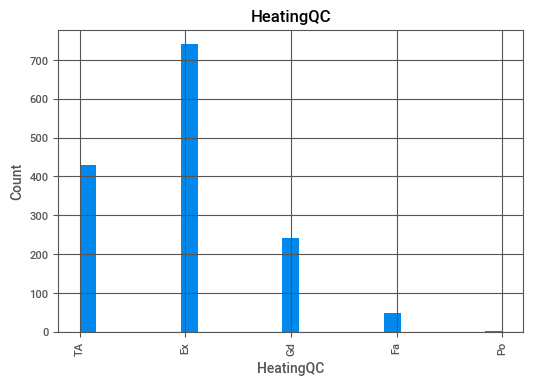

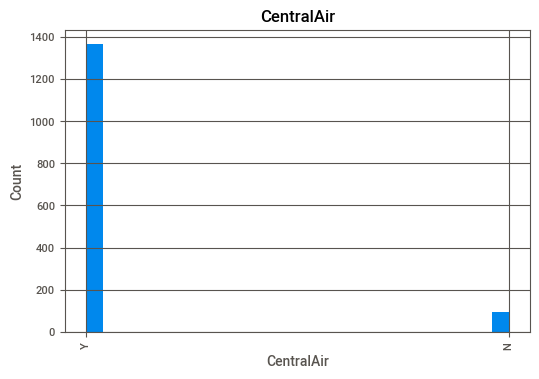

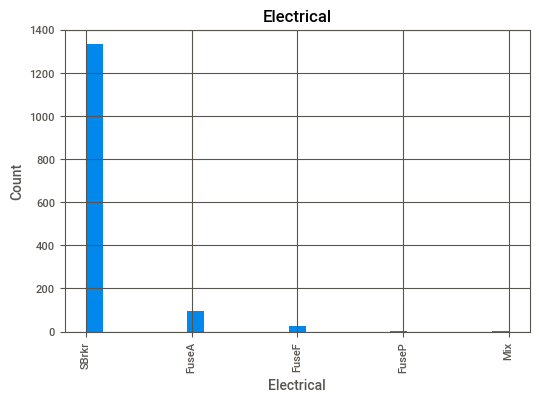

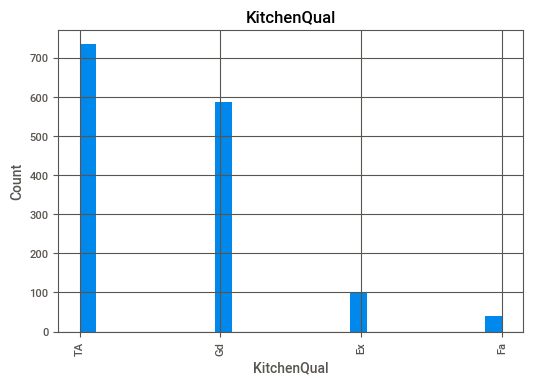

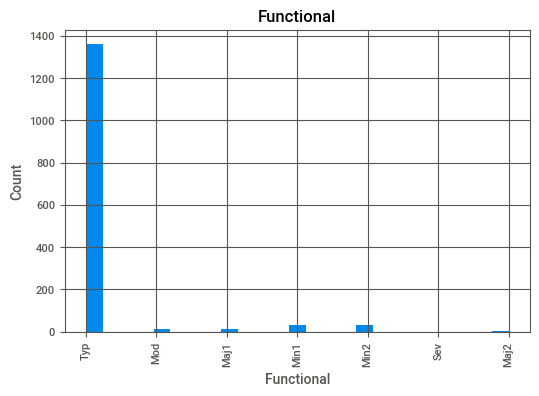

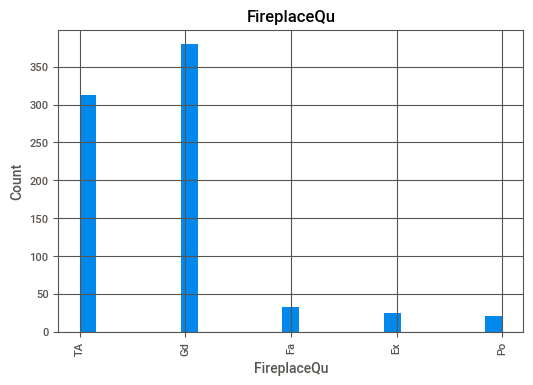

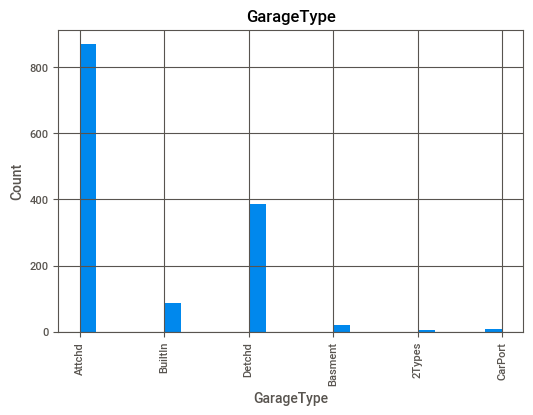

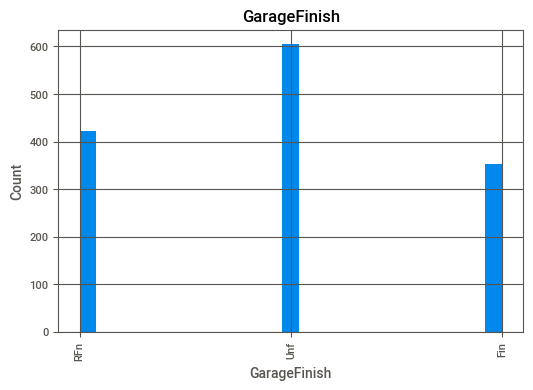

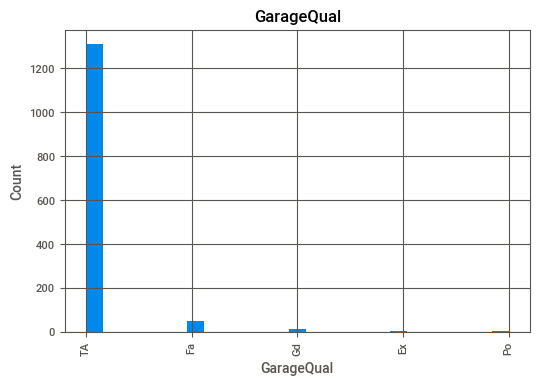

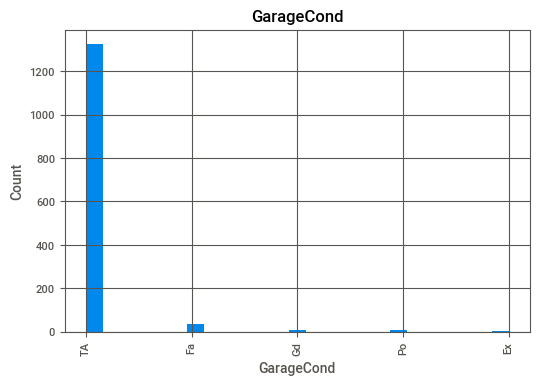

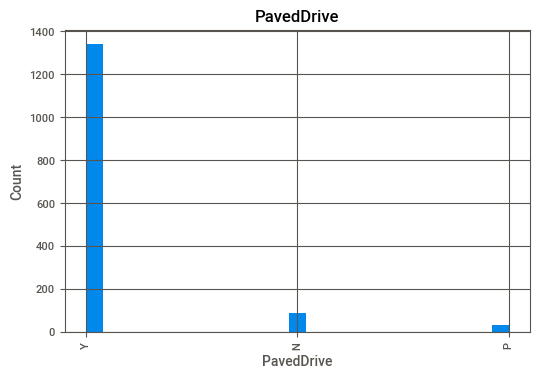

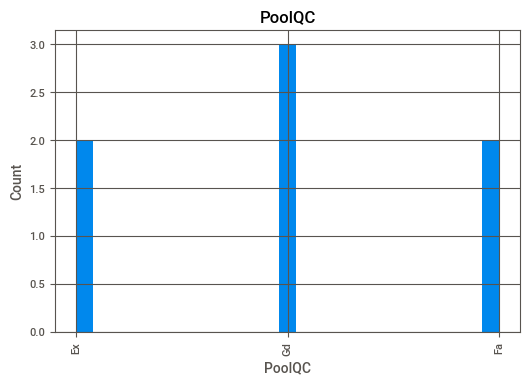

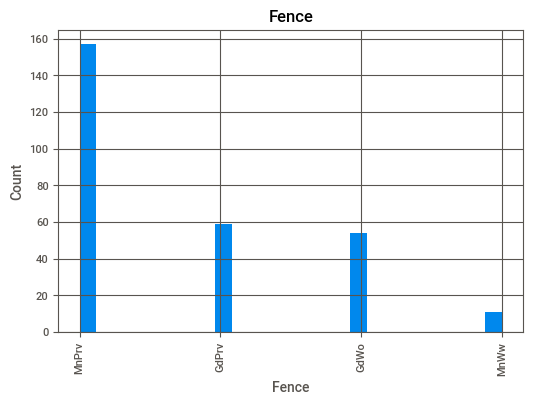

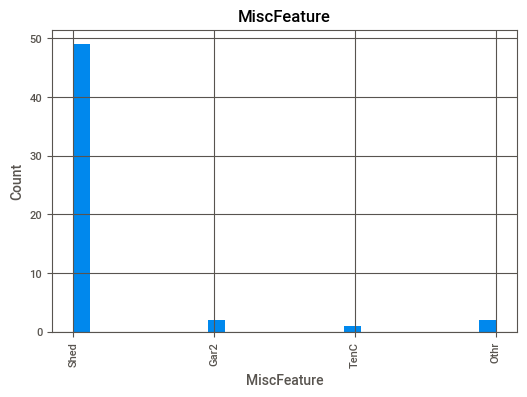

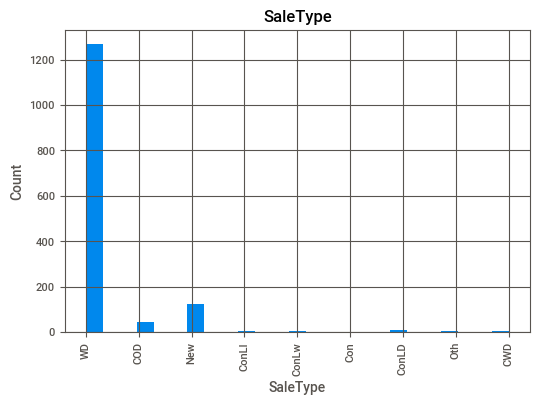

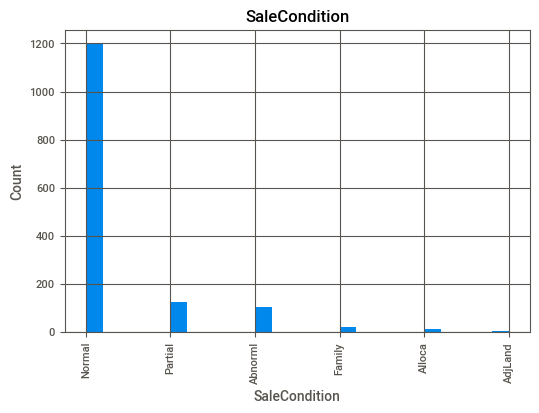

In [13]:
for feature in categorical:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

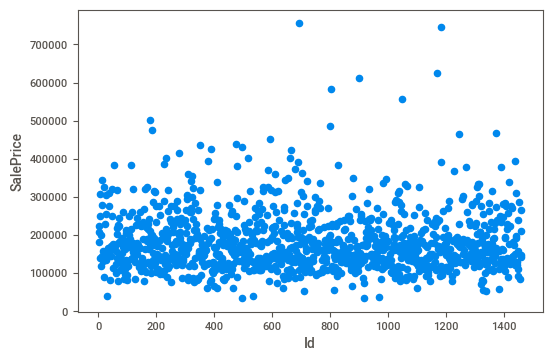

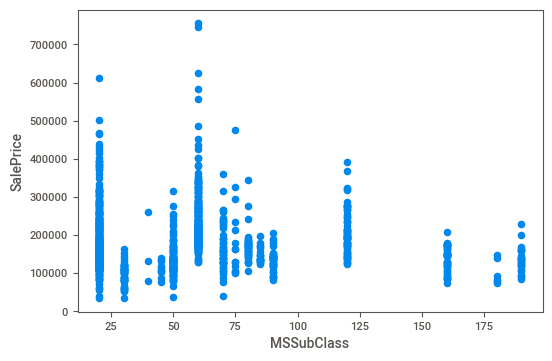

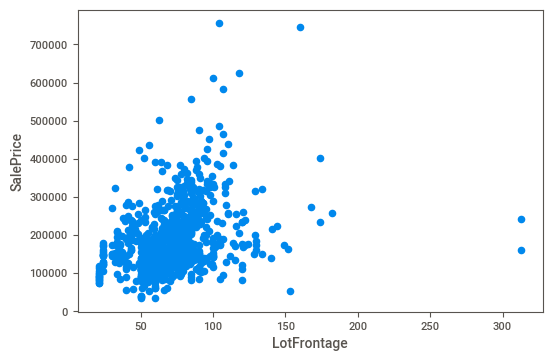

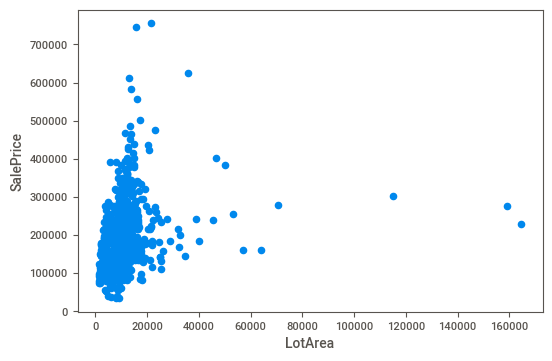

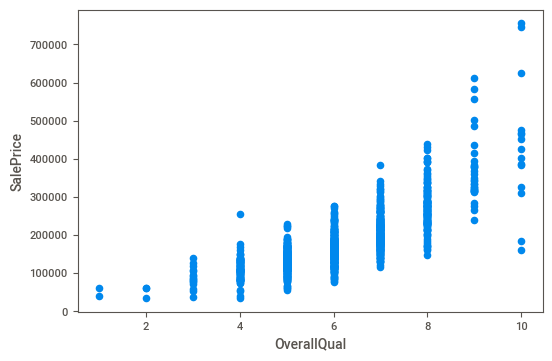

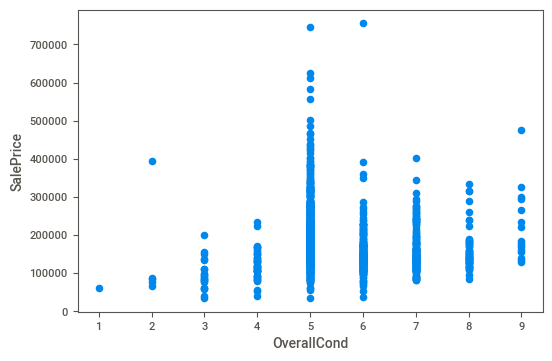

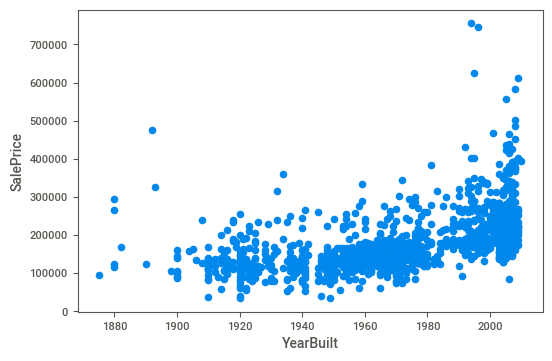

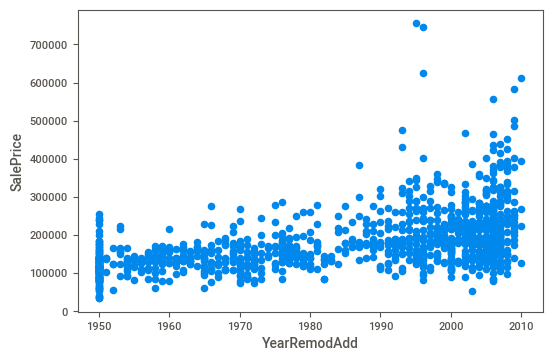

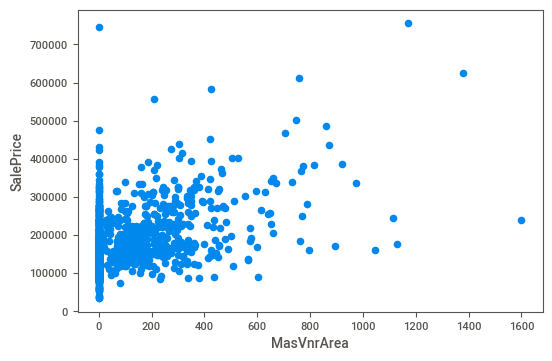

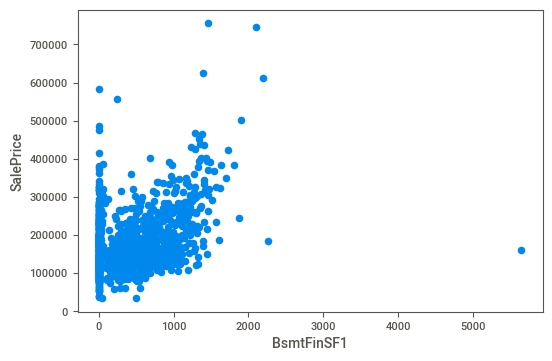

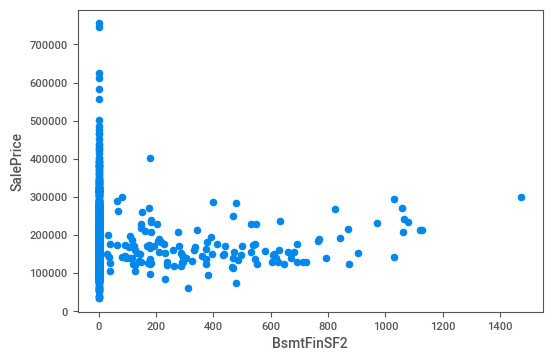

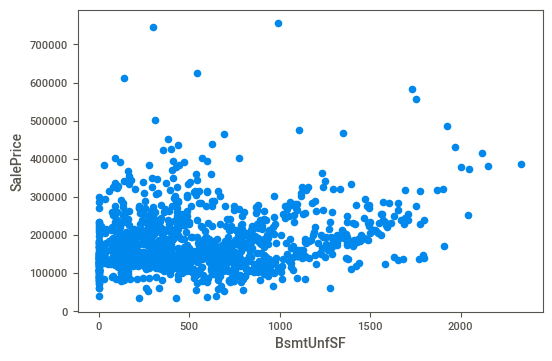

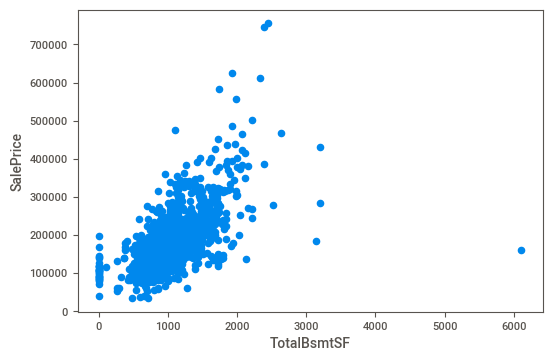

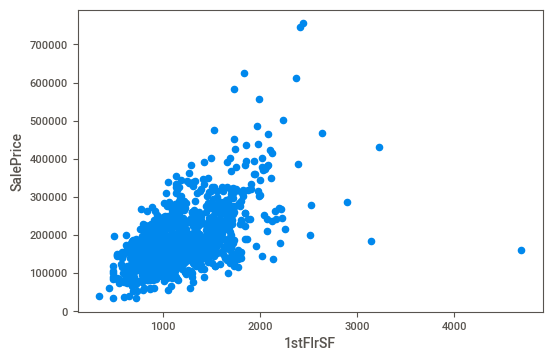

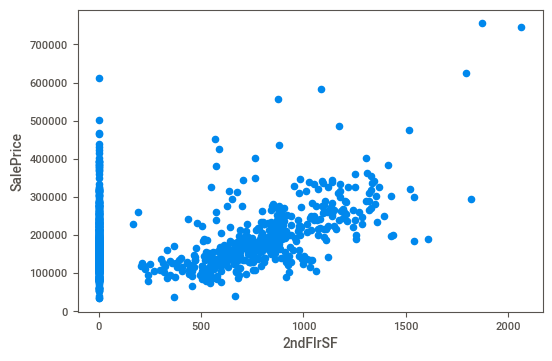

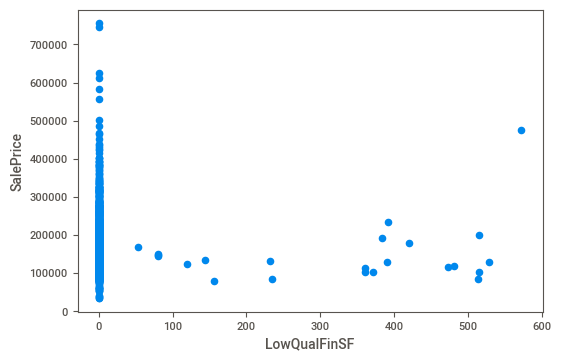

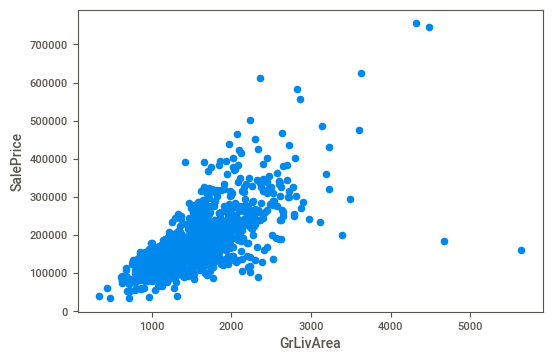

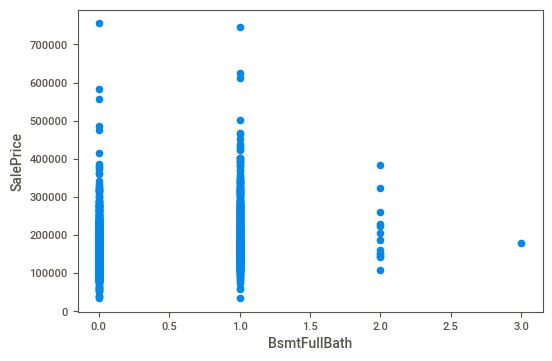

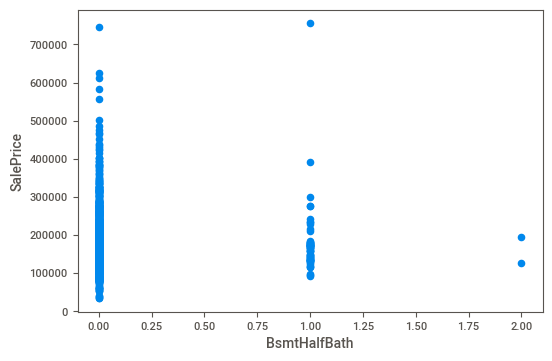

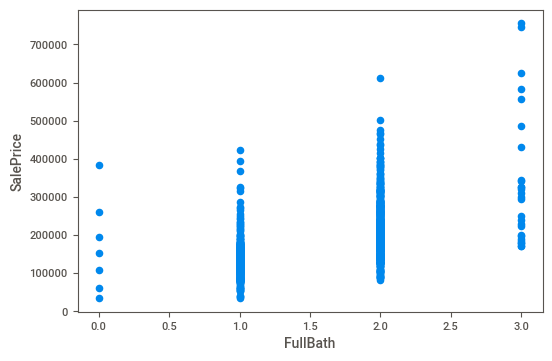

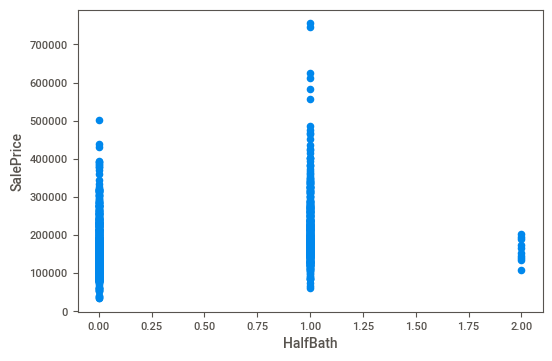

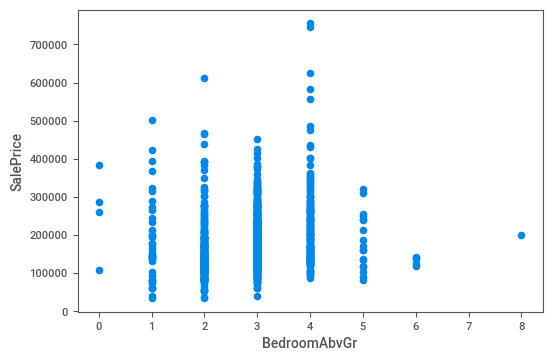

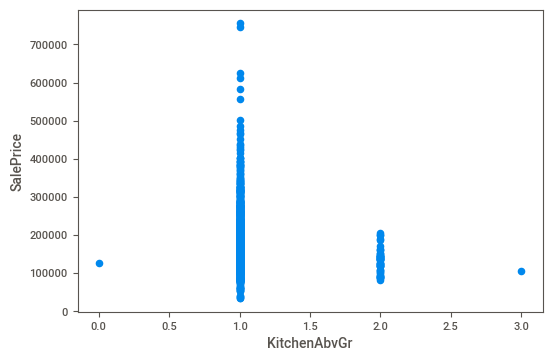

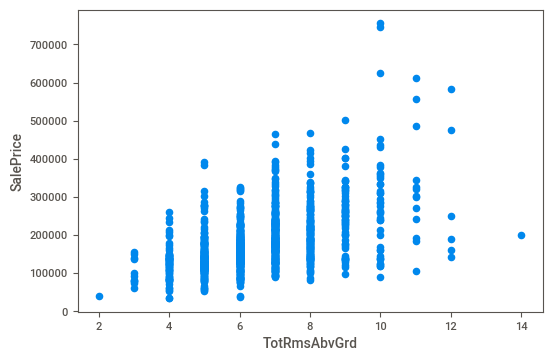

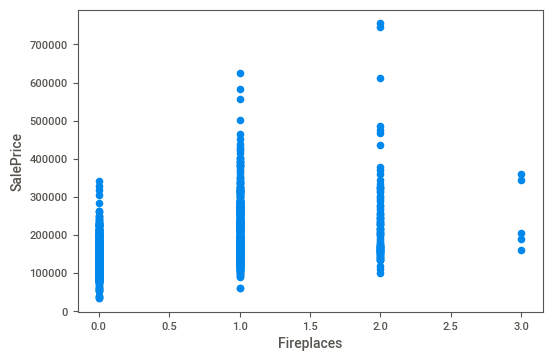

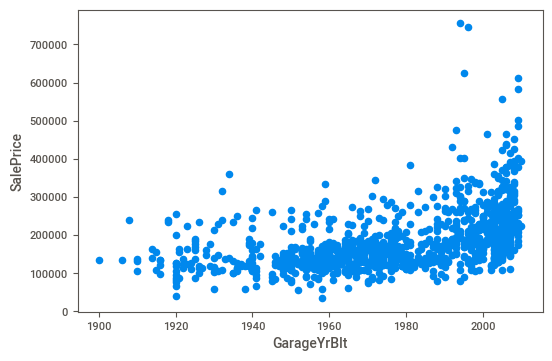

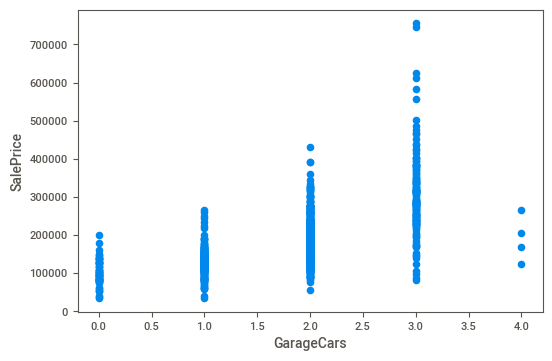

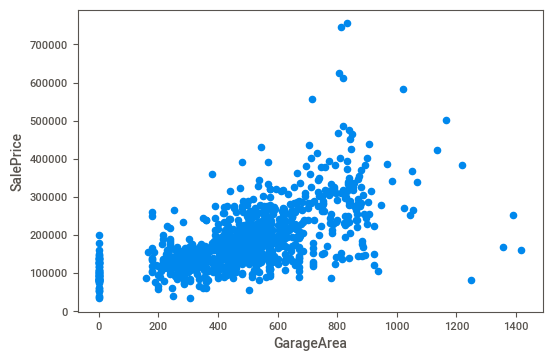

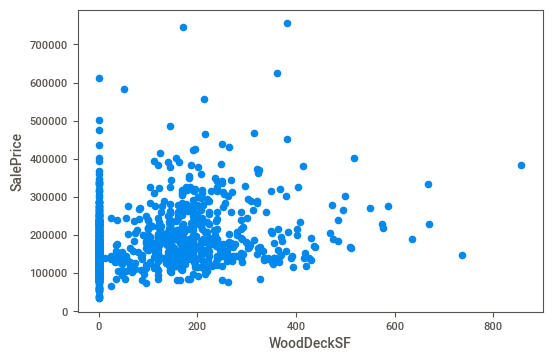

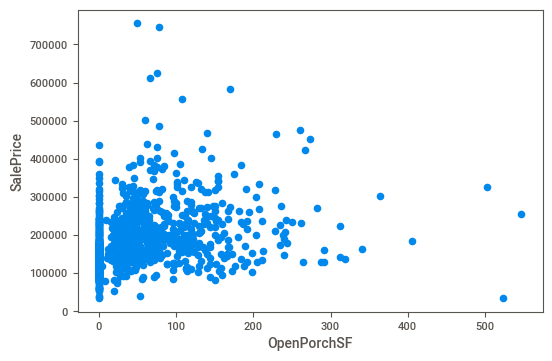

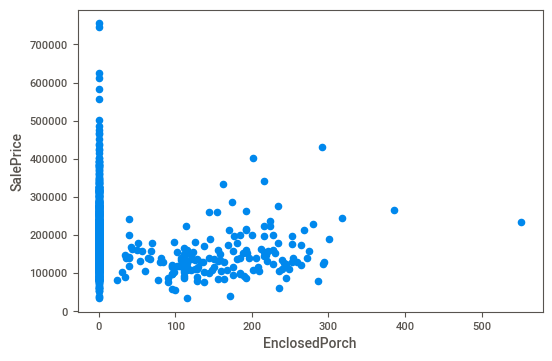

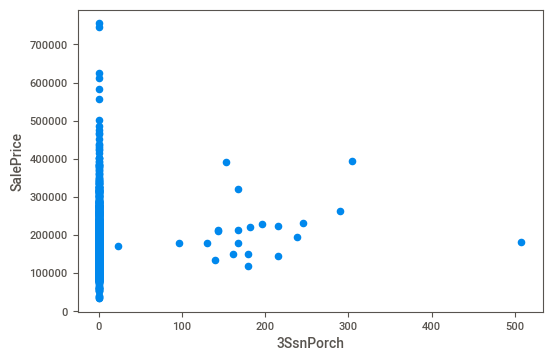

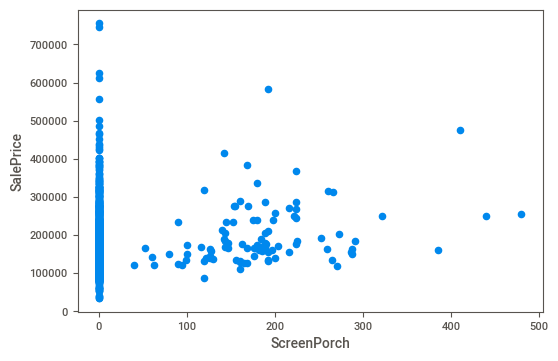

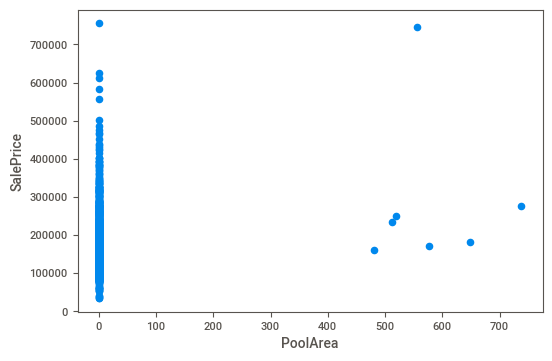

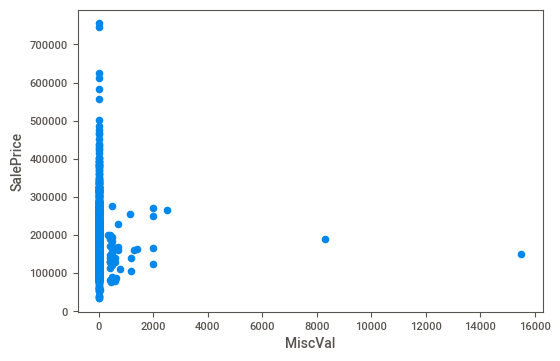

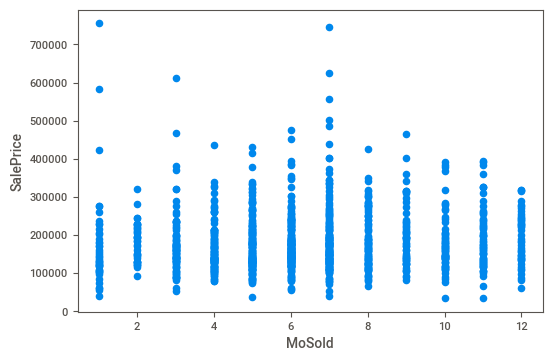

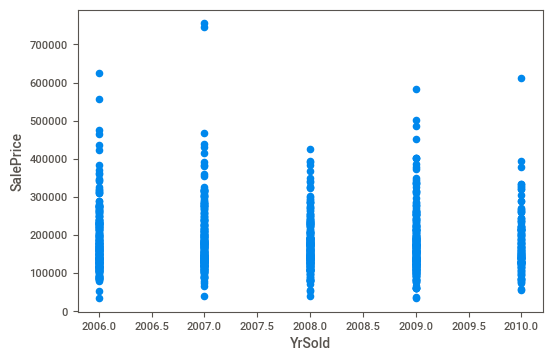

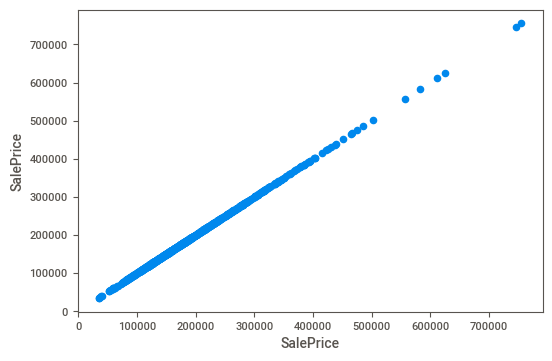

In [14]:
for n in numerical:
    df.plot(x=n,y='SalePrice',kind='scatter')
plt.show()

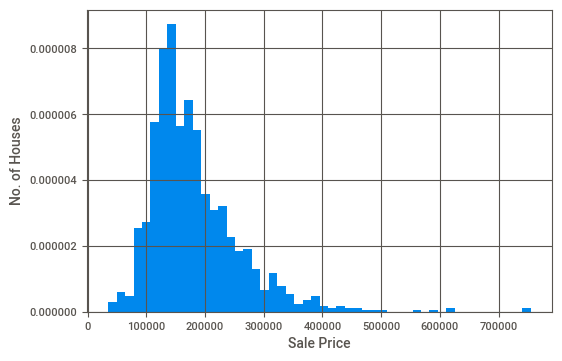

In [15]:
train['SalePrice'].hist(bins=50,density=True)
plt.ylabel('No. of Houses')
plt.xlabel('Sale Price')
plt.show()

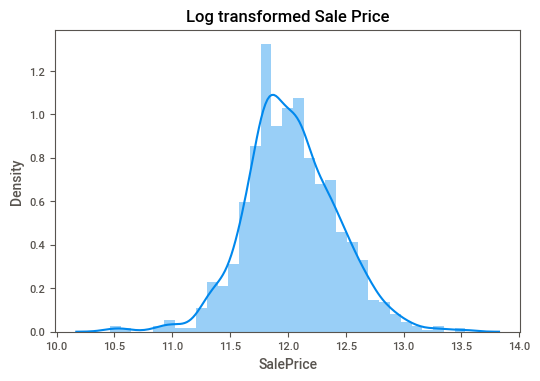

In [16]:
plt.title('Log transformed Sale Price')
log = np.log1p(train['SalePrice'])
sns.distplot(log)
plt.show()

In [17]:
# drop columns where 80% of data is Nan.
thresh = len(df) * .2
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [18]:
# fill na with mean values
df.fillna(df.mean(), inplace=True)

In [19]:
# one-hot encodin
xdf= pd.get_dummies(df,drop_first=True)
xdf.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120    70.049958     4928            6            5       1976   
1  889          20    95.000000    15865            8            6       1970   
2  793          60    92.000000     9920            7            5       1996   
3  110          20   105.000000    11751            6            6       1977   
4  422          20    70.049958    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0   128000.0            0            0            1            0            1   
1   268000.0            0            0            1            0            1   
2   269790.0            0            0            1            0            1   
3   190000.0            0            0            1            0            1   
4   215000.0            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             0                0                0   
1             0             0             0                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              0   
2                1      

In [20]:
xdf.shape

(1460, 238)

In [21]:
ydf=xdf.SalePrice
xdf.drop(['SalePrice','Id'],axis=1,inplace = True)

In [22]:
xdf.shape

(1460, 236)

In [23]:
xdf.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120    70.049958     4928            6            5       1976   
1          20    95.000000    15865            8            6       1970   
2          60    92.000000     9920            7            5       1996   
3          20   105.000000    11751            6            6       1977   
4          20    70.049958    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             0                0                0   
1             0             0             0                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              0   
2                1                 0                  1              0   
3                1                 0         

In [24]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(xdf,ydf,test_size=.20,random_state=20)

In [25]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1168, 236)
(292, 236)
(1168,)
(292,)


In [26]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=500, random_state=0)

In [27]:
y_predict=regressor.predict(xtest)

In [28]:
y_predict

array([126277.54716267, 198213.81989384, 138814.62075514, 132851.33734247,
       138256.17325856, 160673.27691096, 156950.32188185, 226083.82475514,
       154333.78139041, 420751.42906678, 147371.14676712, 195473.84357021,
       125651.78912671, 280811.13037158, 112955.43951027, 146116.14008562,
       144354.57656336, 225753.17331849, 194697.63301884, 124807.97864726,
       155310.07252911, 121352.76899486, 145522.50343836, 148736.28280479,
       142710.52064897, 223966.44731849, 212904.51118664, 156817.83169007,
       117836.52239555, 313933.31844349, 153522.30912671, 140799.9092226 ,
       277626.40945034, 263229.61590582, 144489.63464726, 197231.54881507,
       210243.9346113 , 117880.91300685, 149482.16134247, 172957.07019349,
       141185.84278082, 307271.93257534, 161787.44069521, 355871.24262329,
       158860.82468493, 195245.2854024 , 149551.50668322, 158824.89991781,
       149888.18745034, 146738.86782192, 249264.33656336, 255447.79475514,
       163009.32127055, 1

In [29]:
df_submission=pd.DataFrame({'Id':test['Id'],'SalePrice':y_predict})
df_submission

Id      SalePrice
0     337  126277.547163
1    1018  198213.819894
2     929  138814.620755
3    1148  132851.337342
4    1227  138256.173259
5     650  160673.276911
6    1453  156950.321882
7     152  226083.824755
8     427  154333.781390
9     776  420751.429067
10     30  147371.146767
11   1425  195473.843570
12    423  125651.789127
13   1185  280811.130372
14    775  112955.439510
15    391  146116.140086
16   1408  144354.576563
17    513  225753.173318
18   1266  194697.633019
19    173  124807.978647
20   1150  155310.072529
21    797  121352.768995
22    137  145522.503438
23    706  148736.282805
24   1377  142710.520649
25   1177  223966.447318
26   1456  212904.511187
27    369  156817.831690
28   1421  117836.522396
29    999  313933.318443
30   1217  153522.309127
31    937  140799.909223
32    769  277626.409450
33    831  263229.615906
34    678  144489.634647
35    574  197231.548815
36    921  210243.934611
37   1292  117880.913007
38   1277  149482.161342
39    676  172957.070193
40    108  141185.842781
41    424  307271.932575
42    823  161787.440695
43   1455  355871.242623
44    377  158860.824685
45   1256  195245.285402
46   1120  149551.506683
47    265  158824.899918
48   1158  149888.187450
49    725  146738.867822
50   1378  249264.336563
51   1139  255447.794755
52    122  163009.321271
53    515  172333.262911
54    518  194210.873318
55   1214  198425.466889
56    443  147406.665043
57    903  161180.569390
58     53  146199.851378
59    469  142080.867474
60     76  170667.537582
61   1142  143835.669390
62   1222  120186.864947
63    851  161124.516697
64    334  186360.021630
65   1008  279793.671127
66     19  259556.741235
67    339  215787.193762
68   1118  122253.926875
69    834  156564.753762
70   1176  109005.420695
71    945  180260.045570
72   1415  178633.962733
73    911  125854.820743
74    388  164896.139786
75    747  248237.230575
76    620  215438.280611
77    386  111220.695283
78    818  257272.861079
79    539  129195.024935
80    535  169607.999295
81   1399  232238.543247
82    571  360796.212779
83     38  154480.129702
84    850  147092.379894
85   1032  175760.831259
86   1433  132941.231330
87   1354  235212.461163
88   1072  142223.861618
89    371  161921.047726
90   1242  161377.419271
91    681  139660.181414
92    290  145960.746086
93    973  280360.062563
94    989  210860.771858
95    484  253215.220563
96   1240  257841.884887
97   1125  332880.361354
98   1143  129272.396887
99   1340  141028.481019
100  1343  206377.935366
101   936  254223.557031
102  1151  115024.581594
103  1380  202573.989199
104  1190  179118.912949
105   635  265961.480575
106    47  178507.651151
107   729  149620.829462
108  1434  200771.918455
109   472  156234.168911
110  1156  183566.780707
111  1352  166238.278146
112   717  139833.866923
113   385  102609.930443
114  1334  151159.097307
115   243  155402.595031
116    39  184440.863798
117  1168  171897.042983
118   214  124415.476611
119   647  118454.598791
120   490  157861.961450
121   512  147437.685247
122  1181  126513.370995
123  1451  138451.511330
124  1428  119355.496779
125   767  246295.058743
126  1250  155262.505834
127   855  150910.830743
128  1001  290448.528515
129    49  148588.574971
130    25  188508.616325
131  1058  148341.090563
132    24  251092.348671
133   758  131769.986815
134  1060  134078.737163
135  1110  186210.226995
136  1057  196823.003223
137   491  218313.273211
138   378  165130.992086
139  1429  154914.841175
140    55  141608.297654
141   770  196701.389318
142   737  138781.581103
143    59  147669.381570
144    29  170757.653438
145   788  345055.685342
146     9  310528.048192
147  1371  160671.039163
148   260  208484.855091
149   249  145963.067498
150    88  337571.477786
151   893  112843.217318
152   803  208685.499127
153   901  124825.400887
154  1124  136409.393019
155   223  178215.920122
156  1278  121184.008983
157  1174  155641.137474
158   312  170406.307774
159   6